# Musical Genre Classification with Deep Learning


Dataset for Music Analysis

FMA(Free Music Archive) https://github.com/mdeff/fma

Analysis and processing of 24GB medium dataset

## Audio analysis and processing

In [1]:
import os
import numpy as np
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras

In [2]:

AUDIO_DIR='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium'
DATA_DIR='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_metadata/fma_metadata'

LONG_SPECTO = 640 
BINS = 128 


def get_tids_from_directory(audio_dir):
    tids = []
    for _, dirnames, files in os.walk(audio_dir):
        if dirnames == []:
            tids.extend(int(file[:-4]) for file in files if file !='.DS_Store')
    return tids


def get_audio_path(audio_dir, track_id):
    tid_str = '{:06d}'.format(track_id)
    return os.path.join(audio_dir, tid_str[:3], tid_str + '.mp3')


In [3]:
tids = get_tids_from_directory(AUDIO_DIR)
print("Number of tracks: ",len(tids))


Number of tracks:  25000


In [4]:
#filters a list of track IDs based on the size of the corresponding audio files.
#The function only retains tracks that are larger than a specified minimum size


def filter_by_size(tids,min_size=700000):
    tids_correct = []
    count=0
    for file in tids:
        fpath = get_audio_path(AUDIO_DIR, file)
        tam = os.path.getsize(fpath)
        if tam > min_size:
            tids_correct.append(file)
        else:
            print('Track incorrect: ', fpath, " ,  size: ",tam)
            count += 1
    tids_ok = np.array(tids_correct, dtype='int64')
    print('Total tracks incorrect ', count)
    print('Total tracks correct ', tids_ok.size)
    return tids_ok

In [5]:
tracks_correct = filter_by_size(tids)

Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000139.mp3  ,  size:  480953
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000140.mp3  ,  size:  480497
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000141.mp3  ,  size:  480945
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000459.mp3  ,  size:  481256
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/fma_medium/fma_medium\000\000512.mp3  ,  size:  601401
Track incorrect:  C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGenero

## Metadata with pandas

In [6]:
filepath = DATA_DIR+'/tracks.csv'
tracks = pd.read_csv(filepath, index_col=0, header=[0, 1])


#Selection of columns from the dataframe
cols = [('set', 'split'),('set', 'subset'),('track', 'genre_top')]

#print(tracks[('set', 'subset')].value_counts())
#filtering the columns
df_medium = tracks[cols]
#print(f"Total tracks before filtering by size: {df_medium.shape[0]}")
df_medium = df_medium[df_medium[('set', 'subset')] == 'medium'] 

#print(f"Total tracks before filtering by size: {df_medium.shape[0]}")
#filter for tracks that exceed a certain size
df_filtered = df_medium[df_medium.index.isin(tracks_correct)]
#print(f"Total tracks after filtering by size: {df_filtered.shape[0]}")

In [7]:
df_filtered.head(10)

set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
181           test  medium      Rock
198       training  medium      Folk
208       training  medium      Folk
209       training  medium      Folk
237       training  medium      Jazz
247       training  medium      Rock
249       training  medium      Rock

In [8]:
genres = df_filtered[('track', 'genre_top')].unique()

genres

array(['Hip-Hop', 'Rock', 'Folk', 'Jazz', 'Electronic', 'Experimental',
       'Soul-RnB', 'Pop', 'Spoken', 'Country', 'Blues', 'Classical',
       'Instrumental', 'Old-Time / Historic', 'International',
       'Easy Listening'], dtype=object)

In [9]:
dict_genres = {}

for g in range(genres.size):
    print(g)
    print(genres[g])
    dict_genres[genres[g]] = g
    

0
Hip-Hop
1
Rock
2
Folk
3
Jazz
4
Electronic
5
Experimental
6
Soul-RnB
7
Pop
8
Spoken
9
Country
10
Blues
11
Classical
12
Instrumental
13
Old-Time / Historic
14
International
15
Easy Listening


In [10]:
# dict_genres

# least_representative_genres = {"Experimental","Spoken",
#                                  "Soul-RnB","Country",
#                                  "Instrumental","Old-Time / Historic",
#                                  "International","Easy Listening"}

In [11]:
dict_genres_final = {}
cont=0

# for g in dict_genres:
#     if (g not in least_representative_genres):
#         dict_genres_final.update({g:cont})
#         cont+=1

for g in dict_genres:
    dict_genres_final.update({g: cont})
    cont += 1

In [12]:
dict_genres_final

{'Hip-Hop': 0,
 'Rock': 1,
 'Folk': 2,
 'Jazz': 3,
 'Electronic': 4,
 'Experimental': 5,
 'Soul-RnB': 6,
 'Pop': 7,
 'Spoken': 8,
 'Country': 9,
 'Blues': 10,
 'Classical': 11,
 'Instrumental': 12,
 'Old-Time / Historic': 13,
 'International': 14,
 'Easy Listening': 15}

Clarification:

df_filtered has the metadata of all the tracks to process

Then you have to filter by more representative, more differentiable genres.

for example: we filter Instrumental, International because they are not representative enough (International or Instrumental can be any genre); We also removed Spoken, Old because they are quite clear to distinguish.

and the most representative genres would be rock, blues, folk, pop, hip-hop, electronica,

Both jazz and classical music are respectively little and very representative. They are added to analyze their behavior...


In [13]:
df_train = df_filtered[df_filtered[('set', 'split')] == 'training']
df_valid = df_filtered[df_filtered[('set', 'split')] == 'validation']
df_test = df_filtered[df_filtered[('set', 'split')] == 'test']

print(df_train.shape, df_valid.shape, df_test.shape)

df_train.head()




(12114, 3) (1556, 3) (1610, 3)


set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
198       training  medium      Folk
208       training  medium      Folk

In [14]:
df_train.head(10)

set             track
             split  subset genre_top
track_id                            
3         training  medium   Hip-Hop
134       training  medium   Hip-Hop
136       training  medium      Rock
198       training  medium      Folk
208       training  medium      Folk
209       training  medium      Folk
237       training  medium      Jazz
247       training  medium      Rock
249       training  medium      Rock
257       training  medium      Rock

In [15]:
henrys = []
for k in dict_genres_final: 
    print(k)
    henrys.append(k)

henrys

Hip-Hop
Rock
Folk
Jazz
Electronic
Experimental
Soul-RnB
Pop
Spoken
Country
Blues
Classical
Instrumental
Old-Time / Historic
International
Easy Listening


['Hip-Hop',
 'Rock',
 'Folk',
 'Jazz',
 'Electronic',
 'Experimental',
 'Soul-RnB',
 'Pop',
 'Spoken',
 'Country',
 'Blues',
 'Classical',
 'Instrumental',
 'Old-Time / Historic',
 'International',
 'Easy Listening']

# Preprocessing of the audio

### Librosa

In [16]:
# Function to create spectrograms with librosa
WINDOW_DURATION = 0.023  # 23 ms
N_MELS = 64              # 64 mel bands
TIME_FRAMES = 256        # Number of time frames per segment
SEGMENT_DURATION = 6     # 3 seconds per segment
OVERLAP_RATIO = 0.5      # 50% overlap


def create_spectrogram_librosa(track_id):
    try:
        filepath = get_audio_path(AUDIO_DIR, track_id)
        if not os.path.exists(filepath):
            print(f"Error: Audio file not found at path {filepath}")
            return None

        y, sr = librosa.load(filepath, sr=None)
        spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
        spect = librosa.power_to_db(spect, ref=np.max)
        print('Shape of spectrogram:', spect.T.shape)
        return spect.T
    except Exception as e:
        print(f"Error processing track_id {track_id}: {e}")
        return None

def create_spectrogram_segment(y, sr):
    n_fft = int(WINDOW_DURATION * sr)
    n_fft = 2 ** int(np.ceil(np.log2(n_fft)))  # Next power of 2
    hop_length = n_fft // 2  # 50% overlap

    # Generate mel spectrogram
    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft,
                                           hop_length=hop_length, n_mels=N_MELS)
    spect = librosa.power_to_db(spect, ref=np.max)

    # Handle variable-length spectrograms
    num_time_frames = spect.shape[1]
    if num_time_frames < TIME_FRAMES:
        # Pad with zeros
        pad_width = TIME_FRAMES - num_time_frames
        spect = np.pad(spect, ((0, 0), (0, pad_width)), mode='constant')
    else:
        # Truncate to TIME_FRAMES
        spect = spect[:, :TIME_FRAMES]

     # Normalize spectrogram
    mean = np.mean(spect)
    std = np.std(spect)
    spect = (spect - mean) / (std + 1e-6)
    return spect.T  # Shape: (TIME_FRAMES, N_MELS)

# Function to load a 3-second segment from a track
def load_audio_segment(track_id, offset, duration=SEGMENT_DURATION):
    try:
        filepath = get_audio_path(AUDIO_DIR, track_id)
        if not os.path.exists(filepath):
            print(f"Error: Audio file not found at path {filepath}")
            return None, None

        y, sr = librosa.load(filepath, sr=None, offset=offset, duration=duration)
        return y, sr
    except Exception as e:
        print(f"Error processing track_id {track_id}: {e}")
        return None, None

def get_overlapping_segments(track_id, segment_duration=SEGMENT_DURATION, overlap_ratio=0.5):
    filepath = get_audio_path(AUDIO_DIR, track_id)
    if not os.path.exists(filepath):
        print(f"Audio file not found at path {filepath}")
        return []

    y_full, sr = librosa.load(filepath, sr=None)
    total_duration = librosa.get_duration(y=y_full, sr=sr)
    segments = []
    step = segment_duration * (1 - overlap_ratio)
    current_offset = 0

    while current_offset + segment_duration <= total_duration:
        y_segment = y_full[int(current_offset * sr):int((current_offset + segment_duration) * sr)]
        if len(y_segment) < sr * segment_duration:
            # Pad if necessary
            y_segment = np.pad(y_segment, (0, int(sr * segment_duration) - len(y_segment)), mode='constant')
        spect = create_spectrogram_segment(y_segment, sr)
        segments.append(spect)
        current_offset += step

    return segments


# def plot_spect(track_id):
#     filepath = get_audio_path(AUDIO_DIR, track_id)
#     print("File to process:", filepath)
    
#     spect = create_spectrogram_librosa(track_id)
    
#     if spect is None:
#         print(f"Error: Spectrogram for track_id {track_id} is None")
#         return
    
#     print("Spectrogram shape:", spect.shape)
    
#     plt.figure(figsize=(10, 4))
#     librosa.display.specshow(spect, y_axis='mel', fmax=8000, x_axis='time')
#     plt.colorbar(format='%+2.0f dB')
#     plt.show()

# # Example with track_id = 3
# plot_spect(3)

### FFMPEG

In [17]:
import subprocess as sp

# def create_spectrogram_ffmpeg(track_id):
#     filepath = get_audio_path(AUDIO_DIR, track_id)

#     command = ['ffmpeg','-i', filepath, '-f', 's16le', '-acodec', 'pcm_s16le', '-ac', '1'] # channels 2 for stereo, 1 for mono
#     command.append('-')
#     # 30s at 44.1 kHz ~= 1.3e6
#     try:
#         proc = sp.run(command, stdout=sp.PIPE, bufsize=10**7, stderr=sp.DEVNULL, check=True)
#         res = np.fromstring(proc.stdout, dtype="int16")
#         print('res of fmpegloader ', res) 
#         return res
#     except sp.CalledProcessError as e:
#         print('FLASHASTE with ',filepath)
#         pass


In [18]:
# def plot_spect(track_id):
#     filepath = get_audio_path(AUDIO_DIR, track_id)
#     print("file to process ",filepath)
    
#     spect = create_spectrogram_librosa(filepath)
#     #spect = create_spectrogram_ffmpeg(filepath)
    
  
#     plt.figure(figsize=(10, 4))
#     librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
#     plt.colorbar(format='%+2.0f dB')
#     plt.show()

In [19]:
# example with tid = 2
#plot_spect(5)
# img = np.array(create_spectrogram_ffmpeg(5))
#img.reshape(BINS, LONG_SPECTO)
#print('img',img.shape)

In [20]:
import numpy as np
#import cv2
from matplotlib import pyplot as plt




# GENERATOR


MMF – Memory Mapped Files
Unlike the generator that inherits from Sequential, the following script applies parallelism limited by virtual memory.

In [21]:

#list_gen = list(dict_genres.values()) # for all the genres
list_gen = list(dict_genres_final.values()) 
np_gen = np.array(list_gen)
CANT_genres = np_gen.shape[0]
CANT_genres


16

In [22]:
## this cell is to filter the metadata by more representative genres
## if not executed, it is classified according to the 16 genres
## filter by most representative genres


df_true = df_filtered[df_filtered[('track', 'genre_top')].isin(henrys)]

# in this case, I execute it to filter by the genres, in my opinion, most representative

df_train = df_true[df_true[('set', 'split')] == 'training']
df_valid = df_true[df_true[('set', 'split')] == 'validation']
df_test = df_true[df_true[('set', 'split')] == 'test']

print(df_train.shape, df_valid.shape, df_test.shape)

df_train.head()
# Access the genre column correctly using the MultiIndex
train_genre_distribution = df_train[('track', 'genre_top')].value_counts()
print("Training Set Genre Distribution:")
print(train_genre_distribution)

# Validation set
valid_genre_distribution = df_valid[('track', 'genre_top')].value_counts()
print("\nValidation Set Genre Distribution:")
print(valid_genre_distribution)

# Test set
test_genre_distribution = df_test[('track', 'genre_top')].value_counts()
print("\nTesting Set Genre Distribution:")
print(test_genre_distribution)

(12114, 3) (1556, 3) (1610, 3)
Training Set Genre Distribution:
(track, genre_top)
Rock                   4366
Electronic             3931
Hip-Hop                 908
Experimental            896
Folk                    364
Classical               362
Old-Time / Historic     324
Jazz                    252
Instrumental            229
Country                 127
Pop                     118
Soul-RnB                 85
Spoken                   83
Blues                    43
International            14
Easy Listening           12
Name: count, dtype: int64

Validation Set Genre Distribution:
(track, genre_top)
Rock                   567
Electronic             517
Experimental           111
Hip-Hop                110
Classical               51
Folk                    44
Jazz                    34
Old-Time / Historic     30
Instrumental            22
Country                 18
Soul-RnB                18
Spoken                  12
Pop                     10
Blues                    8
Internatio

In [23]:
from tensorflow.keras import utils


In [24]:
from tqdm import tqdm

# creating the numpy arrays in a memory mapped file

base_path = "C:/Users/HASSAN/Desktop"
x_train_path = os.path.join(base_path, 'x_train_medium.dat')
y_train_path = os.path.join(base_path, 'y_train_medium.dat')
x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')
x_test_path = os.path.join(base_path, 'x_test_medium.dat')
y_test_path = os.path.join(base_path, 'y_test_medium.dat')

npData_x_train = np.memmap(x_train_path, dtype='float32', mode='w+', shape=(len(df_train), LONG_SPECTO, BINS))
npData_y_train = np.memmap(y_train_path, dtype='float32', mode='w+', shape=(len(df_train), CANT_genres))

npData_x_valid = np.memmap(x_valid_path, dtype='float32', mode='w+', shape=(len(df_valid), LONG_SPECTO, BINS))
npData_y_valid = np.memmap(y_valid_path, dtype='float32', mode='w+', shape=(len(df_valid), CANT_genres))

npData_x_test = np.memmap(x_test_path, dtype='float32', mode='w+', shape=(len(df_test), LONG_SPECTO, BINS))
npData_y_test = np.memmap(y_test_path, dtype='float32', mode='w+', shape=(len(df_test), CANT_genres))



for i, track_id in tqdm(enumerate(df_train.index), total=len(df_train)): 
    npData_x_train[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
    genre = df_train[('track','genre_top')].loc[track_id]
    y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
    npData_y_train[i,:] = y_categ


print("\n Training data generated correctly \n\n")
    
    
for i, track_id in tqdm(enumerate(df_valid.index), total=len(df_valid)): 
    npData_x_valid[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
    genre = df_valid[('track','genre_top')].loc[track_id]
    y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
    npData_y_valid[i,:] = y_categ

    
print("\n Validation data generated correctly \n\n")


for i, track_id in tqdm(enumerate(df_test.index), total=len(df_test)): 
    npData_x_test[i, :, :] = create_spectrogram_librosa(track_id)[:LONG_SPECTO, :]
    genre = df_test[('track','genre_top')].loc[track_id]
    y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
    npData_y_test[i,:] = y_categ

    
print("\n Testing data generated correctly \n\n")


del npData_x_train
del npData_y_train
del npData_x_valid
del npData_y_valid
del npData_x_test
del npData_y_test
# Paths for memory-mapped arrays
# import random
# # Paths for memory-mapped arrays
# base_path = "C:/Users/HASSAN/Desktop"
# x_train_path = os.path.join(base_path, 'x_train_medium.dat')
# y_train_path = os.path.join(base_path, 'y_train_medium.dat')
# x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
# y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')

# # Parameters
# SEGMENTS_PER_TRACK = 30
# TIME_FRAMES = 256
# N_MELS = 64
# CANT_genres = 16
# SEGMENT_DURATION = 3  # duration of each segment in seconds

# # Calculate estimated total number of training and validation samples
# num_train_samples = len(df_train) * SEGMENTS_PER_TRACK
# num_valid_samples = len(df_valid)  # Assuming one segment per validation track

# # Create memory-mapped arrays with estimated sizes
# npData_x_train = np.memmap(x_train_path, dtype='float32', mode='w+', shape=(num_train_samples, TIME_FRAMES, N_MELS))
# npData_y_train = np.memmap(y_train_path, dtype='float32', mode='w+', shape=(num_train_samples, CANT_genres))

# npData_x_valid = np.memmap(x_valid_path, dtype='float32', mode='w+', shape=(num_valid_samples, TIME_FRAMES, N_MELS))
# npData_y_valid = np.memmap(y_valid_path, dtype='float32', mode='w+', shape=(num_valid_samples, CANT_genres))

# # Function to load and process a 3-second segment
# def load_and_process_segment(track_id, offset):
#     y_segment, sr = load_audio_segment(track_id, offset)
#     if y_segment is None:
#         return None
#     spect = create_spectrogram_segment(y_segment, sr)
#     return spect

# # Generate training data
# train_sample_index = 0

# for track_id in tqdm(df_train.index, desc='Processing training tracks'):
#     filepath = get_audio_path(AUDIO_DIR, track_id)
#     if not os.path.exists(filepath):
#         print(f"Audio file not found at path {filepath}")
#         continue

#     # Load full track to determine duration
#     y_full, sr = librosa.load(filepath, sr=None)
#     total_duration = librosa.get_duration(y=y_full, sr=sr)

#     for _ in range(SEGMENTS_PER_TRACK):
#         max_offset = total_duration - SEGMENT_DURATION
#         if max_offset <= 0:
#             offset = 0
#         else:
#             offset = random.uniform(0, max_offset)

#         # Load and process segment
#         spect = load_and_process_segment(track_id, offset)
#         if spect is None:
#             continue

#         # Store valid segment in memory-mapped array
#         npData_x_train[train_sample_index, :, :] = spect

#         # Get label and store it
#         genre = df_train[('track', 'genre_top')].loc[track_id]
#         y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
#         npData_y_train[train_sample_index, :] = y_categ

#         train_sample_index += 1

# # Record actual number of valid training samples
# actual_num_train_samples = train_sample_index
# print(f"\nTraining data generated correctly with {actual_num_train_samples} samples\n")

# # Repeat the process for validation data
# valid_sample_index = 0

# for track_id in tqdm(df_valid.index, desc='Processing validation tracks'):
#     spect = load_and_process_segment(track_id, offset=15)  # Offset can be any fixed value for validation
#     if spect is None:
#         continue

#     # Store valid segment in memory-mapped array
#     npData_x_valid[valid_sample_index, :, :] = spect

#     # Get label and store it
#     genre = df_valid[('track', 'genre_top')].loc[track_id]
#     y_categ = keras.utils.to_categorical(dict_genres_final.get(genre), CANT_genres)
#     npData_y_valid[valid_sample_index, :] = y_categ

#     valid_sample_index += 1

# # Record actual number of valid validation samples
# actual_num_valid_samples = valid_sample_index
# print(f"\nValidation data generated correctly with {actual_num_valid_samples} samples\n")

# # Clean up memory-mapped arrays for initial files
# del npData_x_train
# del npData_y_train
# del npData_x_valid
# del npData_y_valid

# # Paths for corrected memory-mapped files
# corrected_x_train_path = os.path.join(base_path, 'x_train_medium_corrected.dat')
# corrected_y_train_path = os.path.join(base_path, 'y_train_medium_corrected.dat')
# corrected_x_valid_path = os.path.join(base_path, 'x_valid_medium_corrected.dat')
# corrected_y_valid_path = os.path.join(base_path, 'y_valid_medium_corrected.dat')

# # Create new memory-mapped arrays with the actual number of samples
# corrected_npData_x_train = np.memmap(corrected_x_train_path, dtype='float32', mode='w+',
#                                      shape=(actual_num_train_samples, TIME_FRAMES, N_MELS))
# corrected_npData_y_train = np.memmap(corrected_y_train_path, dtype='float32', mode='w+',
#                                      shape=(actual_num_train_samples, CANT_genres))

# corrected_npData_x_valid = np.memmap(corrected_x_valid_path, dtype='float32', mode='w+',
#                                      shape=(actual_num_valid_samples, TIME_FRAMES, N_MELS))
# corrected_npData_y_valid = np.memmap(corrected_y_valid_path, dtype='float32', mode='w+',
#                                      shape=(actual_num_valid_samples, CANT_genres))

# # Load initial memory-mapped arrays again
# npData_x_train = np.memmap(x_train_path, dtype='float32', mode='r',
#                            shape=(num_train_samples, TIME_FRAMES, N_MELS))
# npData_y_train = np.memmap(y_train_path, dtype='float32', mode='r',
#                            shape=(num_train_samples, CANT_genres))

# npData_x_valid = np.memmap(x_valid_path, dtype='float32', mode='r',
#                            shape=(num_valid_samples, TIME_FRAMES, N_MELS))
# npData_y_valid = np.memmap(y_valid_path, dtype='float32', mode='r',
#                            shape=(num_valid_samples, CANT_genres))

# # Copy only the valid data into the corrected arrays
# corrected_npData_x_train[:] = npData_x_train[:actual_num_train_samples]
# corrected_npData_y_train[:] = npData_y_train[:actual_num_train_samples]

# corrected_npData_x_valid[:] = npData_x_valid[:actual_num_valid_samples]
# corrected_npData_y_valid[:] = npData_y_valid[:actual_num_valid_samples]

# # Flush to save data
# corrected_npData_x_train.flush()
# corrected_npData_y_train.flush()
# corrected_npData_x_valid.flush()
# corrected_npData_y_valid.flush()

# # Clean up initial memory-mapped arrays
# del npData_x_train, npData_y_train, npData_x_valid, npData_y_valid
# del corrected_npData_x_train, corrected_npData_y_train, corrected_npData_x_valid, corrected_npData_y_valid



  0%|                                                                              | 3/12114 [00:03<3:05:46,  1.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  0%|                                                                              | 5/12114 [00:03<1:38:54,  2.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  0%|                                                                                | 9/12114 [00:03<45:45,  4.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|                                                                               | 11/12114 [00:04<36:16,  5.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  0%|                                                                               | 15/12114 [00:04<25:33,  7.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  0%|                                                                               | 17/12114 [00:04<22:38,  8.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▏                                                                              | 21/12114 [00:04<19:08, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▏                                                                              | 23/12114 [00:05<18:10, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▏                                                                              | 27/12114 [00:05<17:28, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▏                                                                              | 29/12114 [00:05<16:58, 11.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  0%|▏                                                                              | 33/12114 [00:05<16:51, 11.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▏                                                                              | 35/12114 [00:06<16:24, 12.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  0%|▎                                                                              | 39/12114 [00:06<16:27, 12.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  0%|▎                                                                              | 41/12114 [00:06<16:11, 12.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▎                                                                              | 45/12114 [00:06<16:49, 11.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▎                                                                              | 47/12114 [00:07<16:48, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  0%|▎                                                                              | 51/12114 [00:07<16:18, 12.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  0%|▎                                                                              | 53/12114 [00:07<16:24, 12.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  0%|▎                                                                              | 57/12114 [00:07<16:01, 12.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  0%|▍                                                                              | 59/12114 [00:08<16:09, 12.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▍                                                                              | 63/12114 [00:08<16:11, 12.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▍                                                                              | 65/12114 [00:08<17:06, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▍                                                                              | 69/12114 [00:08<16:19, 12.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  1%|▍                                                                              | 71/12114 [00:09<15:52, 12.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▍                                                                              | 75/12114 [00:09<15:55, 12.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▌                                                                              | 77/12114 [00:09<15:56, 12.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  1%|▌                                                                              | 81/12114 [00:09<15:55, 12.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▌                                                                              | 83/12114 [00:09<15:53, 12.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▌                                                                              | 87/12114 [00:10<15:41, 12.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▌                                                                              | 89/12114 [00:10<15:42, 12.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▌                                                                              | 93/12114 [00:10<15:15, 13.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▌                                                                              | 95/12114 [00:10<16:03, 12.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


  1%|▋                                                                              | 99/12114 [00:11<15:45, 12.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▋                                                                             | 101/12114 [00:11<16:02, 12.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▋                                                                             | 105/12114 [00:11<15:29, 12.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▋                                                                             | 107/12114 [00:11<15:33, 12.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▋                                                                             | 111/12114 [00:12<16:03, 12.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▋                                                                             | 113/12114 [00:12<15:57, 12.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  1%|▊                                                                             | 117/12114 [00:12<15:49, 12.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▊                                                                             | 119/12114 [00:12<15:40, 12.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▊                                                                             | 123/12114 [00:13<15:33, 12.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▊                                                                             | 125/12114 [00:13<15:50, 12.62it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▊                                                                             | 129/12114 [00:13<16:15, 12.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▊                                                                             | 131/12114 [00:13<16:48, 11.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▊                                                                             | 135/12114 [00:14<16:52, 11.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  1%|▉                                                                             | 137/12114 [00:14<16:54, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▉                                                                             | 141/12114 [00:14<16:39, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▉                                                                             | 143/12114 [00:14<16:25, 12.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  1%|▉                                                                             | 147/12114 [00:15<15:45, 12.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▉                                                                             | 149/12114 [00:15<15:48, 12.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▉                                                                             | 153/12114 [00:15<16:58, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▉                                                                             | 155/12114 [00:15<16:54, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|█                                                                             | 159/12114 [00:16<16:22, 12.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|█                                                                             | 161/12114 [00:16<16:36, 12.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|█                                                                             | 165/12114 [00:16<15:57, 12.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|█                                                                             | 167/12114 [00:16<15:53, 12.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|█                                                                             | 171/12114 [00:17<15:56, 12.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|█                                                                             | 173/12114 [00:17<15:54, 12.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|█▏                                                                            | 177/12114 [00:17<15:46, 12.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|█▏                                                                            | 179/12114 [00:17<15:33, 12.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▏                                                                            | 183/12114 [00:18<16:13, 12.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  2%|█▏                                                                            | 185/12114 [00:18<16:23, 12.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▏                                                                            | 189/12114 [00:18<16:12, 12.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▏                                                                            | 191/12114 [00:18<16:22, 12.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▎                                                                            | 195/12114 [00:19<16:10, 12.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▎                                                                            | 197/12114 [00:19<16:17, 12.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▎                                                                            | 201/12114 [00:19<16:51, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▎                                                                            | 203/12114 [00:19<16:47, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▎                                                                            | 207/12114 [00:20<16:58, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▎                                                                            | 209/12114 [00:20<16:52, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▎                                                                            | 213/12114 [00:20<16:56, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▍                                                                            | 215/12114 [00:20<16:31, 12.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▍                                                                            | 219/12114 [00:21<15:51, 12.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▍                                                                            | 221/12114 [00:21<15:45, 12.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▍                                                                            | 225/12114 [00:21<16:08, 12.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▍                                                                            | 227/12114 [00:21<16:03, 12.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▍                                                                            | 231/12114 [00:22<17:18, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▌                                                                            | 233/12114 [00:22<16:53, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▌                                                                            | 237/12114 [00:22<16:00, 12.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  2%|█▌                                                                            | 239/12114 [00:22<15:58, 12.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  2%|█▌                                                                            | 243/12114 [00:23<16:07, 12.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▌                                                                            | 245/12114 [00:23<15:46, 12.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▌                                                                            | 249/12114 [00:23<15:45, 12.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▌                                                                            | 251/12114 [00:23<16:07, 12.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▋                                                                            | 255/12114 [00:23<15:37, 12.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  2%|█▋                                                                            | 257/12114 [00:24<15:40, 12.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▋                                                                            | 261/12114 [00:24<15:41, 12.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▋                                                                            | 263/12114 [00:24<15:57, 12.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▋                                                                            | 267/12114 [00:24<16:15, 12.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▋                                                                            | 269/12114 [00:25<15:54, 12.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  2%|█▊                                                                            | 273/12114 [00:25<16:00, 12.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▊                                                                            | 275/12114 [00:25<16:03, 12.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▊                                                                            | 279/12114 [00:25<16:06, 12.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▊                                                                            | 281/12114 [00:26<15:37, 12.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▊                                                                            | 285/12114 [00:26<15:34, 12.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▊                                                                            | 287/12114 [00:26<15:39, 12.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  2%|█▊                                                                            | 291/12114 [00:26<15:33, 12.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▉                                                                            | 293/12114 [00:27<15:33, 12.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▉                                                                            | 297/12114 [00:27<15:06, 13.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▉                                                                            | 299/12114 [00:27<15:04, 13.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|█▉                                                                            | 303/12114 [00:27<15:04, 13.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|█▉                                                                            | 305/12114 [00:27<15:00, 13.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|█▉                                                                            | 309/12114 [00:28<15:26, 12.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|██                                                                            | 311/12114 [00:28<16:09, 12.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██                                                                            | 315/12114 [00:28<15:59, 12.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██                                                                            | 317/12114 [00:28<15:44, 12.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██                                                                            | 321/12114 [00:29<15:46, 12.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|██                                                                            | 323/12114 [00:29<15:43, 12.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██                                                                            | 327/12114 [00:29<16:32, 11.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██                                                                            | 329/12114 [00:29<16:24, 11.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▏                                                                           | 333/12114 [00:30<16:12, 12.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▏                                                                           | 335/12114 [00:30<15:54, 12.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▏                                                                           | 339/12114 [00:30<15:38, 12.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▏                                                                           | 341/12114 [00:30<15:35, 12.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▏                                                                           | 345/12114 [00:31<15:53, 12.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▏                                                                           | 347/12114 [00:31<16:03, 12.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|██▎                                                                           | 351/12114 [00:31<16:19, 12.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▎                                                                           | 353/12114 [00:31<16:14, 12.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▎                                                                           | 357/12114 [00:32<16:22, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▎                                                                           | 359/12114 [00:32<15:52, 12.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▎                                                                           | 363/12114 [00:32<15:40, 12.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|██▎                                                                           | 365/12114 [00:32<15:31, 12.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▍                                                                           | 369/12114 [00:33<16:01, 12.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▍                                                                           | 371/12114 [00:33<17:10, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▍                                                                           | 375/12114 [00:33<16:06, 12.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▍                                                                           | 377/12114 [00:33<16:12, 12.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▍                                                                           | 381/12114 [00:34<16:20, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▍                                                                           | 383/12114 [00:34<16:32, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▍                                                                           | 387/12114 [00:34<16:24, 11.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▌                                                                           | 389/12114 [00:34<16:14, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|██▌                                                                           | 393/12114 [00:35<16:39, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▌                                                                           | 395/12114 [00:35<16:38, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▌                                                                           | 399/12114 [00:35<16:30, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▌                                                                           | 401/12114 [00:35<16:12, 12.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▌                                                                           | 405/12114 [00:36<15:39, 12.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|██▌                                                                           | 407/12114 [00:36<15:44, 12.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▋                                                                           | 411/12114 [00:36<15:41, 12.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▋                                                                           | 413/12114 [00:36<15:37, 12.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▋                                                                           | 417/12114 [00:37<15:42, 12.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▋                                                                           | 419/12114 [00:37<15:40, 12.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  3%|██▋                                                                           | 423/12114 [00:37<15:19, 12.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▋                                                                           | 425/12114 [00:37<15:20, 12.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▊                                                                           | 429/12114 [00:38<15:41, 12.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▊                                                                           | 431/12114 [00:38<15:42, 12.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|██▊                                                                           | 435/12114 [00:38<15:39, 12.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▊                                                                           | 437/12114 [00:38<15:45, 12.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|██▊                                                                           | 441/12114 [00:39<15:57, 12.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|██▊                                                                           | 443/12114 [00:39<16:22, 11.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|██▉                                                                           | 447/12114 [00:39<16:06, 12.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|██▉                                                                           | 449/12114 [00:39<15:56, 12.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▉                                                                           | 453/12114 [00:40<15:24, 12.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|██▉                                                                           | 455/12114 [00:40<15:02, 12.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▉                                                                           | 459/12114 [00:40<16:10, 12.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|██▉                                                                           | 461/12114 [00:40<15:51, 12.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|██▉                                                                           | 465/12114 [00:41<16:10, 12.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███                                                                           | 467/12114 [00:41<16:02, 12.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███                                                                           | 471/12114 [00:41<16:07, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███                                                                           | 473/12114 [00:41<15:32, 12.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███                                                                           | 477/12114 [00:42<15:33, 12.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███                                                                           | 479/12114 [00:42<15:31, 12.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███                                                                           | 483/12114 [00:42<15:24, 12.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███                                                                           | 485/12114 [00:42<15:19, 12.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███▏                                                                          | 489/12114 [00:42<15:16, 12.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███▏                                                                          | 491/12114 [00:43<15:10, 12.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▏                                                                          | 495/12114 [00:43<15:26, 12.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███▏                                                                          | 497/12114 [00:43<15:13, 12.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▏                                                                          | 501/12114 [00:43<15:24, 12.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███▏                                                                          | 503/12114 [00:44<15:34, 12.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▎                                                                          | 507/12114 [00:44<16:14, 11.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███▎                                                                          | 509/12114 [00:44<15:57, 12.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███▎                                                                          | 513/12114 [00:44<16:07, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▎                                                                          | 515/12114 [00:45<15:53, 12.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▎                                                                          | 519/12114 [00:45<16:05, 12.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███▎                                                                          | 521/12114 [00:45<16:14, 11.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███▍                                                                          | 525/12114 [00:45<16:00, 12.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▍                                                                          | 527/12114 [00:46<16:21, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███▍                                                                          | 531/12114 [00:46<16:13, 11.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███▍                                                                          | 533/12114 [00:46<16:22, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▍                                                                          | 537/12114 [00:46<16:25, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███▍                                                                          | 539/12114 [00:47<16:31, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███▍                                                                          | 543/12114 [00:47<16:01, 12.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███▌                                                                          | 545/12114 [00:47<15:59, 12.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▌                                                                          | 549/12114 [00:47<16:08, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▌                                                                          | 551/12114 [00:48<15:53, 12.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  5%|███▌                                                                          | 555/12114 [00:48<16:27, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▌                                                                          | 557/12114 [00:48<16:17, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▌                                                                          | 561/12114 [00:48<16:07, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  5%|███▋                                                                          | 563/12114 [00:49<16:35, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▋                                                                          | 567/12114 [00:49<16:34, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▋                                                                          | 569/12114 [00:49<16:23, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▋                                                                          | 573/12114 [00:50<16:13, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▋                                                                          | 575/12114 [00:50<16:27, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▋                                                                          | 579/12114 [00:50<17:15, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▋                                                                          | 581/12114 [00:50<16:37, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  5%|███▊                                                                          | 585/12114 [00:51<17:04, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▊                                                                          | 587/12114 [00:51<16:40, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▊                                                                          | 591/12114 [00:51<16:22, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▊                                                                          | 593/12114 [00:51<16:23, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▊                                                                          | 597/12114 [00:52<16:18, 11.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▊                                                                          | 599/12114 [00:52<16:30, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▉                                                                          | 603/12114 [00:52<16:05, 11.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▉                                                                          | 605/12114 [00:52<15:39, 12.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▉                                                                          | 609/12114 [00:53<14:58, 12.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▉                                                                          | 611/12114 [00:53<14:54, 12.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▉                                                                          | 615/12114 [00:53<15:25, 12.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  5%|███▉                                                                          | 617/12114 [00:53<15:32, 12.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▉                                                                          | 621/12114 [00:54<15:46, 12.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|████                                                                          | 623/12114 [00:54<16:00, 11.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|████                                                                          | 627/12114 [00:54<16:28, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████                                                                          | 629/12114 [00:54<15:43, 12.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████                                                                          | 633/12114 [00:55<15:26, 12.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  5%|████                                                                          | 635/12114 [00:55<15:32, 12.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|████                                                                          | 639/12114 [00:55<16:24, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████▏                                                                         | 641/12114 [00:55<16:07, 11.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|████▏                                                                         | 645/12114 [00:56<16:14, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████▏                                                                         | 647/12114 [00:56<16:26, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|████▏                                                                         | 651/12114 [00:56<16:07, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|████▏                                                                         | 653/12114 [00:56<15:57, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████▏                                                                         | 657/12114 [00:57<15:39, 12.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|████▏                                                                         | 659/12114 [00:57<15:37, 12.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  5%|████▎                                                                         | 663/12114 [00:57<16:22, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|████▎                                                                         | 665/12114 [00:57<16:29, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▎                                                                         | 669/12114 [00:58<16:08, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▎                                                                         | 671/12114 [00:58<15:50, 12.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▎                                                                         | 675/12114 [00:58<15:33, 12.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▎                                                                         | 677/12114 [00:58<16:05, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▎                                                                         | 679/12114 [00:58<16:05, 11.84it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


  6%|████▍                                                                         | 683/12114 [00:59<17:13, 11.06it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


  6%|████▍                                                                         | 685/12114 [00:59<17:09, 11.10it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


  6%|████▍                                                                         | 689/12114 [00:59<16:59, 11.21it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


  6%|████▍                                                                         | 691/12114 [01:00<16:46, 11.35it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|████▍                                                                         | 695/12114 [01:00<16:40, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▍                                                                         | 697/12114 [01:00<16:57, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▌                                                                         | 701/12114 [01:00<17:28, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▌                                                                         | 703/12114 [01:01<17:40, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▌                                                                         | 705/12114 [01:01<18:35, 10.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▌                                                                         | 709/12114 [01:01<16:51, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▌                                                                         | 711/12114 [01:01<16:30, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▌                                                                         | 715/12114 [01:02<16:32, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▌                                                                         | 717/12114 [01:02<16:14, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|████▋                                                                         | 721/12114 [01:02<16:16, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▋                                                                         | 723/12114 [01:02<16:02, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▋                                                                         | 727/12114 [01:03<15:59, 11.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▋                                                                         | 729/12114 [01:03<15:43, 12.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▋                                                                         | 733/12114 [01:03<15:49, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▋                                                                         | 735/12114 [01:03<15:46, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|████▊                                                                         | 739/12114 [01:04<15:17, 12.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|████▊                                                                         | 741/12114 [01:04<15:05, 12.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▊                                                                         | 745/12114 [01:04<15:04, 12.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▊                                                                         | 747/12114 [01:04<15:07, 12.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▊                                                                         | 751/12114 [01:05<15:29, 12.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▊                                                                         | 753/12114 [01:05<15:09, 12.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▊                                                                         | 757/12114 [01:05<15:04, 12.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                         | 759/12114 [01:05<14:57, 12.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                         | 763/12114 [01:06<15:20, 12.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▉                                                                         | 765/12114 [01:06<15:58, 11.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▉                                                                         | 769/12114 [01:06<16:17, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                         | 771/12114 [01:06<16:34, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                         | 775/12114 [01:07<16:36, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|█████                                                                         | 777/12114 [01:07<16:24, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|█████                                                                         | 781/12114 [01:07<16:37, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|█████                                                                         | 783/12114 [01:07<16:39, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|█████                                                                         | 787/12114 [01:08<16:15, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████                                                                         | 789/12114 [01:08<16:11, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████                                                                         | 793/12114 [01:08<16:24, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████                                                                         | 795/12114 [01:08<15:48, 11.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▏                                                                        | 799/12114 [01:09<15:32, 12.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▏                                                                        | 801/12114 [01:09<15:37, 12.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▏                                                                        | 805/12114 [01:09<15:57, 11.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▏                                                                        | 807/12114 [01:09<16:49, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▏                                                                        | 809/12114 [01:10<17:22, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▏                                                                        | 813/12114 [01:10<16:57, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▏                                                                        | 815/12114 [01:10<16:25, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▎                                                                        | 819/12114 [01:10<16:04, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▎                                                                        | 821/12114 [01:11<16:35, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▎                                                                        | 825/12114 [01:11<16:44, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▎                                                                        | 827/12114 [01:11<16:59, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▎                                                                        | 831/12114 [01:12<16:20, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▎                                                                        | 833/12114 [01:12<15:58, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▍                                                                        | 837/12114 [01:12<15:56, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▍                                                                        | 839/12114 [01:12<15:48, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▍                                                                        | 843/12114 [01:12<15:45, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▍                                                                        | 845/12114 [01:13<15:25, 12.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▍                                                                        | 849/12114 [01:13<15:13, 12.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▍                                                                        | 851/12114 [01:13<13:48, 13.59it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▌                                                                        | 855/12114 [01:13<14:23, 13.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▌                                                                        | 857/12114 [01:14<14:24, 13.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▌                                                                        | 861/12114 [01:14<15:07, 12.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▌                                                                        | 863/12114 [01:14<15:37, 12.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▌                                                                        | 867/12114 [01:14<15:38, 11.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▌                                                                        | 869/12114 [01:15<15:38, 11.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▌                                                                        | 873/12114 [01:15<15:14, 12.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▋                                                                        | 875/12114 [01:15<15:16, 12.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▋                                                                        | 879/12114 [01:15<14:59, 12.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▋                                                                        | 881/12114 [01:16<15:32, 12.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▋                                                                        | 885/12114 [01:16<15:57, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▋                                                                        | 887/12114 [01:16<16:03, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▋                                                                        | 891/12114 [01:16<15:45, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▋                                                                        | 893/12114 [01:17<15:17, 12.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▊                                                                        | 895/12114 [01:17<15:47, 11.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▊                                                                        | 899/12114 [01:17<17:00, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▊                                                                        | 901/12114 [01:17<16:35, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▊                                                                        | 905/12114 [01:18<16:39, 11.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▊                                                                        | 907/12114 [01:18<16:22, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▊                                                                        | 911/12114 [01:18<16:10, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▉                                                                        | 913/12114 [01:18<16:14, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▉                                                                        | 917/12114 [01:19<15:38, 11.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▉                                                                        | 919/12114 [01:19<15:27, 12.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|█████▉                                                                        | 923/12114 [01:19<15:33, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▉                                                                        | 925/12114 [01:19<15:28, 12.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|█████▉                                                                        | 929/12114 [01:20<15:22, 12.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▉                                                                        | 931/12114 [01:20<15:37, 11.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████                                                                        | 935/12114 [01:20<15:55, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|██████                                                                        | 937/12114 [01:20<15:33, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████                                                                        | 941/12114 [01:21<15:17, 12.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  8%|██████                                                                        | 943/12114 [01:21<15:30, 12.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████                                                                        | 945/12114 [01:21<15:46, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████                                                                        | 949/12114 [01:21<17:38, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████                                                                        | 951/12114 [01:22<18:11, 10.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                       | 955/12114 [01:22<17:58, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                       | 957/12114 [01:22<18:25, 10.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▏                                                                       | 959/12114 [01:22<17:59, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                       | 962/12114 [01:23<19:00,  9.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                       | 965/12114 [01:23<19:03,  9.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                       | 968/12114 [01:23<19:12,  9.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                       | 970/12114 [01:24<19:10,  9.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                       | 973/12114 [01:24<18:43,  9.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                       | 975/12114 [01:24<19:50,  9.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                       | 978/12114 [01:24<18:31, 10.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                       | 980/12114 [01:25<17:54, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                       | 984/12114 [01:25<17:19, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                       | 986/12114 [01:25<17:46, 10.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                       | 990/12114 [01:26<17:18, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                       | 992/12114 [01:26<16:49, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                       | 996/12114 [01:26<17:09, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                       | 998/12114 [01:26<16:55, 10.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▎                                                                      | 1000/12114 [01:26<16:48, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▍                                                                      | 1004/12114 [01:27<18:06, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                      | 1006/12114 [01:27<17:53, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▍                                                                      | 1010/12114 [01:27<17:17, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                      | 1012/12114 [01:28<16:52, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                      | 1014/12114 [01:28<17:05, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▍                                                                      | 1018/12114 [01:28<18:26, 10.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                      | 1020/12114 [01:28<18:00, 10.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▌                                                                      | 1024/12114 [01:29<17:28, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▌                                                                      | 1026/12114 [01:29<16:49, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▌                                                                      | 1030/12114 [01:29<16:27, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▌                                                                      | 1032/12114 [01:29<16:45, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▌                                                                      | 1034/12114 [01:30<17:39, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▌                                                                      | 1038/12114 [01:30<16:39, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▌                                                                      | 1040/12114 [01:30<16:29, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▋                                                                      | 1044/12114 [01:31<17:00, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▋                                                                      | 1046/12114 [01:31<16:46, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▋                                                                      | 1048/12114 [01:31<16:27, 11.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▋                                                                      | 1052/12114 [01:31<17:36, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▋                                                                      | 1054/12114 [01:31<17:00, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▋                                                                      | 1058/12114 [01:32<15:54, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▋                                                                      | 1060/12114 [01:32<15:51, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▊                                                                      | 1064/12114 [01:32<15:46, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▊                                                                      | 1066/12114 [01:32<16:01, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▊                                                                      | 1070/12114 [01:33<15:35, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▊                                                                      | 1072/12114 [01:33<15:33, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▊                                                                      | 1076/12114 [01:33<15:32, 11.84it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▊                                                                      | 1078/12114 [01:33<15:45, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▉                                                                      | 1082/12114 [01:34<15:58, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▉                                                                      | 1084/12114 [01:34<15:57, 11.52it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▉                                                                      | 1088/12114 [01:34<15:46, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▉                                                                      | 1090/12114 [01:35<17:01, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▉                                                                      | 1092/12114 [01:35<17:11, 10.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▉                                                                      | 1096/12114 [01:35<17:02, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▉                                                                      | 1098/12114 [01:35<17:13, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▉                                                                      | 1100/12114 [01:36<18:15, 10.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|███████                                                                      | 1103/12114 [01:36<18:58,  9.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|███████                                                                      | 1105/12114 [01:36<18:50,  9.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|███████                                                                      | 1107/12114 [01:36<20:21,  9.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|███████                                                                      | 1109/12114 [01:36<18:40,  9.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|███████                                                                      | 1111/12114 [01:37<17:58, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|███████                                                                      | 1114/12114 [01:37<18:45,  9.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|███████                                                                      | 1116/12114 [01:37<17:56, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|███████                                                                      | 1120/12114 [01:38<17:22, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|███████▏                                                                     | 1122/12114 [01:38<17:22, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|███████▏                                                                     | 1126/12114 [01:38<16:44, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|███████▏                                                                     | 1128/12114 [01:38<16:19, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|███████▏                                                                     | 1132/12114 [01:39<15:57, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▏                                                                     | 1134/12114 [01:39<15:51, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|███████▏                                                                     | 1138/12114 [01:39<15:17, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▏                                                                     | 1140/12114 [01:39<15:41, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|███████▎                                                                     | 1144/12114 [01:40<15:37, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▎                                                                     | 1146/12114 [01:40<15:53, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▎                                                                     | 1150/12114 [01:40<15:45, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▎                                                                     | 1152/12114 [01:40<15:35, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▎                                                                     | 1156/12114 [01:41<15:38, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▎                                                                     | 1158/12114 [01:41<16:24, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▍                                                                     | 1162/12114 [01:41<16:41, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▍                                                                     | 1164/12114 [01:41<16:30, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▍                                                                     | 1168/12114 [01:42<16:48, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▍                                                                     | 1170/12114 [01:42<16:39, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▍                                                                     | 1174/12114 [01:42<16:43, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▍                                                                     | 1176/12114 [01:42<16:20, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▌                                                                     | 1180/12114 [01:43<16:12, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▌                                                                     | 1182/12114 [01:43<16:09, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▌                                                                     | 1186/12114 [01:43<15:45, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▌                                                                     | 1188/12114 [01:44<15:53, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▌                                                                     | 1192/12114 [01:44<16:06, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▌                                                                     | 1194/12114 [01:44<16:23, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▌                                                                     | 1198/12114 [01:44<15:51, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▋                                                                     | 1200/12114 [01:45<15:57, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▋                                                                     | 1204/12114 [01:45<15:54, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▋                                                                     | 1206/12114 [01:45<15:58, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▋                                                                     | 1210/12114 [01:45<16:33, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▋                                                                     | 1212/12114 [01:46<16:09, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▋                                                                     | 1216/12114 [01:46<16:30, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▋                                                                     | 1218/12114 [01:46<16:33, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▊                                                                     | 1222/12114 [01:47<16:25, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▊                                                                     | 1224/12114 [01:47<16:29, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▊                                                                     | 1228/12114 [01:47<16:08, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▊                                                                     | 1230/12114 [01:47<16:16, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▊                                                                     | 1234/12114 [01:48<15:20, 11.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▊                                                                     | 1236/12114 [01:48<15:18, 11.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▉                                                                     | 1240/12114 [01:48<15:19, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▉                                                                     | 1242/12114 [01:48<15:08, 11.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▉                                                                     | 1246/12114 [01:49<15:13, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▉                                                                     | 1248/12114 [01:49<14:55, 12.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▉                                                                     | 1252/12114 [01:49<14:26, 12.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▉                                                                     | 1256/12114 [01:49<12:23, 14.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▉                                                                     | 1258/12114 [01:49<11:36, 15.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|████████                                                                     | 1262/12114 [01:50<13:29, 13.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|████████                                                                     | 1264/12114 [01:50<14:00, 12.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|████████                                                                     | 1268/12114 [01:50<14:31, 12.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|████████                                                                     | 1270/12114 [01:50<14:51, 12.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████                                                                     | 1274/12114 [01:51<15:03, 12.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████                                                                     | 1276/12114 [01:51<15:11, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▏                                                                    | 1280/12114 [01:51<15:12, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▏                                                                    | 1282/12114 [01:51<15:01, 12.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▏                                                                    | 1286/12114 [01:52<15:08, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▏                                                                    | 1288/12114 [01:52<15:03, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▏                                                                    | 1292/12114 [01:52<14:45, 12.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▏                                                                    | 1294/12114 [01:52<15:44, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▎                                                                    | 1298/12114 [01:53<15:16, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▎                                                                    | 1300/12114 [01:53<15:04, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▎                                                                    | 1304/12114 [01:53<14:59, 12.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▎                                                                    | 1306/12114 [01:53<14:51, 12.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▎                                                                    | 1310/12114 [01:54<14:42, 12.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▎                                                                    | 1312/12114 [01:54<14:57, 12.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▎                                                                    | 1316/12114 [01:54<14:46, 12.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▍                                                                    | 1318/12114 [01:54<15:27, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▍                                                                    | 1322/12114 [01:55<15:26, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▍                                                                    | 1324/12114 [01:55<14:42, 12.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▍                                                                    | 1328/12114 [01:55<13:39, 13.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▍                                                                    | 1330/12114 [01:55<13:50, 12.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▍                                                                    | 1334/12114 [01:56<13:33, 13.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▍                                                                    | 1336/12114 [01:56<13:48, 13.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▌                                                                    | 1340/12114 [01:56<13:56, 12.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▌                                                                    | 1342/12114 [01:56<13:52, 12.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▌                                                                    | 1346/12114 [01:57<14:20, 12.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▌                                                                    | 1348/12114 [01:57<14:45, 12.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▌                                                                    | 1352/12114 [01:57<15:18, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▌                                                                    | 1354/12114 [01:57<15:20, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▋                                                                    | 1358/12114 [01:58<15:25, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▋                                                                    | 1360/12114 [01:58<15:38, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▋                                                                    | 1364/12114 [01:58<15:20, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▋                                                                    | 1366/12114 [01:58<15:08, 11.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▋                                                                    | 1370/12114 [01:59<14:57, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▋                                                                    | 1372/12114 [01:59<15:20, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▋                                                                    | 1376/12114 [01:59<15:25, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▊                                                                    | 1378/12114 [01:59<15:12, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▊                                                                    | 1382/12114 [02:00<14:48, 12.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▊                                                                    | 1384/12114 [02:00<15:08, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▊                                                                    | 1388/12114 [02:00<15:30, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▊                                                                    | 1390/12114 [02:00<15:41, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|████████▊                                                                    | 1394/12114 [02:01<15:27, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|████████▊                                                                    | 1396/12114 [02:01<15:13, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|████████▉                                                                    | 1400/12114 [02:01<14:50, 12.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 12%|████████▉                                                                    | 1402/12114 [02:01<14:47, 12.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|████████▉                                                                    | 1406/12114 [02:02<15:49, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|████████▉                                                                    | 1408/12114 [02:02<15:53, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|████████▉                                                                    | 1412/12114 [02:02<15:37, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|████████▉                                                                    | 1414/12114 [02:03<16:06, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████                                                                    | 1418/12114 [02:03<15:30, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████                                                                    | 1420/12114 [02:03<15:25, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████                                                                    | 1424/12114 [02:03<14:37, 12.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████                                                                    | 1426/12114 [02:04<14:19, 12.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████                                                                    | 1430/12114 [02:04<13:59, 12.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████                                                                    | 1432/12114 [02:04<14:07, 12.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▏                                                                   | 1436/12114 [02:04<14:27, 12.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▏                                                                   | 1438/12114 [02:04<14:58, 11.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▏                                                                   | 1442/12114 [02:05<15:15, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▏                                                                   | 1444/12114 [02:05<15:13, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▏                                                                   | 1448/12114 [02:05<15:07, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▏                                                                   | 1450/12114 [02:06<14:51, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▏                                                                   | 1454/12114 [02:06<14:12, 12.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▎                                                                   | 1456/12114 [02:06<14:22, 12.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▎                                                                   | 1460/12114 [02:06<14:48, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▎                                                                   | 1462/12114 [02:07<15:11, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▎                                                                   | 1466/12114 [02:07<15:03, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▎                                                                   | 1468/12114 [02:07<15:09, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▎                                                                   | 1472/12114 [02:07<14:28, 12.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▎                                                                   | 1474/12114 [02:08<14:36, 12.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▍                                                                   | 1478/12114 [02:08<15:09, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▍                                                                   | 1480/12114 [02:08<15:07, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▍                                                                   | 1484/12114 [02:08<15:31, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▍                                                                   | 1486/12114 [02:09<15:26, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▍                                                                   | 1490/12114 [02:09<15:20, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▍                                                                   | 1492/12114 [02:09<15:24, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▌                                                                   | 1496/12114 [02:09<14:32, 12.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▌                                                                   | 1500/12114 [02:10<12:13, 14.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▌                                                                   | 1506/12114 [02:10<10:34, 16.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▌                                                                   | 1510/12114 [02:10<10:04, 17.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▌                                                                   | 1514/12114 [02:10<09:52, 17.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▋                                                                   | 1516/12114 [02:11<10:29, 16.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▋                                                                   | 1520/12114 [02:11<12:15, 14.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▋                                                                   | 1522/12114 [02:11<12:55, 13.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▋                                                                   | 1526/12114 [02:11<13:18, 13.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▋                                                                   | 1528/12114 [02:11<13:10, 13.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▋                                                                   | 1532/12114 [02:12<13:57, 12.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▊                                                                   | 1534/12114 [02:12<14:21, 12.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▊                                                                   | 1538/12114 [02:12<15:27, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▊                                                                   | 1540/12114 [02:12<14:56, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▊                                                                   | 1544/12114 [02:13<14:34, 12.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▊                                                                   | 1546/12114 [02:13<14:44, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▊                                                                   | 1550/12114 [02:13<14:48, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▊                                                                   | 1552/12114 [02:13<14:53, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▉                                                                   | 1556/12114 [02:14<14:42, 11.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▉                                                                   | 1558/12114 [02:14<14:58, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▉                                                                   | 1562/12114 [02:14<15:00, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▉                                                                   | 1564/12114 [02:15<15:01, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▉                                                                   | 1568/12114 [02:15<15:14, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▉                                                                   | 1570/12114 [02:15<15:30, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████                                                                   | 1574/12114 [02:15<15:11, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 13%|██████████                                                                   | 1576/12114 [02:16<15:21, 11.44it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 13%|██████████                                                                   | 1580/12114 [02:16<15:20, 11.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████                                                                   | 1582/12114 [02:16<15:17, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████                                                                   | 1586/12114 [02:16<15:19, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████                                                                   | 1588/12114 [02:17<16:13, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████                                                                   | 1592/12114 [02:17<15:28, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▏                                                                  | 1594/12114 [02:17<15:02, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▏                                                                  | 1598/12114 [02:17<14:32, 12.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▏                                                                  | 1600/12114 [02:18<14:32, 12.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▏                                                                  | 1604/12114 [02:18<14:26, 12.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▏                                                                  | 1606/12114 [02:18<14:19, 12.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▏                                                                  | 1610/12114 [02:18<14:22, 12.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▏                                                                  | 1612/12114 [02:19<14:33, 12.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▎                                                                  | 1616/12114 [02:19<14:52, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▎                                                                  | 1618/12114 [02:19<14:49, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▎                                                                  | 1622/12114 [02:19<14:36, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▎                                                                  | 1624/12114 [02:20<14:22, 12.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▎                                                                  | 1628/12114 [02:20<14:35, 11.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▎                                                                  | 1630/12114 [02:20<14:54, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▍                                                                  | 1634/12114 [02:20<14:51, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▍                                                                  | 1636/12114 [02:21<15:04, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▍                                                                  | 1640/12114 [02:21<14:51, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▍                                                                  | 1642/12114 [02:21<14:59, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▍                                                                  | 1646/12114 [02:22<15:05, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▍                                                                  | 1648/12114 [02:22<15:04, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▌                                                                  | 1652/12114 [02:22<15:30, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▌                                                                  | 1654/12114 [02:22<15:26, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▌                                                                  | 1658/12114 [02:23<14:51, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▌                                                                  | 1660/12114 [02:23<14:26, 12.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▌                                                                  | 1664/12114 [02:23<14:53, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▌                                                                  | 1666/12114 [02:23<15:04, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▌                                                                  | 1670/12114 [02:24<15:15, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▋                                                                  | 1672/12114 [02:24<14:56, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▋                                                                  | 1676/12114 [02:24<14:30, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▋                                                                  | 1678/12114 [02:24<14:07, 12.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▋                                                                  | 1682/12114 [02:25<14:08, 12.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▋                                                                  | 1684/12114 [02:25<14:37, 11.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▋                                                                  | 1688/12114 [02:25<15:10, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▋                                                                  | 1690/12114 [02:25<15:01, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▊                                                                  | 1692/12114 [02:25<15:06, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▊                                                                  | 1696/12114 [02:26<15:41, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▊                                                                  | 1698/12114 [02:26<16:03, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▊                                                                  | 1702/12114 [02:26<16:19, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▊                                                                  | 1704/12114 [02:27<16:17, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▊                                                                  | 1706/12114 [02:27<17:30,  9.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▊                                                                  | 1708/12114 [02:27<17:17, 10.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▉                                                                  | 1712/12114 [02:27<16:50, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▉                                                                  | 1714/12114 [02:28<17:24,  9.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▉                                                                  | 1716/12114 [02:28<16:50, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▉                                                                  | 1720/12114 [02:28<16:52, 10.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▉                                                                  | 1722/12114 [02:28<17:05, 10.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▉                                                                  | 1724/12114 [02:29<16:32, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▉                                                                  | 1727/12114 [02:29<17:34,  9.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▉                                                                  | 1729/12114 [02:29<16:43, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|███████████                                                                  | 1733/12114 [02:30<17:15, 10.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████                                                                  | 1735/12114 [02:30<17:04, 10.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|███████████                                                                  | 1737/12114 [02:30<18:04,  9.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████                                                                  | 1741/12114 [02:30<16:28, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████                                                                  | 1743/12114 [02:30<15:42, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████                                                                  | 1747/12114 [02:31<14:22, 12.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████                                                                  | 1749/12114 [02:31<13:58, 12.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████▏                                                                 | 1753/12114 [02:31<13:55, 12.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████▏                                                                 | 1755/12114 [02:31<13:51, 12.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▏                                                                 | 1759/12114 [02:32<13:39, 12.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▏                                                                 | 1761/12114 [02:32<13:53, 12.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▏                                                                 | 1765/12114 [02:32<14:14, 12.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▏                                                                 | 1767/12114 [02:32<13:45, 12.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▎                                                                 | 1771/12114 [02:33<13:50, 12.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▎                                                                 | 1773/12114 [02:33<13:54, 12.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▎                                                                 | 1777/12114 [02:33<13:53, 12.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▎                                                                 | 1779/12114 [02:33<14:54, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▎                                                                 | 1783/12114 [02:34<14:17, 12.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▎                                                                 | 1785/12114 [02:34<14:12, 12.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▎                                                                 | 1789/12114 [02:34<14:04, 12.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▍                                                                 | 1791/12114 [02:34<13:57, 12.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▍                                                                 | 1795/12114 [02:35<13:56, 12.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▍                                                                 | 1797/12114 [02:35<14:02, 12.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▍                                                                 | 1801/12114 [02:35<14:32, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▍                                                                 | 1803/12114 [02:35<14:34, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▍                                                                 | 1807/12114 [02:36<14:48, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▍                                                                 | 1809/12114 [02:36<15:08, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▌                                                                 | 1813/12114 [02:36<15:05, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▌                                                                 | 1815/12114 [02:36<14:59, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▌                                                                 | 1819/12114 [02:37<15:14, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▌                                                                 | 1821/12114 [02:37<15:16, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▌                                                                 | 1825/12114 [02:37<15:08, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▌                                                                 | 1827/12114 [02:37<15:07, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▋                                                                 | 1829/12114 [02:38<15:36, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▋                                                                 | 1831/12114 [02:38<16:30, 10.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▋                                                                 | 1834/12114 [02:38<17:41,  9.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▋                                                                 | 1838/12114 [02:39<16:48, 10.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▋                                                                 | 1840/12114 [02:39<16:02, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▋                                                                 | 1844/12114 [02:39<15:14, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▋                                                                 | 1846/12114 [02:39<14:58, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▊                                                                 | 1850/12114 [02:40<14:36, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▊                                                                 | 1852/12114 [02:40<15:02, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▊                                                                 | 1856/12114 [02:40<14:26, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▊                                                                 | 1858/12114 [02:40<14:12, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 15%|███████████▊                                                                 | 1862/12114 [02:41<14:25, 11.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▊                                                                 | 1864/12114 [02:41<14:24, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 15%|███████████▊                                                                 | 1868/12114 [02:41<14:30, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▉                                                                 | 1870/12114 [02:41<14:42, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▉                                                                 | 1874/12114 [02:42<14:53, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▉                                                                 | 1876/12114 [02:42<14:40, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 16%|███████████▉                                                                 | 1880/12114 [02:42<14:21, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|███████████▉                                                                 | 1882/12114 [02:42<14:14, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|███████████▉                                                                 | 1886/12114 [02:43<13:45, 12.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████                                                                 | 1888/12114 [02:43<13:41, 12.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████                                                                 | 1892/12114 [02:43<13:50, 12.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████                                                                 | 1894/12114 [02:43<14:02, 12.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 16%|████████████                                                                 | 1898/12114 [02:44<14:28, 11.76it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████                                                                 | 1900/12114 [02:44<14:28, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████                                                                 | 1904/12114 [02:44<14:50, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 16%|████████████                                                                 | 1906/12114 [02:44<14:45, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 16%|████████████▏                                                                | 1910/12114 [02:45<14:40, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▏                                                                | 1912/12114 [02:45<14:42, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▏                                                                | 1916/12114 [02:45<15:59, 10.63it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▏                                                                | 1918/12114 [02:45<15:27, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▏                                                                | 1922/12114 [02:46<15:01, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▏                                                                | 1924/12114 [02:46<14:52, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▎                                                                | 1928/12114 [02:46<15:36, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▎                                                                | 1930/12114 [02:47<15:44, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▎                                                                | 1934/12114 [02:47<14:42, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▎                                                                | 1936/12114 [02:47<14:52, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▎                                                                | 1940/12114 [02:47<14:50, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▎                                                                | 1942/12114 [02:48<14:37, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▎                                                                | 1944/12114 [02:48<14:12, 11.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▍                                                                | 1948/12114 [02:48<15:13, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▍                                                                | 1952/12114 [02:48<15:25, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▍                                                                | 1954/12114 [02:49<15:16, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▍                                                                | 1958/12114 [02:49<14:51, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▍                                                                | 1960/12114 [02:49<15:04, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▍                                                                | 1964/12114 [02:50<15:27, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▍                                                                | 1966/12114 [02:50<15:15, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▌                                                                | 1970/12114 [02:50<15:12, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▌                                                                | 1972/12114 [02:50<15:24, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▌                                                                | 1976/12114 [02:51<16:03, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▌                                                                | 1978/12114 [02:51<15:44, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▌                                                                | 1982/12114 [02:51<15:26, 10.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▌                                                                | 1984/12114 [02:51<15:24, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▋                                                                | 1988/12114 [02:52<15:12, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▋                                                                | 1990/12114 [02:52<15:19, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▋                                                                | 1994/12114 [02:52<14:39, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▋                                                                | 1996/12114 [02:52<14:56, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|████████████▋                                                                | 2000/12114 [02:53<14:34, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|████████████▋                                                                | 2002/12114 [02:53<14:39, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▊                                                                | 2006/12114 [02:53<14:20, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▊                                                                | 2008/12114 [02:53<14:07, 11.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▊                                                                | 2012/12114 [02:54<14:07, 11.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▊                                                                | 2014/12114 [02:54<14:14, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|████████████▊                                                                | 2018/12114 [02:54<14:00, 12.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▊                                                                | 2020/12114 [02:54<13:58, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▊                                                                | 2024/12114 [02:55<14:33, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▉                                                                | 2026/12114 [02:55<14:26, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|████████████▉                                                                | 2030/12114 [02:55<14:49, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|████████████▉                                                                | 2032/12114 [02:56<15:04, 11.14it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 17%|████████████▉                                                                | 2036/12114 [02:56<14:44, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|████████████▉                                                                | 2038/12114 [02:56<14:49, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|████████████▉                                                                | 2042/12114 [02:56<14:49, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|████████████▉                                                                | 2044/12114 [02:57<14:51, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████                                                                | 2048/12114 [02:57<14:43, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████                                                                | 2050/12114 [02:57<14:38, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████                                                                | 2054/12114 [02:58<15:33, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████                                                                | 2056/12114 [02:58<14:48, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████                                                                | 2060/12114 [02:58<14:49, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████                                                                | 2062/12114 [02:58<15:01, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▏                                                               | 2066/12114 [02:59<15:58, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▏                                                               | 2068/12114 [02:59<15:51, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▏                                                               | 2072/12114 [02:59<15:14, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▏                                                               | 2074/12114 [02:59<14:58, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▏                                                               | 2078/12114 [03:00<14:11, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▏                                                               | 2080/12114 [03:00<13:55, 12.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▏                                                               | 2084/12114 [03:00<14:25, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▎                                                               | 2086/12114 [03:00<13:53, 12.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▎                                                               | 2090/12114 [03:01<14:05, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▎                                                               | 2092/12114 [03:01<14:12, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▎                                                               | 2096/12114 [03:01<14:01, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▎                                                               | 2098/12114 [03:01<14:21, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▎                                                               | 2102/12114 [03:02<14:51, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▎                                                               | 2104/12114 [03:02<14:48, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▍                                                               | 2108/12114 [03:02<14:49, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▍                                                               | 2110/12114 [03:02<14:45, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▍                                                               | 2114/12114 [03:03<14:28, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▍                                                               | 2116/12114 [03:03<14:16, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▍                                                               | 2120/12114 [03:03<14:24, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▍                                                               | 2122/12114 [03:03<14:49, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▌                                                               | 2126/12114 [03:04<14:47, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▌                                                               | 2128/12114 [03:04<14:32, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▌                                                               | 2132/12114 [03:04<14:01, 11.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▌                                                               | 2134/12114 [03:04<13:41, 12.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▌                                                               | 2138/12114 [03:05<13:22, 12.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▌                                                               | 2140/12114 [03:05<13:29, 12.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▋                                                               | 2144/12114 [03:05<13:43, 12.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▋                                                               | 2146/12114 [03:05<13:42, 12.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▋                                                               | 2148/12114 [03:06<13:52, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▋                                                               | 2152/12114 [03:06<14:26, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▋                                                               | 2156/12114 [03:06<14:13, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▋                                                               | 2158/12114 [03:07<14:15, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▋                                                               | 2162/12114 [03:07<14:03, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▊                                                               | 2164/12114 [03:07<14:36, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▊                                                               | 2168/12114 [03:07<14:07, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▊                                                               | 2170/12114 [03:08<14:40, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▊                                                               | 2174/12114 [03:08<14:12, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▊                                                               | 2176/12114 [03:08<14:34, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▊                                                               | 2180/12114 [03:08<14:20, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▊                                                               | 2182/12114 [03:09<14:19, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▉                                                               | 2186/12114 [03:09<14:41, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|█████████████▉                                                               | 2188/12114 [03:09<14:32, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▉                                                               | 2192/12114 [03:09<14:33, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▉                                                               | 2194/12114 [03:10<14:42, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▉                                                               | 2198/12114 [03:10<14:15, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▉                                                               | 2200/12114 [03:10<13:58, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████                                                               | 2204/12114 [03:10<13:38, 12.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|██████████████                                                               | 2206/12114 [03:11<13:29, 12.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████                                                               | 2210/12114 [03:11<14:06, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████                                                               | 2212/12114 [03:11<14:38, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████                                                               | 2216/12114 [03:12<14:01, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████                                                               | 2218/12114 [03:12<14:17, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|██████████████                                                               | 2222/12114 [03:12<14:01, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|██████████████▏                                                              | 2224/12114 [03:12<14:12, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████▏                                                              | 2228/12114 [03:13<13:27, 12.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████▏                                                              | 2230/12114 [03:13<13:21, 12.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|██████████████▏                                                              | 2234/12114 [03:13<14:10, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 18%|██████████████▏                                                              | 2236/12114 [03:13<14:26, 11.40it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 18%|██████████████▏                                                              | 2240/12114 [03:14<14:41, 11.20it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 19%|██████████████▎                                                              | 2242/12114 [03:14<14:38, 11.24it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 19%|██████████████▎                                                              | 2246/12114 [03:14<14:38, 11.23it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 19%|██████████████▎                                                              | 2248/12114 [03:14<14:50, 11.08it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 19%|██████████████▎                                                              | 2252/12114 [03:15<13:59, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▎                                                              | 2254/12114 [03:15<13:58, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▎                                                              | 2258/12114 [03:15<13:48, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▎                                                              | 2260/12114 [03:15<13:59, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▍                                                              | 2264/12114 [03:16<13:44, 11.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▍                                                              | 2266/12114 [03:16<13:31, 12.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▍                                                              | 2270/12114 [03:16<13:25, 12.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▍                                                              | 2272/12114 [03:16<13:30, 12.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▍                                                              | 2276/12114 [03:17<13:56, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▍                                                              | 2278/12114 [03:17<13:50, 11.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▌                                                              | 2282/12114 [03:17<13:52, 11.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▌                                                              | 2284/12114 [03:17<14:05, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▌                                                              | 2288/12114 [03:18<14:19, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▌                                                              | 2290/12114 [03:18<14:19, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▌                                                              | 2294/12114 [03:18<14:38, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▌                                                              | 2296/12114 [03:18<14:50, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▌                                                              | 2298/12114 [03:19<14:55, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▋                                                              | 2302/12114 [03:19<15:27, 10.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▋                                                              | 2304/12114 [03:19<14:27, 11.31it/s]

Shape of spectrogram: (937, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▋                                                              | 2308/12114 [03:20<14:48, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▋                                                              | 2310/12114 [03:20<14:43, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▋                                                              | 2314/12114 [03:20<14:09, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▋                                                              | 2316/12114 [03:20<13:30, 12.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▋                                                              | 2320/12114 [03:21<13:48, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▊                                                              | 2322/12114 [03:21<13:47, 11.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▊                                                              | 2326/12114 [03:21<13:37, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▊                                                              | 2328/12114 [03:21<14:10, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▊                                                              | 2332/12114 [03:22<13:31, 12.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▊                                                              | 2334/12114 [03:22<13:19, 12.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▊                                                              | 2336/12114 [03:22<13:45, 11.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▊                                                              | 2340/12114 [03:22<14:14, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▉                                                              | 2342/12114 [03:22<14:03, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▉                                                              | 2346/12114 [03:23<14:12, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▉                                                              | 2348/12114 [03:23<14:20, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▉                                                              | 2352/12114 [03:23<14:11, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▉                                                              | 2354/12114 [03:23<13:54, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▉                                                              | 2358/12114 [03:24<13:47, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|███████████████                                                              | 2360/12114 [03:24<13:46, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████                                                              | 2364/12114 [03:24<13:49, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████                                                              | 2366/12114 [03:24<13:53, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████                                                              | 2370/12114 [03:25<13:55, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████                                                              | 2372/12114 [03:25<13:56, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████                                                              | 2376/12114 [03:25<14:06, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████                                                              | 2378/12114 [03:25<14:05, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▏                                                             | 2382/12114 [03:26<13:49, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▏                                                             | 2384/12114 [03:26<13:46, 11.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▏                                                             | 2388/12114 [03:26<13:47, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▏                                                             | 2392/12114 [03:27<11:50, 13.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▏                                                             | 2394/12114 [03:27<11:12, 14.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▏                                                             | 2398/12114 [03:27<12:43, 12.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▎                                                             | 2400/12114 [03:27<13:30, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▎                                                             | 2404/12114 [03:28<14:06, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▎                                                             | 2406/12114 [03:28<14:33, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 20%|███████████████▎                                                             | 2410/12114 [03:28<14:32, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▎                                                             | 2412/12114 [03:28<14:07, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▎                                                             | 2416/12114 [03:29<14:22, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▎                                                             | 2418/12114 [03:29<14:27, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▍                                                             | 2422/12114 [03:29<14:17, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▍                                                             | 2424/12114 [03:29<13:57, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▍                                                             | 2428/12114 [03:30<14:12, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▍                                                             | 2430/12114 [03:30<14:07, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▍                                                             | 2434/12114 [03:30<14:01, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▍                                                             | 2436/12114 [03:30<14:18, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▌                                                             | 2440/12114 [03:31<14:24, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▌                                                             | 2442/12114 [03:31<14:28, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▌                                                             | 2446/12114 [03:31<14:08, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▌                                                             | 2448/12114 [03:32<13:37, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▌                                                             | 2452/12114 [03:32<14:08, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▌                                                             | 2454/12114 [03:32<14:26, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▌                                                             | 2458/12114 [03:32<14:18, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▋                                                             | 2460/12114 [03:33<14:06, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▋                                                             | 2464/12114 [03:33<14:01, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▋                                                             | 2466/12114 [03:33<13:58, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▋                                                             | 2470/12114 [03:33<13:31, 11.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▋                                                             | 2472/12114 [03:34<13:47, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▋                                                             | 2476/12114 [03:34<14:02, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▊                                                             | 2478/12114 [03:34<13:45, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▊                                                             | 2482/12114 [03:34<13:51, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|███████████████▊                                                             | 2484/12114 [03:35<13:52, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 21%|███████████████▊                                                             | 2488/12114 [03:35<13:49, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 21%|███████████████▊                                                             | 2490/12114 [03:35<14:08, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|███████████████▊                                                             | 2494/12114 [03:36<13:53, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|███████████████▊                                                             | 2496/12114 [03:36<13:48, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|███████████████▉                                                             | 2500/12114 [03:36<13:36, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|███████████████▉                                                             | 2502/12114 [03:36<13:36, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|███████████████▉                                                             | 2506/12114 [03:37<13:44, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|███████████████▉                                                             | 2508/12114 [03:37<13:48, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 21%|███████████████▉                                                             | 2512/12114 [03:37<13:48, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|███████████████▉                                                             | 2514/12114 [03:37<13:54, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|███████████████▉                                                             | 2516/12114 [03:37<14:01, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████                                                             | 2520/12114 [03:38<15:02, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████                                                             | 2522/12114 [03:38<15:01, 10.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████                                                             | 2526/12114 [03:38<13:48, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████                                                             | 2528/12114 [03:39<13:52, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████                                                             | 2532/12114 [03:39<13:52, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████                                                             | 2534/12114 [03:39<13:55, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▏                                                            | 2538/12114 [03:39<14:33, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▏                                                            | 2540/12114 [03:40<14:29, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▏                                                            | 2544/12114 [03:40<13:55, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▏                                                            | 2546/12114 [03:40<14:15, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▏                                                            | 2548/12114 [03:40<14:38, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▏                                                            | 2552/12114 [03:41<15:19, 10.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▏                                                            | 2554/12114 [03:41<15:05, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▎                                                            | 2558/12114 [03:41<14:23, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▎                                                            | 2560/12114 [03:41<14:51, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▎                                                            | 2564/12114 [03:42<14:07, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▎                                                            | 2566/12114 [03:42<14:02, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▎                                                            | 2570/12114 [03:42<14:13, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▎                                                            | 2572/12114 [03:42<13:47, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▎                                                            | 2576/12114 [03:43<12:49, 12.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▍                                                            | 2578/12114 [03:43<12:50, 12.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▍                                                            | 2582/12114 [03:43<13:10, 12.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▍                                                            | 2584/12114 [03:43<13:03, 12.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▍                                                            | 2588/12114 [03:44<13:45, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▍                                                            | 2590/12114 [03:44<13:48, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▍                                                            | 2594/12114 [03:44<13:42, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▌                                                            | 2596/12114 [03:45<13:57, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▌                                                            | 2600/12114 [03:45<13:37, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▌                                                            | 2602/12114 [03:45<13:31, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▌                                                            | 2606/12114 [03:45<13:17, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▌                                                            | 2608/12114 [03:46<13:04, 12.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▌                                                            | 2612/12114 [03:46<13:32, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▌                                                            | 2614/12114 [03:46<13:36, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▋                                                            | 2618/12114 [03:46<12:34, 12.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (938, 128)


 22%|████████████████▋                                                            | 2620/12114 [03:47<12:53, 12.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▋                                                            | 2624/12114 [03:47<13:19, 11.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▋                                                            | 2626/12114 [03:47<13:28, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▋                                                            | 2630/12114 [03:47<14:33, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▋                                                            | 2632/12114 [03:48<14:39, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▊                                                            | 2636/12114 [03:48<13:59, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▊                                                            | 2638/12114 [03:48<13:54, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▊                                                            | 2642/12114 [03:48<14:12, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▊                                                            | 2644/12114 [03:49<14:43, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▊                                                            | 2648/12114 [03:49<14:14, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▊                                                            | 2650/12114 [03:49<14:05, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▊                                                            | 2654/12114 [03:50<13:36, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▉                                                            | 2656/12114 [03:50<13:49, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▉                                                            | 2660/12114 [03:50<13:42, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▉                                                            | 2662/12114 [03:50<13:23, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▉                                                            | 2666/12114 [03:51<13:40, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|████████████████▉                                                            | 2668/12114 [03:51<13:26, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▉                                                            | 2672/12114 [03:51<13:13, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|████████████████▉                                                            | 2674/12114 [03:51<13:24, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████                                                            | 2678/12114 [03:52<14:08, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████                                                            | 2680/12114 [03:52<14:13, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████                                                            | 2684/12114 [03:52<13:47, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████                                                            | 2686/12114 [03:52<13:30, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████                                                            | 2690/12114 [03:53<13:35, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████                                                            | 2692/12114 [03:53<13:36, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████▏                                                           | 2696/12114 [03:53<13:56, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████▏                                                           | 2698/12114 [03:53<13:49, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████▏                                                           | 2702/12114 [03:54<13:27, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▏                                                           | 2704/12114 [03:54<13:59, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████▏                                                           | 2708/12114 [03:54<13:27, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▏                                                           | 2710/12114 [03:54<14:00, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████▎                                                           | 2714/12114 [03:55<14:02, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▎                                                           | 2716/12114 [03:55<14:05, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▎                                                           | 2720/12114 [03:55<14:18, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▎                                                           | 2722/12114 [03:56<14:44, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▎                                                           | 2726/12114 [03:56<14:15, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▎                                                           | 2728/12114 [03:56<13:52, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▎                                                           | 2732/12114 [03:56<13:23, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▍                                                           | 2734/12114 [03:57<13:11, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▍                                                           | 2738/12114 [03:57<13:10, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▍                                                           | 2740/12114 [03:57<13:29, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▍                                                           | 2744/12114 [03:57<13:04, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▍                                                           | 2746/12114 [03:58<13:05, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▍                                                           | 2750/12114 [03:58<13:48, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 23%|█████████████████▍                                                           | 2752/12114 [03:58<13:39, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 23%|█████████████████▌                                                           | 2756/12114 [03:59<13:58, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▌                                                           | 2758/12114 [03:59<13:26, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▌                                                           | 2762/12114 [03:59<13:06, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▌                                                           | 2764/12114 [03:59<13:02, 11.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▌                                                           | 2768/12114 [04:00<13:33, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▌                                                           | 2770/12114 [04:00<13:33, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▋                                                           | 2774/12114 [04:00<13:14, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▋                                                           | 2776/12114 [04:00<13:47, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▋                                                           | 2780/12114 [04:01<14:11, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▋                                                           | 2782/12114 [04:01<14:29, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▋                                                           | 2786/12114 [04:01<13:46, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▋                                                           | 2788/12114 [04:01<13:39, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▋                                                           | 2792/12114 [04:02<13:16, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▊                                                           | 2794/12114 [04:02<13:17, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▊                                                           | 2798/12114 [04:02<13:52, 11.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▊                                                           | 2800/12114 [04:02<14:09, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▊                                                           | 2804/12114 [04:03<13:56, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▊                                                           | 2806/12114 [04:03<13:34, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▊                                                           | 2810/12114 [04:03<14:00, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▊                                                           | 2812/12114 [04:03<13:52, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▉                                                           | 2816/12114 [04:04<13:30, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▉                                                           | 2818/12114 [04:04<13:56, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▉                                                           | 2822/12114 [04:04<13:04, 11.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▉                                                           | 2824/12114 [04:04<12:52, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▉                                                           | 2828/12114 [04:05<12:57, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|█████████████████▉                                                           | 2830/12114 [04:05<13:03, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████                                                           | 2834/12114 [04:05<13:23, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 23%|██████████████████                                                           | 2836/12114 [04:06<14:59, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████                                                           | 2838/12114 [04:06<14:43, 10.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████                                                           | 2842/12114 [04:06<14:13, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████                                                           | 2844/12114 [04:06<14:24, 10.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████                                                           | 2848/12114 [04:07<13:54, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████                                                           | 2850/12114 [04:07<13:44, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▏                                                          | 2854/12114 [04:07<14:03, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▏                                                          | 2856/12114 [04:07<14:16, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▏                                                          | 2860/12114 [04:08<14:20, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▏                                                          | 2862/12114 [04:08<14:53, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▏                                                          | 2864/12114 [04:08<15:07, 10.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▏                                                          | 2867/12114 [04:08<15:33,  9.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▏                                                          | 2869/12114 [04:09<15:30,  9.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▎                                                          | 2873/12114 [04:09<15:40,  9.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▎                                                          | 2875/12114 [04:09<16:03,  9.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▎                                                          | 2878/12114 [04:10<16:08,  9.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▎                                                          | 2881/12114 [04:10<15:34,  9.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▎                                                          | 2883/12114 [04:10<16:03,  9.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▎                                                          | 2885/12114 [04:10<16:22,  9.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▎                                                          | 2889/12114 [04:11<13:02, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▍                                                          | 2893/12114 [04:11<10:51, 14.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▍                                                          | 2897/12114 [04:11<12:58, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▍                                                          | 2899/12114 [04:12<14:22, 10.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▍                                                          | 2903/12114 [04:12<14:43, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▍                                                          | 2905/12114 [04:12<15:37,  9.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▍                                                          | 2907/12114 [04:12<15:29,  9.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▍                                                          | 2909/12114 [04:13<15:08, 10.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▌                                                          | 2913/12114 [04:13<15:39,  9.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▌                                                          | 2915/12114 [04:13<15:17, 10.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▌                                                          | 2918/12114 [04:13<16:18,  9.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▌                                                          | 2920/12114 [04:14<15:49,  9.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▌                                                          | 2923/12114 [04:14<15:36,  9.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▌                                                          | 2927/12114 [04:14<14:59, 10.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▌                                                          | 2929/12114 [04:15<14:34, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▋                                                          | 2931/12114 [04:15<15:14, 10.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▋                                                          | 2934/12114 [04:15<15:36,  9.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▋                                                          | 2936/12114 [04:15<15:01, 10.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▋                                                          | 2940/12114 [04:16<15:10, 10.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▋                                                          | 2942/12114 [04:16<14:42, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▋                                                          | 2946/12114 [04:16<14:07, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▋                                                          | 2948/12114 [04:16<14:21, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▊                                                          | 2952/12114 [04:17<14:15, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▊                                                          | 2954/12114 [04:17<14:41, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▊                                                          | 2958/12114 [04:17<14:34, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▊                                                          | 2960/12114 [04:18<14:23, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▊                                                          | 2962/12114 [04:18<15:13, 10.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▊                                                          | 2966/12114 [04:18<15:07, 10.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|██████████████████▉                                                          | 2970/12114 [04:18<14:10, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|██████████████████▉                                                          | 2972/12114 [04:19<14:22, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|██████████████████▉                                                          | 2974/12114 [04:19<13:54, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 25%|██████████████████▉                                                          | 2978/12114 [04:19<14:27, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|██████████████████▉                                                          | 2980/12114 [04:19<14:31, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|██████████████████▉                                                          | 2984/12114 [04:20<14:03, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|██████████████████▉                                                          | 2986/12114 [04:20<14:19, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████                                                          | 2990/12114 [04:20<13:48, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████                                                          | 2992/12114 [04:21<13:47, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████                                                          | 2996/12114 [04:21<13:48, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████                                                          | 2998/12114 [04:21<14:37, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████                                                          | 3000/12114 [04:21<14:54, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████                                                          | 3004/12114 [04:22<14:31, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████                                                          | 3006/12114 [04:22<14:33, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▏                                                         | 3010/12114 [04:22<14:14, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▏                                                         | 3012/12114 [04:22<13:50, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▏                                                         | 3016/12114 [04:23<14:35, 10.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▏                                                         | 3018/12114 [04:23<14:44, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▏                                                         | 3022/12114 [04:23<14:13, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▏                                                         | 3024/12114 [04:24<13:42, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▏                                                         | 3028/12114 [04:24<13:15, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▎                                                         | 3030/12114 [04:24<13:15, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▎                                                         | 3032/12114 [04:24<13:07, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▎                                                         | 3036/12114 [04:25<14:15, 10.61it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▎                                                         | 3038/12114 [04:25<13:58, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▎                                                         | 3042/12114 [04:25<14:02, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▎                                                         | 3044/12114 [04:25<14:14, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▎                                                         | 3048/12114 [04:26<14:11, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 25%|███████████████████▍                                                         | 3050/12114 [04:26<14:31, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▍                                                         | 3054/12114 [04:26<13:57, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▍                                                         | 3056/12114 [04:27<14:05, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▍                                                         | 3060/12114 [04:27<13:27, 11.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▍                                                         | 3062/12114 [04:27<13:44, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▍                                                         | 3066/12114 [04:27<13:54, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▌                                                         | 3068/12114 [04:28<14:03, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▌                                                         | 3072/12114 [04:28<14:10, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▌                                                         | 3074/12114 [04:28<14:21, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▌                                                         | 3078/12114 [04:29<14:45, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▌                                                         | 3080/12114 [04:29<14:57, 10.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▌                                                         | 3084/12114 [04:29<14:13, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▌                                                         | 3086/12114 [04:29<14:20, 10.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▋                                                         | 3090/12114 [04:30<13:38, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▋                                                         | 3092/12114 [04:30<13:54, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▋                                                         | 3096/12114 [04:30<14:09, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▋                                                         | 3098/12114 [04:31<14:46, 10.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▋                                                         | 3102/12114 [04:31<14:24, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▋                                                         | 3104/12114 [04:31<14:05, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▋                                                         | 3106/12114 [04:31<13:46, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▊                                                         | 3110/12114 [04:32<14:11, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▊                                                         | 3112/12114 [04:32<13:55, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▊                                                         | 3114/12114 [04:32<14:56, 10.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▊                                                         | 3118/12114 [04:32<14:53, 10.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▊                                                         | 3120/12114 [04:33<14:40, 10.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▊                                                         | 3124/12114 [04:33<14:45, 10.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▊                                                         | 3126/12114 [04:33<14:37, 10.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▉                                                         | 3130/12114 [04:34<14:18, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▉                                                         | 3132/12114 [04:34<14:54, 10.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▉                                                         | 3134/12114 [04:34<14:55, 10.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▉                                                         | 3138/12114 [04:34<14:41, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|███████████████████▉                                                         | 3140/12114 [04:35<14:16, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▉                                                         | 3144/12114 [04:35<14:12, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|███████████████████▉                                                         | 3146/12114 [04:35<14:14, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████                                                         | 3148/12114 [04:35<14:24, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████                                                         | 3152/12114 [04:36<14:53, 10.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████                                                         | 3154/12114 [04:36<14:48, 10.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████                                                         | 3156/12114 [04:36<15:30,  9.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████                                                         | 3158/12114 [04:36<15:34,  9.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████                                                         | 3160/12114 [04:37<15:22,  9.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████                                                         | 3163/12114 [04:37<16:06,  9.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▏                                                        | 3167/12114 [04:37<15:05,  9.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▏                                                        | 3169/12114 [04:38<15:37,  9.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▏                                                        | 3172/12114 [04:38<15:47,  9.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▏                                                        | 3174/12114 [04:38<16:05,  9.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▏                                                        | 3178/12114 [04:38<15:13,  9.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▏                                                        | 3180/12114 [04:39<14:55,  9.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▏                                                        | 3182/12114 [04:39<14:31, 10.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▏                                                        | 3185/12114 [04:39<15:21,  9.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▎                                                        | 3189/12114 [04:40<14:45, 10.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▎                                                        | 3191/12114 [04:40<14:53,  9.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▎                                                        | 3195/12114 [04:40<14:32, 10.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▎                                                        | 3197/12114 [04:40<14:23, 10.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▎                                                        | 3201/12114 [04:41<13:47, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▎                                                        | 3203/12114 [04:41<14:11, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▍                                                        | 3207/12114 [04:41<14:24, 10.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▍                                                        | 3209/12114 [04:41<14:18, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▍                                                        | 3213/12114 [04:42<14:17, 10.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▍                                                        | 3215/12114 [04:42<14:05, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 27%|████████████████████▍                                                        | 3219/12114 [04:42<14:51,  9.98it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▍                                                        | 3221/12114 [04:43<14:55,  9.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▍                                                        | 3225/12114 [04:43<14:18, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▌                                                        | 3227/12114 [04:43<14:22, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▌                                                        | 3231/12114 [04:44<14:12, 10.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▌                                                        | 3233/12114 [04:44<14:13, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▌                                                        | 3237/12114 [04:44<14:10, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▌                                                        | 3239/12114 [04:44<14:14, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▌                                                        | 3243/12114 [04:45<13:38, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▋                                                        | 3245/12114 [04:45<13:25, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▋                                                        | 3249/12114 [04:45<13:06, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▋                                                        | 3251/12114 [04:45<13:07, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▋                                                        | 3255/12114 [04:46<13:55, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▋                                                        | 3257/12114 [04:46<13:40, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▋                                                        | 3261/12114 [04:46<13:15, 11.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▋                                                        | 3263/12114 [04:47<13:12, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▊                                                        | 3267/12114 [04:47<13:35, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▊                                                        | 3269/12114 [04:47<14:03, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▊                                                        | 3273/12114 [04:48<14:12, 10.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▊                                                        | 3275/12114 [04:48<14:23, 10.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▊                                                        | 3277/12114 [04:48<14:14, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▊                                                        | 3281/12114 [04:48<13:51, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|████████████████████▊                                                        | 3283/12114 [04:48<13:48, 10.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▉                                                        | 3287/12114 [04:49<13:35, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▉                                                        | 3289/12114 [04:49<13:39, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▉                                                        | 3293/12114 [04:49<13:23, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▉                                                        | 3295/12114 [04:50<13:25, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▉                                                        | 3299/12114 [04:50<13:27, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▉                                                        | 3301/12114 [04:50<13:26, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████                                                        | 3305/12114 [04:51<13:41, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████                                                        | 3307/12114 [04:51<14:05, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████                                                        | 3309/12114 [04:51<14:14, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████                                                        | 3313/12114 [04:51<13:58, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████                                                        | 3315/12114 [04:51<13:42, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████                                                        | 3319/12114 [04:52<14:11, 10.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████                                                        | 3321/12114 [04:52<14:09, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████▏                                                       | 3325/12114 [04:52<14:04, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████▏                                                       | 3327/12114 [04:53<14:10, 10.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████▏                                                       | 3331/12114 [04:53<13:56, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▏                                                       | 3333/12114 [04:53<13:43, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▏                                                       | 3337/12114 [04:54<13:13, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▏                                                       | 3339/12114 [04:54<13:12, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▏                                                       | 3343/12114 [04:54<13:26, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▎                                                       | 3345/12114 [04:54<13:15, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▎                                                       | 3349/12114 [04:55<13:57, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▎                                                       | 3351/12114 [04:55<13:56, 10.47it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▎                                                       | 3355/12114 [04:55<14:07, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▎                                                       | 3357/12114 [04:55<13:48, 10.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▎                                                       | 3361/12114 [04:56<13:45, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▍                                                       | 3363/12114 [04:56<14:16, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▍                                                       | 3365/12114 [04:56<14:11, 10.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▍                                                       | 3369/12114 [04:57<13:58, 10.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▍                                                       | 3371/12114 [04:57<14:18, 10.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▍                                                       | 3373/12114 [04:57<14:13, 10.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▍                                                       | 3377/12114 [04:57<14:02, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▍                                                       | 3379/12114 [04:58<14:32, 10.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▌                                                       | 3383/12114 [04:58<13:43, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▌                                                       | 3385/12114 [04:58<13:42, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▌                                                       | 3387/12114 [04:58<13:54, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▌                                                       | 3390/12114 [04:59<15:06,  9.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▌                                                       | 3393/12114 [04:59<15:12,  9.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▌                                                       | 3396/12114 [04:59<14:17, 10.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▌                                                       | 3398/12114 [04:59<13:51, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▌                                                       | 3402/12114 [05:00<13:59, 10.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▋                                                       | 3404/12114 [05:00<14:22, 10.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▋                                                       | 3406/12114 [05:00<14:21, 10.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▋                                                       | 3410/12114 [05:01<13:45, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▋                                                       | 3412/12114 [05:01<13:21, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▋                                                       | 3416/12114 [05:01<13:34, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▋                                                       | 3418/12114 [05:01<13:27, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▊                                                       | 3422/12114 [05:02<13:40, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▊                                                       | 3424/12114 [05:02<13:39, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▊                                                       | 3426/12114 [05:02<13:30, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▊                                                       | 3430/12114 [05:03<13:46, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▊                                                       | 3432/12114 [05:03<13:24, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▊                                                       | 3436/12114 [05:03<12:53, 11.21it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▊                                                       | 3438/12114 [05:03<13:02, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▉                                                       | 3442/12114 [05:04<13:14, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▉                                                       | 3444/12114 [05:04<13:00, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▉                                                       | 3448/12114 [05:04<13:25, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▉                                                       | 3450/12114 [05:04<13:25, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|█████████████████████▉                                                       | 3454/12114 [05:05<13:16, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|█████████████████████▉                                                       | 3456/12114 [05:05<13:02, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|█████████████████████▉                                                       | 3460/12114 [05:05<13:55, 10.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████                                                       | 3462/12114 [05:05<14:20, 10.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████                                                       | 3466/12114 [05:06<13:38, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████                                                       | 3468/12114 [05:06<13:55, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████                                                       | 3472/12114 [05:06<13:12, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████                                                       | 3474/12114 [05:07<13:47, 10.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████                                                       | 3476/12114 [05:07<14:32,  9.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████                                                       | 3480/12114 [05:07<14:12, 10.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▏                                                      | 3482/12114 [05:07<13:58, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▏                                                      | 3486/12114 [05:08<13:14, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▏                                                      | 3488/12114 [05:08<13:16, 10.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▏                                                      | 3492/12114 [05:08<13:18, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▏                                                      | 3494/12114 [05:09<13:24, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▏                                                      | 3498/12114 [05:09<12:47, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▏                                                      | 3500/12114 [05:09<12:39, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▎                                                      | 3504/12114 [05:09<13:08, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▎                                                      | 3506/12114 [05:10<13:03, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▎                                                      | 3510/12114 [05:10<13:16, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▎                                                      | 3512/12114 [05:10<13:23, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▎                                                      | 3516/12114 [05:11<12:57, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▎                                                      | 3518/12114 [05:11<12:55, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▎                                                      | 3520/12114 [05:11<13:11, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▍                                                      | 3524/12114 [05:11<13:16, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▍                                                      | 3526/12114 [05:11<13:13, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▍                                                      | 3530/12114 [05:12<13:08, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▍                                                      | 3532/12114 [05:12<13:25, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▍                                                      | 3536/12114 [05:12<13:19, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▍                                                      | 3538/12114 [05:13<12:58, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▌                                                      | 3542/12114 [05:13<13:01, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▌                                                      | 3544/12114 [05:13<13:24, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▌                                                      | 3548/12114 [05:13<13:15, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▌                                                      | 3550/12114 [05:14<13:21, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▌                                                      | 3554/12114 [05:14<13:26, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▌                                                      | 3556/12114 [05:14<13:16, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▋                                                      | 3560/12114 [05:15<12:47, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▋                                                      | 3562/12114 [05:15<12:44, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▋                                                      | 3566/12114 [05:15<13:01, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▋                                                      | 3568/12114 [05:15<12:58, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▋                                                      | 3572/12114 [05:16<14:24,  9.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▋                                                      | 3574/12114 [05:16<14:23,  9.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|██████████████████████▋                                                      | 3578/12114 [05:16<13:41, 10.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▊                                                      | 3580/12114 [05:17<13:16, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▊                                                      | 3582/12114 [05:17<13:01, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▊                                                      | 3586/12114 [05:17<13:35, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|██████████████████████▊                                                      | 3588/12114 [05:17<13:53, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|██████████████████████▊                                                      | 3592/12114 [05:18<13:04, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▊                                                      | 3594/12114 [05:18<13:06, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▊                                                      | 3598/12114 [05:18<13:27, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|██████████████████████▉                                                      | 3600/12114 [05:18<13:31, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▉                                                      | 3604/12114 [05:19<13:44, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▉                                                      | 3606/12114 [05:19<13:40, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|██████████████████████▉                                                      | 3610/12114 [05:19<12:21, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▉                                                      | 3612/12114 [05:19<12:38, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▉                                                      | 3616/12114 [05:20<13:00, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|██████████████████████▉                                                      | 3618/12114 [05:20<12:58, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████                                                      | 3622/12114 [05:20<13:23, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████                                                      | 3624/12114 [05:21<13:33, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████                                                      | 3628/12114 [05:21<13:35, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████                                                      | 3630/12114 [05:21<12:58, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████                                                      | 3634/12114 [05:22<12:25, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████                                                      | 3636/12114 [05:22<12:26, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▏                                                     | 3640/12114 [05:22<13:19, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▏                                                     | 3642/12114 [05:22<13:19, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▏                                                     | 3646/12114 [05:23<13:09, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▏                                                     | 3648/12114 [05:23<13:04, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▏                                                     | 3652/12114 [05:23<13:15, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▏                                                     | 3654/12114 [05:23<13:00, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▎                                                     | 3658/12114 [05:24<12:58, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▎                                                     | 3660/12114 [05:24<13:06, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▎                                                     | 3664/12114 [05:24<12:50, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▎                                                     | 3666/12114 [05:24<12:43, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▎                                                     | 3670/12114 [05:25<12:50, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▎                                                     | 3672/12114 [05:25<12:47, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▎                                                     | 3676/12114 [05:25<12:49, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▍                                                     | 3678/12114 [05:26<13:00, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▍                                                     | 3682/12114 [05:26<13:00, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▍                                                     | 3684/12114 [05:26<12:51, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▍                                                     | 3688/12114 [05:26<12:28, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▍                                                     | 3690/12114 [05:27<12:27, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▍                                                     | 3694/12114 [05:27<12:43, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▍                                                     | 3696/12114 [05:27<13:23, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▌                                                     | 3700/12114 [05:28<13:29, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▌                                                     | 3702/12114 [05:28<13:16, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▌                                                     | 3706/12114 [05:28<13:10, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▌                                                     | 3708/12114 [05:28<13:02, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▌                                                     | 3710/12114 [05:29<13:00, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▌                                                     | 3714/12114 [05:29<13:04, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▌                                                     | 3716/12114 [05:29<13:11, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▋                                                     | 3720/12114 [05:29<13:00, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▋                                                     | 3722/12114 [05:30<12:56, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▋                                                     | 3726/12114 [05:30<12:48, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▋                                                     | 3728/12114 [05:30<12:46, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▋                                                     | 3732/12114 [05:31<13:07, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▋                                                     | 3734/12114 [05:31<12:27, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▊                                                     | 3738/12114 [05:31<12:11, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▊                                                     | 3740/12114 [05:31<12:27, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▊                                                     | 3744/12114 [05:32<12:06, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▊                                                     | 3746/12114 [05:32<12:23, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▊                                                     | 3750/12114 [05:32<12:11, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▊                                                     | 3752/12114 [05:32<12:25, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▊                                                     | 3756/12114 [05:33<11:52, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▉                                                     | 3758/12114 [05:33<12:33, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▉                                                     | 3762/12114 [05:33<12:32, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▉                                                     | 3764/12114 [05:33<13:11, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▉                                                     | 3768/12114 [05:34<13:10, 10.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▉                                                     | 3770/12114 [05:34<13:17, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|███████████████████████▉                                                     | 3772/12114 [05:34<13:37, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|███████████████████████▉                                                     | 3775/12114 [05:35<14:41,  9.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████                                                     | 3779/12114 [05:35<14:22,  9.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████                                                     | 3781/12114 [05:35<13:47, 10.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████                                                     | 3785/12114 [05:36<13:49, 10.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████                                                     | 3787/12114 [05:36<14:00,  9.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████                                                     | 3791/12114 [05:36<13:36, 10.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████                                                     | 3793/12114 [05:36<13:26, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▏                                                    | 3797/12114 [05:37<13:21, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▏                                                    | 3799/12114 [05:37<14:25,  9.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▏                                                    | 3801/12114 [05:37<14:09,  9.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████▏                                                    | 3805/12114 [05:38<13:03, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▏                                                    | 3807/12114 [05:38<13:26, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▏                                                    | 3811/12114 [05:38<13:01, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████▏                                                    | 3813/12114 [05:38<12:53, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▎                                                    | 3817/12114 [05:39<13:21, 10.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▎                                                    | 3819/12114 [05:39<13:18, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▎                                                    | 3823/12114 [05:39<13:05, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▎                                                    | 3825/12114 [05:39<13:11, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▎                                                    | 3829/12114 [05:40<13:20, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▎                                                    | 3831/12114 [05:40<13:22, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▍                                                    | 3835/12114 [05:40<12:57, 10.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▍                                                    | 3837/12114 [05:41<13:00, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▍                                                    | 3841/12114 [05:41<13:06, 10.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▍                                                    | 3843/12114 [05:41<12:48, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▍                                                    | 3847/12114 [05:42<12:58, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▍                                                    | 3849/12114 [05:42<13:03, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▍                                                    | 3853/12114 [05:42<13:13, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▌                                                    | 3855/12114 [05:42<12:59, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▌                                                    | 3857/12114 [05:42<12:54, 10.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▌                                                    | 3859/12114 [05:43<13:21, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▌                                                    | 3863/12114 [05:43<14:27,  9.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▌                                                    | 3866/12114 [05:43<13:31, 10.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▌                                                    | 3868/12114 [05:44<13:29, 10.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▌                                                    | 3872/12114 [05:44<12:53, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▌                                                    | 3874/12114 [05:44<13:01, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▋                                                    | 3878/12114 [05:45<12:56, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▋                                                    | 3880/12114 [05:45<13:16, 10.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▋                                                    | 3882/12114 [05:45<13:29, 10.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▋                                                    | 3884/12114 [05:45<13:34, 10.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▋                                                    | 3888/12114 [05:46<13:22, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▋                                                    | 3890/12114 [05:46<13:22, 10.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▋                                                    | 3893/12114 [05:46<14:22,  9.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▊                                                    | 3896/12114 [05:46<13:42,  9.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▊                                                    | 3898/12114 [05:47<13:44,  9.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▊                                                    | 3902/12114 [05:47<13:34, 10.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▊                                                    | 3905/12114 [05:47<13:47,  9.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▊                                                    | 3908/12114 [05:48<13:25, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▊                                                    | 3911/12114 [05:48<13:47,  9.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▊                                                    | 3913/12114 [05:48<14:46,  9.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▉                                                    | 3915/12114 [05:48<14:58,  9.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▉                                                    | 3919/12114 [05:49<13:58,  9.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 32%|████████████████████████▉                                                    | 3921/12114 [05:49<14:00,  9.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▉                                                    | 3925/12114 [05:49<13:15, 10.30it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▉                                                    | 3927/12114 [05:49<12:57, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|████████████████████████▉                                                    | 3931/12114 [05:50<12:11, 11.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▉                                                    | 3933/12114 [05:50<12:18, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 32%|█████████████████████████                                                    | 3937/12114 [05:50<12:45, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████                                                    | 3939/12114 [05:51<12:48, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████                                                    | 3943/12114 [05:51<12:44, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 33%|█████████████████████████                                                    | 3945/12114 [05:51<12:30, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████                                                    | 3949/12114 [05:52<12:28, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████                                                    | 3951/12114 [05:52<12:42, 10.71it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▏                                                   | 3955/12114 [05:52<12:44, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▏                                                   | 3957/12114 [05:52<12:44, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▏                                                   | 3961/12114 [05:53<12:27, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▏                                                   | 3963/12114 [05:53<12:05, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▏                                                   | 3967/12114 [05:53<12:23, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▏                                                   | 3969/12114 [05:53<12:20, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▎                                                   | 3973/12114 [05:54<12:28, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▎                                                   | 3975/12114 [05:54<12:36, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▎                                                   | 3979/12114 [05:54<12:33, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▎                                                   | 3981/12114 [05:54<12:55, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▎                                                   | 3985/12114 [05:55<13:45,  9.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▎                                                   | 3987/12114 [05:55<14:36,  9.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▎                                                   | 3989/12114 [05:55<15:19,  8.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▎                                                   | 3991/12114 [05:56<15:03,  8.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▍                                                   | 3994/12114 [05:56<14:15,  9.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▍                                                   | 3996/12114 [05:56<14:43,  9.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▍                                                   | 3998/12114 [05:56<14:01,  9.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▍                                                   | 4002/12114 [05:57<12:59, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▍                                                   | 4004/12114 [05:57<13:10, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▍                                                   | 4008/12114 [05:57<13:27, 10.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▍                                                   | 4010/12114 [05:58<13:12, 10.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▌                                                   | 4014/12114 [05:58<12:37, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▌                                                   | 4016/12114 [05:58<12:25, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▌                                                   | 4018/12114 [05:58<12:49, 10.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▌                                                   | 4022/12114 [05:59<13:23, 10.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▌                                                   | 4024/12114 [05:59<12:53, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▌                                                   | 4028/12114 [05:59<13:09, 10.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▌                                                   | 4030/12114 [05:59<13:12, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▋                                                   | 4034/12114 [06:00<13:13, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▋                                                   | 4036/12114 [06:00<12:55, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▋                                                   | 4040/12114 [06:00<12:14, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▋                                                   | 4042/12114 [06:01<12:12, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▋                                                   | 4046/12114 [06:01<12:22, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▋                                                   | 4048/12114 [06:01<12:08, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▊                                                   | 4052/12114 [06:01<11:56, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▊                                                   | 4054/12114 [06:02<12:24, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▊                                                   | 4058/12114 [06:02<12:17, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|█████████████████████████▊                                                   | 4060/12114 [06:02<12:25, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|█████████████████████████▊                                                   | 4064/12114 [06:03<12:15, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|█████████████████████████▊                                                   | 4066/12114 [06:03<12:08, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 34%|█████████████████████████▊                                                   | 4070/12114 [06:03<11:57, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|█████████████████████████▉                                                   | 4072/12114 [06:03<12:19, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|█████████████████████████▉                                                   | 4074/12114 [06:03<12:18, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 34%|█████████████████████████▉                                                   | 4078/12114 [06:04<12:55, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|█████████████████████████▉                                                   | 4080/12114 [06:04<12:41, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|█████████████████████████▉                                                   | 4084/12114 [06:04<12:03, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|█████████████████████████▉                                                   | 4086/12114 [06:05<12:20, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|█████████████████████████▉                                                   | 4090/12114 [06:05<11:57, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████                                                   | 4092/12114 [06:05<11:49, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████                                                   | 4096/12114 [06:05<11:37, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████                                                   | 4098/12114 [06:06<12:07, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████                                                   | 4102/12114 [06:06<12:02, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████                                                   | 4104/12114 [06:06<11:47, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████                                                   | 4108/12114 [06:07<11:24, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████                                                   | 4110/12114 [06:07<11:15, 11.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▏                                                  | 4114/12114 [06:07<11:22, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▏                                                  | 4116/12114 [06:07<11:24, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▏                                                  | 4120/12114 [06:08<11:20, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▏                                                  | 4122/12114 [06:08<11:17, 11.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▏                                                  | 4126/12114 [06:08<11:15, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▏                                                  | 4128/12114 [06:08<11:23, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▎                                                  | 4132/12114 [06:09<11:20, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▎                                                  | 4134/12114 [06:09<11:50, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▎                                                  | 4138/12114 [06:09<11:39, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▎                                                  | 4140/12114 [06:09<12:11, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▎                                                  | 4144/12114 [06:10<11:59, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▎                                                  | 4146/12114 [06:10<12:06, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▍                                                  | 4150/12114 [06:10<12:11, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▍                                                  | 4152/12114 [06:10<12:09, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▍                                                  | 4156/12114 [06:11<12:38, 10.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▍                                                  | 4158/12114 [06:11<13:01, 10.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▍                                                  | 4162/12114 [06:11<12:16, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▍                                                  | 4164/12114 [06:12<12:11, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▍                                                  | 4168/12114 [06:12<12:16, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▌                                                  | 4170/12114 [06:12<12:09, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▌                                                  | 4174/12114 [06:12<11:33, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▌                                                  | 4176/12114 [06:13<11:46, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▌                                                  | 4180/12114 [06:13<11:48, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 35%|██████████████████████████▌                                                  | 4182/12114 [06:13<11:51, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▌                                                  | 4186/12114 [06:13<11:30, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▌                                                  | 4188/12114 [06:14<11:45, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▋                                                  | 4192/12114 [06:14<11:59, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▋                                                  | 4194/12114 [06:14<12:06, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|██████████████████████████▋                                                  | 4198/12114 [06:15<12:13, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▋                                                  | 4200/12114 [06:15<13:26,  9.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 35%|██████████████████████████▋                                                  | 4202/12114 [06:15<14:10,  9.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▋                                                  | 4204/12114 [06:15<13:04, 10.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▋                                                  | 4208/12114 [06:16<12:03, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▊                                                  | 4210/12114 [06:16<11:49, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▊                                                  | 4214/12114 [06:16<11:50, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▊                                                  | 4216/12114 [06:16<11:50, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▊                                                  | 4220/12114 [06:17<11:39, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|██████████████████████████▊                                                  | 4222/12114 [06:17<11:31, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▊                                                  | 4226/12114 [06:17<11:14, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▊                                                  | 4228/12114 [06:17<11:17, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 35%|██████████████████████████▉                                                  | 4232/12114 [06:18<11:38, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▉                                                  | 4234/12114 [06:18<11:52, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▉                                                  | 4238/12114 [06:18<12:20, 10.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▉                                                  | 4240/12114 [06:18<12:20, 10.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▉                                                  | 4244/12114 [06:19<11:53, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|██████████████████████████▉                                                  | 4246/12114 [06:19<11:49, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████                                                  | 4250/12114 [06:19<12:06, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████                                                  | 4252/12114 [06:20<11:47, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████                                                  | 4256/12114 [06:20<11:28, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████                                                  | 4258/12114 [06:20<11:20, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████                                                  | 4262/12114 [06:20<11:47, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████                                                  | 4264/12114 [06:21<11:26, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▏                                                 | 4268/12114 [06:21<11:29, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▏                                                 | 4270/12114 [06:21<11:27, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▏                                                 | 4274/12114 [06:22<11:41, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▏                                                 | 4276/12114 [06:22<11:35, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▏                                                 | 4280/12114 [06:22<11:16, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▏                                                 | 4282/12114 [06:22<11:10, 11.68it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 35%|███████████████████████████▏                                                 | 4286/12114 [06:23<11:18, 11.54it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▎                                                 | 4288/12114 [06:23<11:08, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▎                                                 | 4292/12114 [06:23<11:26, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▎                                                 | 4294/12114 [06:23<11:39, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▎                                                 | 4298/12114 [06:24<11:11, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▎                                                 | 4300/12114 [06:24<11:03, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▎                                                 | 4304/12114 [06:24<11:06, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▎                                                 | 4306/12114 [06:24<11:23, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▍                                                 | 4310/12114 [06:25<11:17, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▍                                                 | 4312/12114 [06:25<11:28, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▍                                                 | 4316/12114 [06:25<12:04, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▍                                                 | 4318/12114 [06:25<12:13, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▍                                                 | 4322/12114 [06:26<11:52, 10.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▍                                                 | 4324/12114 [06:26<11:38, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▌                                                 | 4328/12114 [06:26<11:34, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▌                                                 | 4330/12114 [06:26<11:20, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▌                                                 | 4334/12114 [06:27<11:47, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▌                                                 | 4336/12114 [06:27<12:28, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▌                                                 | 4338/12114 [06:27<13:10,  9.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▌                                                 | 4342/12114 [06:28<13:02,  9.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▌                                                 | 4345/12114 [06:28<13:19,  9.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▋                                                 | 4348/12114 [06:28<13:11,  9.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▋                                                 | 4351/12114 [06:29<13:11,  9.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▋                                                 | 4353/12114 [06:29<14:57,  8.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▋                                                 | 4355/12114 [06:29<14:22,  8.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▋                                                 | 4359/12114 [06:29<12:59,  9.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▋                                                 | 4361/12114 [06:30<12:20, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▋                                                 | 4365/12114 [06:30<12:50, 10.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▊                                                 | 4367/12114 [06:30<12:52, 10.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▊                                                 | 4369/12114 [06:31<14:03,  9.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▊                                                 | 4372/12114 [06:31<13:15,  9.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▊                                                 | 4374/12114 [06:31<12:42, 10.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▊                                                 | 4378/12114 [06:31<12:04, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▊                                                 | 4380/12114 [06:32<11:40, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▊                                                 | 4384/12114 [06:32<11:42, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▉                                                 | 4386/12114 [06:32<11:39, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▉                                                 | 4390/12114 [06:32<11:02, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▉                                                 | 4392/12114 [06:33<11:04, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▉                                                 | 4396/12114 [06:33<11:51, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▉                                                 | 4398/12114 [06:33<11:42, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|███████████████████████████▉                                                 | 4402/12114 [06:33<11:38, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|███████████████████████████▉                                                 | 4404/12114 [06:34<11:30, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████                                                 | 4408/12114 [06:34<11:15, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████                                                 | 4410/12114 [06:34<11:29, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████                                                 | 4414/12114 [06:35<11:47, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|████████████████████████████                                                 | 4416/12114 [06:35<11:42, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|████████████████████████████                                                 | 4420/12114 [06:35<11:14, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████                                                 | 4422/12114 [06:35<11:19, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▏                                                | 4426/12114 [06:36<11:32, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▏                                                | 4428/12114 [06:36<11:28, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▏                                                | 4432/12114 [06:36<11:34, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▏                                                | 4434/12114 [06:36<11:15, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▏                                                | 4438/12114 [06:37<11:39, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▏                                                | 4440/12114 [06:37<11:43, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▏                                                | 4444/12114 [06:37<11:09, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▎                                                | 4446/12114 [06:37<10:45, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▎                                                | 4450/12114 [06:38<11:11, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▎                                                | 4452/12114 [06:38<10:42, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▎                                                | 4456/12114 [06:38<10:49, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 37%|████████████████████████████▎                                                | 4458/12114 [06:38<10:43, 11.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▎                                                | 4462/12114 [06:39<10:47, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▎                                                | 4464/12114 [06:39<10:56, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▍                                                | 4468/12114 [06:39<11:05, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▍                                                | 4470/12114 [06:39<10:52, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▍                                                | 4474/12114 [06:40<10:56, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▍                                                | 4476/12114 [06:40<11:02, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▍                                                | 4480/12114 [06:40<11:09, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▍                                                | 4482/12114 [06:41<11:12, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▌                                                | 4486/12114 [06:41<11:32, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▌                                                | 4488/12114 [06:41<11:21, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▌                                                | 4492/12114 [06:41<10:58, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▌                                                | 4494/12114 [06:42<11:00, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▌                                                | 4498/12114 [06:42<10:18, 12.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▌                                                | 4500/12114 [06:42<10:36, 11.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▋                                                | 4504/12114 [06:42<10:55, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▋                                                | 4506/12114 [06:43<10:50, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▋                                                | 4510/12114 [06:43<11:05, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▋                                                | 4512/12114 [06:43<11:08, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▋                                                | 4516/12114 [06:43<11:20, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▋                                                | 4518/12114 [06:44<11:25, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▋                                                | 4522/12114 [06:44<11:41, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▊                                                | 4524/12114 [06:44<11:35, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▊                                                | 4528/12114 [06:45<11:15, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▊                                                | 4530/12114 [06:45<11:05, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▊                                                | 4534/12114 [06:45<11:19, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▊                                                | 4536/12114 [06:45<11:29, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▊                                                | 4540/12114 [06:46<11:06, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▊                                                | 4542/12114 [06:46<11:05, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 38%|████████████████████████████▉                                                | 4546/12114 [06:46<10:53, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|████████████████████████████▉                                                | 4548/12114 [06:46<10:54, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|████████████████████████████▉                                                | 4552/12114 [06:47<11:06, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|████████████████████████████▉                                                | 4554/12114 [06:47<11:11, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|████████████████████████████▉                                                | 4558/12114 [06:47<11:13, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|████████████████████████████▉                                                | 4560/12114 [06:47<10:56, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████                                                | 4564/12114 [06:48<11:05, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████                                                | 4566/12114 [06:48<11:05, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 38%|█████████████████████████████                                                | 4570/12114 [06:48<11:45, 10.69it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████                                                | 4572/12114 [06:48<11:42, 10.73it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 38%|█████████████████████████████                                                | 4576/12114 [06:49<11:41, 10.74it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 38%|█████████████████████████████                                                | 4578/12114 [06:49<11:46, 10.66it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████                                                | 4582/12114 [06:49<11:12, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▏                                               | 4584/12114 [06:50<11:05, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▏                                               | 4588/12114 [06:50<11:28, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▏                                               | 4590/12114 [06:50<11:34, 10.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▏                                               | 4594/12114 [06:51<11:28, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▏                                               | 4596/12114 [06:51<11:27, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▏                                               | 4600/12114 [06:51<11:18, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▎                                               | 4602/12114 [06:51<11:16, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▎                                               | 4606/12114 [06:52<10:57, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▎                                               | 4608/12114 [06:52<10:50, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▎                                               | 4612/12114 [06:52<10:43, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▎                                               | 4614/12114 [06:52<11:24, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▎                                               | 4618/12114 [06:53<10:41, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▎                                               | 4620/12114 [06:53<10:56, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▍                                               | 4624/12114 [06:53<10:45, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▍                                               | 4626/12114 [06:53<11:07, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▍                                               | 4630/12114 [06:54<10:56, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▍                                               | 4632/12114 [06:54<10:51, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▍                                               | 4636/12114 [06:54<11:13, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▍                                               | 4638/12114 [06:54<11:02, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▌                                               | 4642/12114 [06:55<11:13, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▌                                               | 4644/12114 [06:55<11:07, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▌                                               | 4648/12114 [06:55<11:04, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▌                                               | 4650/12114 [06:55<10:44, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▌                                               | 4654/12114 [06:56<10:46, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▌                                               | 4656/12114 [06:56<10:42, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▌                                               | 4660/12114 [06:56<10:35, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▋                                               | 4662/12114 [06:56<10:41, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▋                                               | 4666/12114 [06:57<11:06, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▋                                               | 4668/12114 [06:57<10:55, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▋                                               | 4672/12114 [06:57<10:48, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▋                                               | 4674/12114 [06:58<11:08, 11.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▋                                               | 4678/12114 [06:58<11:07, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▋                                               | 4680/12114 [06:58<11:00, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▊                                               | 4684/12114 [06:58<11:03, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▊                                               | 4686/12114 [06:59<11:04, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▊                                               | 4690/12114 [06:59<11:26, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▊                                               | 4692/12114 [06:59<11:27, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▊                                               | 4696/12114 [07:00<10:40, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▊                                               | 4698/12114 [07:00<10:34, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▉                                               | 4702/12114 [07:00<10:28, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|█████████████████████████████▉                                               | 4704/12114 [07:00<10:44, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▉                                               | 4708/12114 [07:01<10:42, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▉                                               | 4710/12114 [07:01<10:42, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▉                                               | 4714/12114 [07:01<10:50, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|█████████████████████████████▉                                               | 4716/12114 [07:01<11:00, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████                                               | 4720/12114 [07:02<10:50, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████                                               | 4722/12114 [07:02<10:51, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████                                               | 4726/12114 [07:02<10:33, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████                                               | 4728/12114 [07:02<10:27, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████                                               | 4732/12114 [07:03<10:21, 11.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████                                               | 4734/12114 [07:03<10:26, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████                                               | 4738/12114 [07:03<10:40, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▏                                              | 4740/12114 [07:03<10:28, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▏                                              | 4744/12114 [07:04<10:22, 11.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▏                                              | 4746/12114 [07:04<10:33, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▏                                              | 4750/12114 [07:04<10:49, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▏                                              | 4752/12114 [07:04<10:36, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▏                                              | 4756/12114 [07:05<11:27, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▏                                              | 4758/12114 [07:05<11:37, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▎                                              | 4762/12114 [07:05<11:27, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▎                                              | 4764/12114 [07:06<11:26, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▎                                              | 4768/12114 [07:06<11:47, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▎                                              | 4770/12114 [07:06<11:31, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▎                                              | 4774/12114 [07:06<10:41, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▎                                              | 4776/12114 [07:07<10:27, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▍                                              | 4780/12114 [07:07<10:23, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▍                                              | 4782/12114 [07:07<10:33, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 40%|██████████████████████████████▍                                              | 4786/12114 [07:07<10:36, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 40%|██████████████████████████████▍                                              | 4788/12114 [07:08<10:50, 11.27it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▍                                              | 4792/12114 [07:08<11:05, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▍                                              | 4794/12114 [07:08<10:56, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▍                                              | 4798/12114 [07:09<10:27, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▌                                              | 4800/12114 [07:09<10:20, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▌                                              | 4804/12114 [07:09<10:54, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▌                                              | 4806/12114 [07:09<10:47, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▌                                              | 4810/12114 [07:10<10:30, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▌                                              | 4812/12114 [07:10<10:26, 11.65it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▌                                              | 4814/12114 [07:10<10:21, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▌                                              | 4818/12114 [07:10<10:49, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▋                                              | 4820/12114 [07:10<10:43, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▋                                              | 4824/12114 [07:11<10:24, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▋                                              | 4826/12114 [07:11<10:34, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▋                                              | 4830/12114 [07:11<10:26, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▋                                              | 4832/12114 [07:11<10:47, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▋                                              | 4836/12114 [07:12<10:38, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▊                                              | 4838/12114 [07:12<10:40, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▊                                              | 4842/12114 [07:12<10:43, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▊                                              | 4844/12114 [07:13<10:17, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▊                                              | 4848/12114 [07:13<10:38, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▊                                              | 4850/12114 [07:13<10:28, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▊                                              | 4854/12114 [07:13<10:28, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▊                                              | 4856/12114 [07:14<10:22, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▉                                              | 4860/12114 [07:14<10:30, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▉                                              | 4862/12114 [07:14<10:24, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▉                                              | 4866/12114 [07:14<10:49, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|██████████████████████████████▉                                              | 4868/12114 [07:15<10:29, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▉                                              | 4872/12114 [07:15<10:22, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|██████████████████████████████▉                                              | 4874/12114 [07:15<10:23, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████                                              | 4878/12114 [07:15<10:14, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████                                              | 4880/12114 [07:16<10:22, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████                                              | 4884/12114 [07:16<10:42, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████                                              | 4886/12114 [07:16<10:41, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████                                              | 4890/12114 [07:17<10:41, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████                                              | 4892/12114 [07:17<11:11, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████                                              | 4896/12114 [07:17<11:03, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▏                                             | 4898/12114 [07:17<11:10, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▏                                             | 4902/12114 [07:18<10:46, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▏                                             | 4904/12114 [07:18<10:39, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▏                                             | 4908/12114 [07:18<10:15, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▏                                             | 4910/12114 [07:18<09:58, 12.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▏                                             | 4914/12114 [07:19<10:00, 12.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▏                                             | 4916/12114 [07:19<10:18, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▎                                             | 4920/12114 [07:19<10:56, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▎                                             | 4922/12114 [07:19<10:56, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▎                                             | 4926/12114 [07:20<10:47, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▎                                             | 4928/12114 [07:20<11:00, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▎                                             | 4932/12114 [07:20<10:45, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▎                                             | 4934/12114 [07:20<10:37, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▍                                             | 4938/12114 [07:21<10:30, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▍                                             | 4940/12114 [07:21<10:46, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▍                                             | 4944/12114 [07:21<10:35, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▍                                             | 4946/12114 [07:22<10:24, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▍                                             | 4950/12114 [07:22<10:12, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▍                                             | 4952/12114 [07:22<10:23, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▌                                             | 4956/12114 [07:22<10:22, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▌                                             | 4958/12114 [07:23<10:32, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▌                                             | 4962/12114 [07:23<10:21, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▌                                             | 4964/12114 [07:23<10:19, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▌                                             | 4968/12114 [07:23<10:20, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▌                                             | 4970/12114 [07:24<10:11, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▌                                             | 4974/12114 [07:24<09:57, 11.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▋                                             | 4976/12114 [07:24<10:05, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▋                                             | 4980/12114 [07:24<10:26, 11.39it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▋                                             | 4982/12114 [07:25<10:36, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▋                                             | 4986/12114 [07:25<10:56, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▋                                             | 4988/12114 [07:25<10:35, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▋                                             | 4992/12114 [07:26<10:26, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▋                                             | 4994/12114 [07:26<10:16, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▊                                             | 4998/12114 [07:26<10:04, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▊                                             | 5000/12114 [07:26<09:55, 11.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▊                                             | 5004/12114 [07:27<10:05, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▊                                             | 5006/12114 [07:27<10:06, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▊                                             | 5010/12114 [07:27<10:11, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▊                                             | 5012/12114 [07:27<09:56, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▉                                             | 5016/12114 [07:28<09:54, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▉                                             | 5018/12114 [07:28<10:54, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 41%|███████████████████████████████▉                                             | 5022/12114 [07:28<10:45, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|███████████████████████████████▉                                             | 5024/12114 [07:28<10:27, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|███████████████████████████████▉                                             | 5028/12114 [07:29<10:22, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|███████████████████████████████▉                                             | 5030/12114 [07:29<10:37, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|███████████████████████████████▉                                             | 5034/12114 [07:29<10:22, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████                                             | 5036/12114 [07:29<10:33, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████                                             | 5040/12114 [07:30<09:56, 11.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████                                             | 5042/12114 [07:30<10:08, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████                                             | 5046/12114 [07:30<10:31, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████                                             | 5048/12114 [07:30<10:18, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████                                             | 5052/12114 [07:31<10:11, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████                                             | 5054/12114 [07:31<10:17, 11.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▏                                            | 5058/12114 [07:31<10:05, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▏                                            | 5060/12114 [07:31<10:08, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▏                                            | 5064/12114 [07:32<10:24, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▏                                            | 5066/12114 [07:32<10:14, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▏                                            | 5070/12114 [07:32<10:24, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▏                                            | 5072/12114 [07:33<10:28, 11.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▎                                            | 5076/12114 [07:33<10:24, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▎                                            | 5078/12114 [07:33<10:33, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▎                                            | 5082/12114 [07:33<10:04, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▎                                            | 5084/12114 [07:34<09:58, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▎                                            | 5088/12114 [07:34<10:35, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 42%|████████████████████████████████▎                                            | 5090/12114 [07:34<10:52, 10.76it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 42%|████████████████████████████████▍                                            | 5094/12114 [07:35<11:05, 10.55it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▍                                            | 5096/12114 [07:35<10:32, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▍                                            | 5100/12114 [07:35<10:09, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▍                                            | 5102/12114 [07:35<10:01, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▍                                            | 5106/12114 [07:36<10:03, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▍                                            | 5108/12114 [07:36<10:11, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▍                                            | 5112/12114 [07:36<09:54, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▌                                            | 5114/12114 [07:36<09:45, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▌                                            | 5118/12114 [07:37<09:58, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▌                                            | 5120/12114 [07:37<10:04, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▌                                            | 5124/12114 [07:37<10:16, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▌                                            | 5126/12114 [07:37<10:04, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▌                                            | 5130/12114 [07:38<09:50, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▌                                            | 5132/12114 [07:38<10:06, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▋                                            | 5136/12114 [07:38<09:57, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▋                                            | 5138/12114 [07:38<09:58, 11.66it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▋                                            | 5142/12114 [07:39<09:52, 11.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▋                                            | 5144/12114 [07:39<09:41, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▋                                            | 5148/12114 [07:39<09:45, 11.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▋                                            | 5150/12114 [07:39<09:34, 12.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▊                                            | 5154/12114 [07:40<09:47, 11.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▊                                            | 5156/12114 [07:40<10:00, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▊                                            | 5158/12114 [07:40<09:59, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▊                                            | 5160/12114 [07:41<16:16,  7.12it/s]

Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▊                                            | 5162/12114 [07:41<21:31,  5.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 43%|████████████████████████████████▊                                            | 5164/12114 [07:41<17:24,  6.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▊                                            | 5168/12114 [07:42<13:27,  8.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▊                                            | 5170/12114 [07:42<12:15,  9.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▉                                            | 5174/12114 [07:42<10:51, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 43%|████████████████████████████████▉                                            | 5176/12114 [07:42<10:58, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▉                                            | 5180/12114 [07:43<10:29, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|████████████████████████████████▉                                            | 5182/12114 [07:43<10:12, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 43%|████████████████████████████████▉                                            | 5186/12114 [07:43<10:10, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 43%|████████████████████████████████▉                                            | 5188/12114 [07:43<10:00, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████                                            | 5192/12114 [07:44<09:53, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████                                            | 5194/12114 [07:44<10:06, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████                                            | 5198/12114 [07:44<10:31, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████                                            | 5200/12114 [07:44<10:11, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████                                            | 5204/12114 [07:45<09:56, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████                                            | 5206/12114 [07:45<10:08, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████                                            | 5210/12114 [07:45<09:56, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▏                                           | 5212/12114 [07:45<10:00, 11.49it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▏                                           | 5216/12114 [07:46<10:06, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▏                                           | 5218/12114 [07:46<09:59, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▏                                           | 5220/12114 [07:46<10:56, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▏                                           | 5222/12114 [07:46<10:58, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████▏                                           | 5226/12114 [07:47<10:21, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▏                                           | 5228/12114 [07:47<10:13, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████▎                                           | 5232/12114 [07:47<09:38, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████▎                                           | 5234/12114 [07:47<09:44, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▎                                           | 5238/12114 [07:48<09:43, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████▎                                           | 5240/12114 [07:48<09:57, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▎                                           | 5244/12114 [07:48<09:42, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▎                                           | 5246/12114 [07:48<09:48, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▎                                           | 5250/12114 [07:49<09:51, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▍                                           | 5252/12114 [07:49<09:49, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████▍                                           | 5256/12114 [07:49<09:56, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▍                                           | 5258/12114 [07:50<10:12, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▍                                           | 5262/12114 [07:50<10:01, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▍                                           | 5264/12114 [07:50<09:54, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▍                                           | 5268/12114 [07:50<09:55, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▍                                           | 5270/12114 [07:51<10:03, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▌                                           | 5274/12114 [07:51<10:02, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▌                                           | 5276/12114 [07:51<09:58, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▌                                           | 5280/12114 [07:51<09:50, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▌                                           | 5282/12114 [07:52<09:38, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▌                                           | 5286/12114 [07:52<10:00, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▌                                           | 5288/12114 [07:52<09:58, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▋                                           | 5292/12114 [07:52<10:00, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▋                                           | 5294/12114 [07:53<10:07, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▋                                           | 5298/12114 [07:53<09:51, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▋                                           | 5300/12114 [07:53<09:39, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▋                                           | 5304/12114 [07:54<09:48, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▋                                           | 5306/12114 [07:54<09:52, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▊                                           | 5310/12114 [07:54<09:50, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▊                                           | 5312/12114 [07:54<09:45, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▊                                           | 5316/12114 [07:55<09:40, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▊                                           | 5318/12114 [07:55<09:45, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▊                                           | 5322/12114 [07:55<09:48, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▊                                           | 5324/12114 [07:55<09:39, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▊                                           | 5328/12114 [07:56<10:00, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▉                                           | 5330/12114 [07:56<09:56, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▉                                           | 5334/12114 [07:56<09:57, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▉                                           | 5336/12114 [07:56<09:46, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▉                                           | 5340/12114 [07:57<10:27, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|█████████████████████████████████▉                                           | 5342/12114 [07:57<10:16, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▉                                           | 5346/12114 [07:57<09:59, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|█████████████████████████████████▉                                           | 5348/12114 [07:57<10:07, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████                                           | 5352/12114 [07:58<09:32, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████                                           | 5354/12114 [07:58<09:39, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████                                           | 5358/12114 [07:58<09:43, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████                                           | 5360/12114 [07:58<09:48, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████                                           | 5364/12114 [07:59<09:52, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████                                           | 5366/12114 [07:59<09:34, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▏                                          | 5370/12114 [07:59<09:22, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▏                                          | 5372/12114 [07:59<09:39, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████▏                                          | 5376/12114 [08:00<09:15, 12.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▏                                          | 5378/12114 [08:00<09:28, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▏                                          | 5382/12114 [08:00<09:45, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▏                                          | 5384/12114 [08:01<09:51, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▏                                          | 5388/12114 [08:01<09:27, 11.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▎                                          | 5390/12114 [08:01<09:34, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▎                                          | 5394/12114 [08:01<09:26, 11.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▎                                          | 5396/12114 [08:02<09:25, 11.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▎                                          | 5400/12114 [08:02<09:29, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▎                                          | 5402/12114 [08:02<09:47, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▎                                          | 5406/12114 [08:02<10:03, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▎                                          | 5408/12114 [08:03<09:56, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▍                                          | 5412/12114 [08:03<09:32, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▍                                          | 5414/12114 [08:03<09:59, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▍                                          | 5416/12114 [08:03<10:49, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▍                                          | 5420/12114 [08:04<10:38, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▍                                          | 5422/12114 [08:04<10:28, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▍                                          | 5426/12114 [08:04<10:22, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▌                                          | 5428/12114 [08:04<10:19, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▌                                          | 5432/12114 [08:05<09:59, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▌                                          | 5434/12114 [08:05<10:11, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▌                                          | 5438/12114 [08:05<09:52, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▌                                          | 5440/12114 [08:06<10:02, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▌                                          | 5444/12114 [08:06<10:09, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▌                                          | 5446/12114 [08:06<09:55, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▋                                          | 5448/12114 [08:06<09:44, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▋                                          | 5452/12114 [08:07<09:37, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▋                                          | 5454/12114 [08:07<09:46, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▋                                          | 5458/12114 [08:07<09:38, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▋                                          | 5460/12114 [08:07<09:31, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▋                                          | 5464/12114 [08:08<09:29, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▋                                          | 5466/12114 [08:08<09:38, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▊                                          | 5470/12114 [08:08<09:39, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▊                                          | 5474/12114 [08:08<08:38, 12.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▊                                          | 5476/12114 [08:09<08:59, 12.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▊                                          | 5480/12114 [08:09<09:42, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▊                                          | 5482/12114 [08:09<09:42, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▊                                          | 5486/12114 [08:10<09:58, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▉                                          | 5488/12114 [08:10<10:14, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▉                                          | 5490/12114 [08:10<10:41, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▉                                          | 5494/12114 [08:10<09:54, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▉                                          | 5496/12114 [08:10<09:58, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▉                                          | 5500/12114 [08:11<09:31, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|██████████████████████████████████▉                                          | 5502/12114 [08:11<09:22, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|██████████████████████████████████▉                                          | 5506/12114 [08:11<09:21, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|███████████████████████████████████                                          | 5508/12114 [08:11<09:27, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████                                          | 5512/12114 [08:12<09:14, 11.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████                                          | 5514/12114 [08:12<09:03, 12.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████                                          | 5518/12114 [08:12<09:00, 12.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████                                          | 5520/12114 [08:12<09:09, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████                                          | 5524/12114 [08:13<09:05, 12.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████                                          | 5526/12114 [08:13<08:58, 12.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▏                                         | 5530/12114 [08:13<09:15, 11.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▏                                         | 5532/12114 [08:13<09:30, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▏                                         | 5536/12114 [08:14<09:47, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▏                                         | 5538/12114 [08:14<09:28, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▏                                         | 5542/12114 [08:14<09:14, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▏                                         | 5544/12114 [08:15<09:34, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▎                                         | 5548/12114 [08:15<09:29, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▎                                         | 5550/12114 [08:15<09:32, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▎                                         | 5554/12114 [08:15<09:15, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▎                                         | 5556/12114 [08:16<09:30, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▎                                         | 5560/12114 [08:16<09:45, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▎                                         | 5562/12114 [08:16<09:33, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▍                                         | 5566/12114 [08:16<09:31, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▍                                         | 5568/12114 [08:17<09:37, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▍                                         | 5572/12114 [08:17<09:20, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▍                                         | 5574/12114 [08:17<09:08, 11.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▍                                         | 5578/12114 [08:17<09:17, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▍                                         | 5580/12114 [08:18<09:16, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▍                                         | 5584/12114 [08:18<09:21, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▌                                         | 5586/12114 [08:18<09:14, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▌                                         | 5590/12114 [08:18<09:25, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▌                                         | 5592/12114 [08:19<09:19, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▌                                         | 5596/12114 [08:19<09:35, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▌                                         | 5598/12114 [08:19<09:23, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▌                                         | 5602/12114 [08:20<09:11, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▌                                         | 5604/12114 [08:20<09:20, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▋                                         | 5608/12114 [08:20<08:54, 12.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▋                                         | 5610/12114 [08:20<09:30, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 46%|███████████████████████████████████▋                                         | 5614/12114 [08:21<09:59, 10.85it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▋                                         | 5616/12114 [08:21<09:56, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▋                                         | 5620/12114 [08:21<09:29, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▋                                         | 5622/12114 [08:21<09:28, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▊                                         | 5626/12114 [08:22<09:28, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|███████████████████████████████████▊                                         | 5628/12114 [08:22<09:25, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▊                                         | 5632/12114 [08:22<09:07, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|███████████████████████████████████▊                                         | 5634/12114 [08:22<09:23, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|███████████████████████████████████▊                                         | 5638/12114 [08:23<09:21, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|███████████████████████████████████▊                                         | 5640/12114 [08:23<09:26, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|███████████████████████████████████▊                                         | 5644/12114 [08:23<09:07, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|███████████████████████████████████▉                                         | 5646/12114 [08:23<09:10, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|███████████████████████████████████▉                                         | 5650/12114 [08:24<09:04, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|███████████████████████████████████▉                                         | 5652/12114 [08:24<09:13, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|███████████████████████████████████▉                                         | 5656/12114 [08:24<09:43, 11.06it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 47%|███████████████████████████████████▉                                         | 5658/12114 [08:24<10:00, 10.75it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 47%|███████████████████████████████████▉                                         | 5662/12114 [08:25<09:27, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████                                         | 5664/12114 [08:25<09:18, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████                                         | 5668/12114 [08:25<09:34, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████                                         | 5670/12114 [08:26<09:48, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████                                         | 5674/12114 [08:26<09:32, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████                                         | 5676/12114 [08:26<09:44, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████                                         | 5680/12114 [08:26<09:30, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████                                         | 5682/12114 [08:27<09:21, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▏                                        | 5686/12114 [08:27<09:06, 11.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▏                                        | 5688/12114 [08:27<08:53, 12.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▏                                        | 5692/12114 [08:27<08:42, 12.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▏                                        | 5694/12114 [08:28<08:53, 12.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▏                                        | 5698/12114 [08:28<09:00, 11.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 47%|████████████████████████████████████▏                                        | 5700/12114 [08:28<08:55, 11.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▎                                        | 5704/12114 [08:28<08:49, 12.11it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▎                                        | 5706/12114 [08:29<08:56, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▎                                        | 5710/12114 [08:29<09:02, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▎                                        | 5712/12114 [08:29<09:08, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▎                                        | 5716/12114 [08:29<09:10, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▎                                        | 5718/12114 [08:30<09:17, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▎                                        | 5722/12114 [08:30<09:20, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▍                                        | 5724/12114 [08:30<09:16, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▍                                        | 5728/12114 [08:30<09:22, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▍                                        | 5730/12114 [08:31<09:31, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▍                                        | 5734/12114 [08:31<09:07, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▍                                        | 5736/12114 [08:31<09:02, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▍                                        | 5740/12114 [08:31<08:52, 11.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▍                                        | 5742/12114 [08:32<08:58, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▌                                        | 5746/12114 [08:32<09:09, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▌                                        | 5748/12114 [08:32<09:23, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▌                                        | 5750/12114 [08:32<09:32, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▌                                        | 5754/12114 [08:33<09:26, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▌                                        | 5758/12114 [08:33<09:06, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▌                                        | 5760/12114 [08:33<09:05, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▋                                        | 5764/12114 [08:34<09:02, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▋                                        | 5766/12114 [08:34<09:13, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▋                                        | 5770/12114 [08:34<09:08, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▋                                        | 5772/12114 [08:34<09:18, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▋                                        | 5776/12114 [08:35<09:09, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▋                                        | 5778/12114 [08:35<09:27, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▊                                        | 5782/12114 [08:35<09:20, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▊                                        | 5784/12114 [08:35<09:01, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▊                                        | 5788/12114 [08:36<09:04, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▊                                        | 5790/12114 [08:36<08:52, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▊                                        | 5794/12114 [08:36<08:43, 12.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▊                                        | 5796/12114 [08:36<08:44, 12.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▊                                        | 5800/12114 [08:37<09:00, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▉                                        | 5802/12114 [08:37<09:46, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▉                                        | 5806/12114 [08:37<09:26, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▉                                        | 5808/12114 [08:37<09:25, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▉                                        | 5812/12114 [08:38<09:19, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|████████████████████████████████████▉                                        | 5814/12114 [08:38<09:18, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▉                                        | 5818/12114 [08:38<09:22, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|████████████████████████████████████▉                                        | 5820/12114 [08:38<09:11, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████                                        | 5824/12114 [08:39<09:05, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████                                        | 5826/12114 [08:39<09:00, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████                                        | 5830/12114 [08:39<09:19, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████                                        | 5832/12114 [08:40<09:22, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████                                        | 5836/12114 [08:40<09:12, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████                                        | 5838/12114 [08:40<09:08, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▏                                       | 5842/12114 [08:40<09:23, 11.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▏                                       | 5844/12114 [08:41<09:26, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▏                                       | 5848/12114 [08:41<09:29, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▏                                       | 5850/12114 [08:41<09:29, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▏                                       | 5854/12114 [08:42<09:36, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▏                                       | 5856/12114 [08:42<09:14, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▏                                       | 5860/12114 [08:42<09:05, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▎                                       | 5862/12114 [08:42<09:19, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▎                                       | 5866/12114 [08:43<09:07, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▎                                       | 5868/12114 [08:43<08:38, 12.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▎                                       | 5872/12114 [08:43<08:30, 12.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▎                                       | 5874/12114 [08:43<08:37, 12.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▎                                       | 5878/12114 [08:44<09:04, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▎                                       | 5880/12114 [08:44<09:12, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▍                                       | 5884/12114 [08:44<09:04, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▍                                       | 5886/12114 [08:44<09:00, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▍                                       | 5890/12114 [08:45<08:54, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▍                                       | 5892/12114 [08:45<08:51, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▍                                       | 5896/12114 [08:45<08:48, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▍                                       | 5898/12114 [08:45<09:07, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▌                                       | 5902/12114 [08:46<09:06, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▌                                       | 5904/12114 [08:46<09:03, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▌                                       | 5908/12114 [08:46<08:57, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▌                                       | 5910/12114 [08:46<08:59, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▌                                       | 5914/12114 [08:47<09:04, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▌                                       | 5916/12114 [08:47<09:12, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▋                                       | 5920/12114 [08:47<08:57, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▋                                       | 5922/12114 [08:47<09:03, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▋                                       | 5926/12114 [08:48<09:17, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▋                                       | 5928/12114 [08:48<09:20, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▋                                       | 5932/12114 [08:48<09:10, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▋                                       | 5934/12114 [08:49<09:11, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▋                                       | 5938/12114 [08:49<09:03, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▊                                       | 5940/12114 [08:49<09:14, 11.13it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▊                                       | 5944/12114 [08:49<08:57, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▊                                       | 5946/12114 [08:50<08:48, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▊                                       | 5950/12114 [08:50<09:21, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▊                                       | 5952/12114 [08:50<09:14, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▊                                       | 5954/12114 [08:50<09:09, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▊                                       | 5958/12114 [08:51<09:06, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▉                                       | 5960/12114 [08:51<08:58, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▉                                       | 5964/12114 [08:51<09:13, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▉                                       | 5966/12114 [08:51<09:23, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▉                                       | 5970/12114 [08:52<09:27, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|█████████████████████████████████████▉                                       | 5972/12114 [08:52<09:11, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▉                                       | 5976/12114 [08:52<08:57, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|█████████████████████████████████████▉                                       | 5978/12114 [08:52<09:06, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████                                       | 5982/12114 [08:53<08:52, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████                                       | 5984/12114 [08:53<08:53, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████                                       | 5988/12114 [08:53<09:19, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████                                       | 5990/12114 [08:54<09:13, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|██████████████████████████████████████                                       | 5994/12114 [08:54<09:40, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████                                       | 5996/12114 [08:54<09:34, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▏                                      | 6000/12114 [08:54<09:25, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▏                                      | 6002/12114 [08:55<09:21, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▏                                      | 6006/12114 [08:55<09:17, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▏                                      | 6008/12114 [08:55<09:18, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▏                                      | 6012/12114 [08:56<09:25, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▏                                      | 6014/12114 [08:56<09:28, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▎                                      | 6018/12114 [08:56<09:09, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▎                                      | 6020/12114 [08:56<09:20, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▎                                      | 6024/12114 [08:57<09:00, 11.27it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▎                                      | 6026/12114 [08:57<09:00, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▎                                      | 6030/12114 [08:57<08:59, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▎                                      | 6032/12114 [08:57<09:10, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▎                                      | 6036/12114 [08:58<09:14, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▍                                      | 6038/12114 [08:58<09:12, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▍                                      | 6042/12114 [08:58<09:06, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▍                                      | 6044/12114 [08:58<09:24, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▍                                      | 6048/12114 [08:59<09:19, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▍                                      | 6050/12114 [08:59<09:13, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▍                                      | 6054/12114 [08:59<09:17, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▍                                      | 6056/12114 [09:00<09:09, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▌                                      | 6060/12114 [09:00<09:07, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▌                                      | 6062/12114 [09:00<09:02, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▌                                      | 6066/12114 [09:00<08:50, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▌                                      | 6068/12114 [09:01<08:51, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▌                                      | 6072/12114 [09:01<09:02, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▌                                      | 6074/12114 [09:01<08:51, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▋                                      | 6078/12114 [09:02<08:48, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▋                                      | 6080/12114 [09:02<08:48, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▋                                      | 6084/12114 [09:02<08:44, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▋                                      | 6086/12114 [09:02<08:40, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▋                                      | 6090/12114 [09:03<09:04, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▋                                      | 6092/12114 [09:03<08:48, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▋                                      | 6096/12114 [09:03<08:58, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▊                                      | 6098/12114 [09:03<09:01, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 50%|██████████████████████████████████████▊                                      | 6102/12114 [09:04<09:03, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▊                                      | 6104/12114 [09:04<09:03, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▊                                      | 6108/12114 [09:04<08:57, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 50%|██████████████████████████████████████▊                                      | 6110/12114 [09:04<08:49, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▊                                      | 6114/12114 [09:05<08:41, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|██████████████████████████████████████▉                                      | 6116/12114 [09:05<08:36, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|██████████████████████████████████████▉                                      | 6120/12114 [09:05<08:32, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|██████████████████████████████████████▉                                      | 6122/12114 [09:05<08:26, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 51%|██████████████████████████████████████▉                                      | 6126/12114 [09:06<08:59, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|██████████████████████████████████████▉                                      | 6130/12114 [09:06<07:18, 13.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|██████████████████████████████████████▉                                      | 6132/12114 [09:06<07:40, 13.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████                                      | 6136/12114 [09:07<08:26, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████                                      | 6138/12114 [09:07<08:33, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████                                      | 6142/12114 [09:07<08:46, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████                                      | 6144/12114 [09:07<08:44, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████                                      | 6148/12114 [09:08<08:34, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████                                      | 6150/12114 [09:08<08:42, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████                                      | 6154/12114 [09:08<08:40, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▏                                     | 6156/12114 [09:08<08:36, 11.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▏                                     | 6160/12114 [09:09<08:34, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▏                                     | 6162/12114 [09:09<08:24, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▏                                     | 6166/12114 [09:09<08:37, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▏                                     | 6168/12114 [09:09<08:38, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▏                                     | 6172/12114 [09:10<08:31, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▏                                     | 6174/12114 [09:10<08:30, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▎                                     | 6178/12114 [09:10<09:14, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▎                                     | 6180/12114 [09:10<09:07, 10.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▎                                     | 6184/12114 [09:11<08:55, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▎                                     | 6186/12114 [09:11<08:54, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▎                                     | 6190/12114 [09:11<08:48, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▎                                     | 6192/12114 [09:11<08:46, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▍                                     | 6196/12114 [09:12<08:37, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▍                                     | 6198/12114 [09:12<08:33, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▍                                     | 6202/12114 [09:12<08:33, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▍                                     | 6204/12114 [09:13<08:34, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▍                                     | 6208/12114 [09:13<08:23, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▍                                     | 6210/12114 [09:13<08:17, 11.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▍                                     | 6214/12114 [09:13<08:35, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▌                                     | 6216/12114 [09:14<08:34, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▌                                     | 6220/12114 [09:14<08:26, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▌                                     | 6222/12114 [09:14<08:34, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▌                                     | 6226/12114 [09:14<08:43, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|███████████████████████████████████████▌                                     | 6228/12114 [09:15<08:41, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▌                                     | 6232/12114 [09:15<08:33, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▋                                     | 6234/12114 [09:15<08:56, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▋                                     | 6238/12114 [09:16<08:38, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▋                                     | 6240/12114 [09:16<08:33, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▋                                     | 6244/12114 [09:16<08:30, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▋                                     | 6246/12114 [09:16<08:28, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▋                                     | 6250/12114 [09:17<08:33, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▋                                     | 6252/12114 [09:17<08:39, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▊                                     | 6256/12114 [09:17<08:42, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▊                                     | 6258/12114 [09:17<08:44, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▊                                     | 6262/12114 [09:18<08:33, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▊                                     | 6264/12114 [09:18<08:37, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▊                                     | 6268/12114 [09:18<08:24, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▊                                     | 6270/12114 [09:18<08:34, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▉                                     | 6274/12114 [09:19<08:32, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▉                                     | 6276/12114 [09:19<08:23, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▉                                     | 6280/12114 [09:19<08:19, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|███████████████████████████████████████▉                                     | 6282/12114 [09:19<08:22, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▉                                     | 6286/12114 [09:20<08:20, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▉                                     | 6288/12114 [09:20<08:28, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|███████████████████████████████████████▉                                     | 6292/12114 [09:20<08:30, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████                                     | 6294/12114 [09:20<08:39, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████                                     | 6298/12114 [09:21<08:35, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████                                     | 6300/12114 [09:21<08:28, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████                                     | 6304/12114 [09:21<08:39, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████                                     | 6306/12114 [09:21<08:50, 10.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████                                     | 6310/12114 [09:22<08:39, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████                                     | 6312/12114 [09:22<08:31, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████▏                                    | 6316/12114 [09:22<08:22, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▏                                    | 6318/12114 [09:23<08:33, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▏                                    | 6322/12114 [09:23<08:32, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████▏                                    | 6324/12114 [09:23<08:24, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▏                                    | 6328/12114 [09:23<08:39, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████▏                                    | 6330/12114 [09:24<08:29, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▎                                    | 6334/12114 [09:24<08:21, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████▎                                    | 6336/12114 [09:24<08:16, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████▎                                    | 6340/12114 [09:24<08:24, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▎                                    | 6342/12114 [09:25<08:29, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████▎                                    | 6346/12114 [09:25<08:23, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▎                                    | 6348/12114 [09:25<08:19, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▎                                    | 6350/12114 [09:25<08:10, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▍                                    | 6354/12114 [09:26<08:39, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▍                                    | 6356/12114 [09:26<08:35, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▍                                    | 6360/12114 [09:26<08:45, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▍                                    | 6362/12114 [09:26<08:47, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▍                                    | 6366/12114 [09:27<08:26, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▍                                    | 6368/12114 [09:27<08:40, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▌                                    | 6372/12114 [09:27<08:38, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▌                                    | 6374/12114 [09:28<08:41, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▌                                    | 6378/12114 [09:28<08:39, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▌                                    | 6380/12114 [09:28<08:39, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▌                                    | 6384/12114 [09:28<08:27, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▌                                    | 6386/12114 [09:29<08:30, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▌                                    | 6390/12114 [09:29<08:15, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▋                                    | 6392/12114 [09:29<08:07, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▋                                    | 6396/12114 [09:29<08:06, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▋                                    | 6398/12114 [09:30<08:20, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▋                                    | 6402/12114 [09:30<08:08, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▋                                    | 6404/12114 [09:30<08:11, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▋                                    | 6408/12114 [09:30<08:14, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▋                                    | 6410/12114 [09:31<08:30, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▊                                    | 6414/12114 [09:31<08:16, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▊                                    | 6416/12114 [09:31<08:21, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▊                                    | 6420/12114 [09:32<08:17, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▊                                    | 6422/12114 [09:32<08:35, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▊                                    | 6426/12114 [09:32<08:25, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▊                                    | 6428/12114 [09:32<08:20, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▉                                    | 6432/12114 [09:33<08:20, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▉                                    | 6434/12114 [09:33<08:27, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▉                                    | 6438/12114 [09:33<08:06, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 53%|████████████████████████████████████████▉                                    | 6440/12114 [09:33<08:29, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▉                                    | 6442/12114 [09:34<08:47, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▉                                    | 6446/12114 [09:34<08:15, 11.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|████████████████████████████████████████▉                                    | 6448/12114 [09:34<08:30, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████                                    | 6452/12114 [09:34<08:16, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████                                    | 6454/12114 [09:35<08:29, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|█████████████████████████████████████████                                    | 6458/12114 [09:35<08:26, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|█████████████████████████████████████████                                    | 6460/12114 [09:35<08:25, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|█████████████████████████████████████████                                    | 6464/12114 [09:35<08:23, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 53%|█████████████████████████████████████████                                    | 6466/12114 [09:36<08:19, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▏                                   | 6470/12114 [09:36<08:10, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▏                                   | 6472/12114 [09:36<08:18, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|█████████████████████████████████████████▏                                   | 6476/12114 [09:37<08:04, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 53%|█████████████████████████████████████████▏                                   | 6478/12114 [09:37<07:55, 11.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▏                                   | 6482/12114 [09:37<07:54, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▏                                   | 6484/12114 [09:37<08:04, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▏                                   | 6488/12114 [09:38<08:01, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▎                                   | 6490/12114 [09:38<08:07, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▎                                   | 6494/12114 [09:38<08:18, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▎                                   | 6496/12114 [09:38<08:13, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▎                                   | 6500/12114 [09:39<08:13, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▎                                   | 6502/12114 [09:39<08:07, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▎                                   | 6506/12114 [09:39<08:16, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▎                                   | 6508/12114 [09:39<08:06, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▍                                   | 6512/12114 [09:40<07:49, 11.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▍                                   | 6514/12114 [09:40<08:00, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▍                                   | 6516/12114 [09:40<08:54, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▍                                   | 6518/12114 [09:40<08:56, 10.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▍                                   | 6522/12114 [09:41<08:39, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▍                                   | 6524/12114 [09:41<08:34, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▍                                   | 6528/12114 [09:41<08:28, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▌                                   | 6530/12114 [09:41<08:20, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▌                                   | 6532/12114 [09:42<08:56, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▌                                   | 6536/12114 [09:42<09:17, 10.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▌                                   | 6538/12114 [09:42<09:07, 10.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▌                                   | 6542/12114 [09:43<08:54, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▌                                   | 6544/12114 [09:43<08:45, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▌                                   | 6548/12114 [09:43<08:39, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▋                                   | 6550/12114 [09:43<08:30, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▋                                   | 6554/12114 [09:44<08:33, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▋                                   | 6556/12114 [09:44<08:21, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▋                                   | 6560/12114 [09:44<08:11, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▋                                   | 6562/12114 [09:44<08:17, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▋                                   | 6566/12114 [09:45<08:12, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▋                                   | 6568/12114 [09:45<08:13, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▊                                   | 6572/12114 [09:45<08:17, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▊                                   | 6574/12114 [09:45<08:19, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▊                                   | 6578/12114 [09:46<08:27, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▊                                   | 6580/12114 [09:46<08:28, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 54%|█████████████████████████████████████████▊                                   | 6584/12114 [09:46<08:05, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▊                                   | 6586/12114 [09:46<08:10, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▉                                   | 6590/12114 [09:47<08:24, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▉                                   | 6592/12114 [09:47<08:07, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▉                                   | 6596/12114 [09:47<07:52, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▉                                   | 6598/12114 [09:48<07:53, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|█████████████████████████████████████████▉                                   | 6602/12114 [09:48<08:03, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|█████████████████████████████████████████▉                                   | 6604/12114 [09:48<08:00, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████                                   | 6608/12114 [09:48<07:53, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████                                   | 6610/12114 [09:49<08:07, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████                                   | 6614/12114 [09:49<08:15, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████                                   | 6616/12114 [09:49<08:13, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████                                   | 6620/12114 [09:49<08:12, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████                                   | 6622/12114 [09:50<08:07, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████                                   | 6626/12114 [09:50<08:14, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▏                                  | 6628/12114 [09:50<08:05, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▏                                  | 6632/12114 [09:51<08:05, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▏                                  | 6634/12114 [09:51<08:15, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▏                                  | 6638/12114 [09:51<08:18, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▏                                  | 6640/12114 [09:51<08:08, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▏                                  | 6644/12114 [09:52<07:57, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▏                                  | 6646/12114 [09:52<08:29, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▎                                  | 6650/12114 [09:52<08:27, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▎                                  | 6652/12114 [09:52<08:30, 10.69it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▎                                  | 6654/12114 [09:53<08:15, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▎                                  | 6658/12114 [09:53<08:46, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▎                                  | 6660/12114 [09:53<08:34, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▎                                  | 6664/12114 [09:54<08:18, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▎                                  | 6666/12114 [09:54<08:17, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▍                                  | 6668/12114 [09:54<08:10, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▍                                  | 6672/12114 [09:54<08:21, 10.85it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▍                                  | 6674/12114 [09:54<08:24, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▍                                  | 6678/12114 [09:55<08:22, 10.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▍                                  | 6680/12114 [09:55<08:41, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▍                                  | 6684/12114 [09:55<08:31, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▍                                  | 6686/12114 [09:56<08:27, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▌                                  | 6690/12114 [09:56<08:15, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▌                                  | 6692/12114 [09:56<08:11, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▌                                  | 6696/12114 [09:56<08:12, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▌                                  | 6698/12114 [09:57<08:30, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▌                                  | 6702/12114 [09:57<08:11, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▌                                  | 6704/12114 [09:57<08:02, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▋                                  | 6708/12114 [09:58<08:09, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▋                                  | 6710/12114 [09:58<08:19, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▋                                  | 6714/12114 [09:58<08:37, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▋                                  | 6716/12114 [09:58<08:24, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|██████████████████████████████████████████▋                                  | 6720/12114 [09:59<08:26, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|██████████████████████████████████████████▋                                  | 6722/12114 [09:59<08:27, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▊                                  | 6726/12114 [09:59<08:36, 10.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|██████████████████████████████████████████▊                                  | 6728/12114 [09:59<08:30, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 56%|██████████████████████████████████████████▊                                  | 6731/12114 [10:00<09:51,  9.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▊                                  | 6734/12114 [10:00<09:34,  9.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▊                                  | 6736/12114 [10:00<09:14,  9.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▊                                  | 6740/12114 [10:01<08:22, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▊                                  | 6742/12114 [10:01<08:15, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▉                                  | 6746/12114 [10:01<07:39, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 56%|██████████████████████████████████████████▉                                  | 6748/12114 [10:01<07:51, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▉                                  | 6752/12114 [10:02<07:40, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▉                                  | 6754/12114 [10:02<07:47, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 56%|██████████████████████████████████████████▉                                  | 6758/12114 [10:02<07:51, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▉                                  | 6760/12114 [10:02<07:47, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|██████████████████████████████████████████▉                                  | 6764/12114 [10:03<07:54, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████                                  | 6766/12114 [10:03<07:49, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████                                  | 6770/12114 [10:03<07:43, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████                                  | 6772/12114 [10:04<08:01, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████                                  | 6776/12114 [10:04<08:09, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████                                  | 6778/12114 [10:04<08:15, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████                                  | 6782/12114 [10:04<08:08, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████                                  | 6784/12114 [10:05<07:54, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▏                                 | 6788/12114 [10:05<07:52, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████▏                                 | 6790/12114 [10:05<08:37, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▏                                 | 6794/12114 [10:06<08:03, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▏                                 | 6796/12114 [10:06<07:51, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████▏                                 | 6800/12114 [10:06<07:39, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▏                                 | 6802/12114 [10:06<07:45, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▎                                 | 6806/12114 [10:07<07:53, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████▎                                 | 6808/12114 [10:07<07:51, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▎                                 | 6812/12114 [10:07<07:52, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▎                                 | 6814/12114 [10:07<07:55, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▎                                 | 6818/12114 [10:08<08:11, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████▎                                 | 6820/12114 [10:08<07:59, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▍                                 | 6824/12114 [10:08<07:47, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████▍                                 | 6826/12114 [10:08<07:40, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████▍                                 | 6830/12114 [10:09<07:47, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▍                                 | 6832/12114 [10:09<07:47, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▍                                 | 6836/12114 [10:09<07:56, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▍                                 | 6838/12114 [10:09<08:04, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|███████████████████████████████████████████▍                                 | 6842/12114 [10:10<07:58, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▌                                 | 6844/12114 [10:10<07:58, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▌                                 | 6848/12114 [10:10<07:50, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▌                                 | 6850/12114 [10:11<07:38, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▌                                 | 6854/12114 [10:11<07:35, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▌                                 | 6856/12114 [10:11<07:39, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▌                                 | 6860/12114 [10:11<07:41, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▌                                 | 6862/12114 [10:12<07:36, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▋                                 | 6866/12114 [10:12<07:35, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▋                                 | 6868/12114 [10:12<07:28, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▋                                 | 6872/12114 [10:12<07:28, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▋                                 | 6874/12114 [10:13<07:19, 11.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▋                                 | 6878/12114 [10:13<07:44, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▋                                 | 6880/12114 [10:13<07:35, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▊                                 | 6884/12114 [10:13<07:23, 11.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▊                                 | 6886/12114 [10:14<07:25, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▊                                 | 6890/12114 [10:14<07:27, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▊                                 | 6892/12114 [10:14<07:34, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▊                                 | 6896/12114 [10:14<07:08, 12.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▊                                 | 6898/12114 [10:15<07:27, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▊                                 | 6902/12114 [10:15<07:33, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▉                                 | 6904/12114 [10:15<07:35, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▉                                 | 6908/12114 [10:16<07:28, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▉                                 | 6910/12114 [10:16<07:35, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▉                                 | 6914/12114 [10:16<07:32, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▉                                 | 6916/12114 [10:16<07:40, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|███████████████████████████████████████████▉                                 | 6920/12114 [10:17<07:47, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|███████████████████████████████████████████▉                                 | 6922/12114 [10:17<07:41, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████                                 | 6926/12114 [10:17<07:48, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████                                 | 6928/12114 [10:17<07:35, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████                                 | 6932/12114 [10:18<07:28, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████                                 | 6934/12114 [10:18<07:30, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████                                 | 6938/12114 [10:18<07:25, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████                                 | 6940/12114 [10:18<07:22, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▏                                | 6944/12114 [10:19<07:30, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▏                                | 6946/12114 [10:19<07:31, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▏                                | 6950/12114 [10:19<07:22, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▏                                | 6952/12114 [10:19<07:32, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████▏                                | 6956/12114 [10:20<07:24, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▏                                | 6958/12114 [10:20<07:25, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████▎                                | 6962/12114 [10:20<07:24, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████▎                                | 6964/12114 [10:20<07:27, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 58%|████████████████████████████████████████████▎                                | 6966/12114 [10:21<07:42, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▎                                | 6970/12114 [10:21<07:56, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▎                                | 6972/12114 [10:21<07:42, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▎                                | 6976/12114 [10:22<07:37, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▎                                | 6978/12114 [10:22<07:34, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▍                                | 6982/12114 [10:22<07:34, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▍                                | 6984/12114 [10:22<07:35, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▍                                | 6988/12114 [10:23<07:26, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▍                                | 6990/12114 [10:23<07:30, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▍                                | 6994/12114 [10:23<07:26, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▍                                | 6996/12114 [10:23<07:21, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▍                                | 7000/12114 [10:24<07:08, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▌                                | 7002/12114 [10:24<07:20, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▌                                | 7006/12114 [10:24<07:21, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▌                                | 7008/12114 [10:24<07:30, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▌                                | 7012/12114 [10:25<07:26, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▌                                | 7014/12114 [10:25<07:26, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▌                                | 7018/12114 [10:25<07:12, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▌                                | 7020/12114 [10:25<07:24, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▋                                | 7024/12114 [10:26<07:24, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▋                                | 7026/12114 [10:26<07:28, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▋                                | 7030/12114 [10:26<07:21, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▋                                | 7032/12114 [10:26<07:18, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▋                                | 7036/12114 [10:27<07:20, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▋                                | 7038/12114 [10:27<07:25, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▊                                | 7042/12114 [10:27<07:03, 11.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (937, 128)


 58%|████████████████████████████████████████████▊                                | 7044/12114 [10:27<07:04, 11.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▊                                | 7048/12114 [10:28<06:57, 12.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▊                                | 7050/12114 [10:28<07:12, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▊                                | 7054/12114 [10:28<07:24, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▊                                | 7056/12114 [10:28<07:13, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▉                                | 7060/12114 [10:29<07:10, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▉                                | 7062/12114 [10:29<07:12, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|████████████████████████████████████████████▉                                | 7066/12114 [10:29<07:09, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▉                                | 7068/12114 [10:29<07:05, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 58%|████████████████████████████████████████████▉                                | 7072/12114 [10:30<07:14, 11.60it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 58%|████████████████████████████████████████████▉                                | 7074/12114 [10:30<07:21, 11.43it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|████████████████████████████████████████████▉                                | 7078/12114 [10:30<07:25, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████                                | 7080/12114 [10:31<07:47, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████                                | 7084/12114 [10:31<07:30, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████                                | 7086/12114 [10:31<07:39, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████                                | 7090/12114 [10:31<07:18, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████                                | 7092/12114 [10:32<07:08, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████                                | 7096/12114 [10:32<07:23, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████                                | 7098/12114 [10:32<07:32, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▏                               | 7102/12114 [10:32<07:18, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▏                               | 7104/12114 [10:33<07:19, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▏                               | 7108/12114 [10:33<07:13, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▏                               | 7110/12114 [10:33<07:10, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▏                               | 7114/12114 [10:34<07:10, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▏                               | 7116/12114 [10:34<07:01, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▎                               | 7120/12114 [10:34<07:06, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▎                               | 7122/12114 [10:34<07:05, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▎                               | 7126/12114 [10:35<07:15, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▎                               | 7128/12114 [10:35<07:34, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▎                               | 7132/12114 [10:35<07:31, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▎                               | 7134/12114 [10:35<07:50, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▎                               | 7136/12114 [10:36<08:11, 10.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▍                               | 7140/12114 [10:36<07:55, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▍                               | 7142/12114 [10:36<07:44, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▍                               | 7146/12114 [10:36<07:39, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▍                               | 7148/12114 [10:37<07:25, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▍                               | 7152/12114 [10:37<07:24, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▍                               | 7154/12114 [10:37<07:19, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▍                               | 7158/12114 [10:38<07:12, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▌                               | 7160/12114 [10:38<07:06, 11.61it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▌                               | 7164/12114 [10:38<07:17, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▌                               | 7166/12114 [10:38<07:08, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▌                               | 7170/12114 [10:39<07:02, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▌                               | 7172/12114 [10:39<07:12, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▌                               | 7176/12114 [10:39<07:04, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▋                               | 7178/12114 [10:39<07:01, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▋                               | 7182/12114 [10:40<07:15, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▋                               | 7184/12114 [10:40<07:16, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 59%|█████████████████████████████████████████████▋                               | 7188/12114 [10:40<07:16, 11.29it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▋                               | 7190/12114 [10:40<07:07, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▋                               | 7194/12114 [10:41<07:13, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▋                               | 7196/12114 [10:41<07:14, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▊                               | 7200/12114 [10:41<07:17, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|█████████████████████████████████████████████▊                               | 7202/12114 [10:41<07:17, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|█████████████████████████████████████████████▊                               | 7206/12114 [10:42<07:15, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|█████████████████████████████████████████████▊                               | 7208/12114 [10:42<07:07, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|█████████████████████████████████████████████▊                               | 7212/12114 [10:42<07:06, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|█████████████████████████████████████████████▊                               | 7214/12114 [10:42<07:05, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|█████████████████████████████████████████████▉                               | 7218/12114 [10:43<07:06, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|█████████████████████████████████████████████▉                               | 7220/12114 [10:43<07:07, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|█████████████████████████████████████████████▉                               | 7224/12114 [10:43<07:00, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|█████████████████████████████████████████████▉                               | 7226/12114 [10:43<07:00, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|█████████████████████████████████████████████▉                               | 7230/12114 [10:44<06:52, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|█████████████████████████████████████████████▉                               | 7232/12114 [10:44<07:00, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|█████████████████████████████████████████████▉                               | 7236/12114 [10:44<07:18, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████                               | 7238/12114 [10:45<07:19, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████                               | 7242/12114 [10:45<07:29, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████                               | 7244/12114 [10:45<07:19, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████                               | 7248/12114 [10:45<07:21, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████                               | 7250/12114 [10:46<07:17, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████                               | 7254/12114 [10:46<07:06, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████                               | 7256/12114 [10:46<07:05, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▏                              | 7260/12114 [10:46<07:00, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▏                              | 7262/12114 [10:47<07:04, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▏                              | 7264/12114 [10:47<07:21, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▏                              | 7268/12114 [10:47<07:05, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▏                              | 7270/12114 [10:47<06:58, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▏                              | 7274/12114 [10:48<07:07, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▏                              | 7276/12114 [10:48<07:04, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▎                              | 7280/12114 [10:48<07:12, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▎                              | 7282/12114 [10:48<07:09, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▎                              | 7286/12114 [10:49<07:08, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▎                              | 7288/12114 [10:49<07:07, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▎                              | 7292/12114 [10:49<06:50, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▎                              | 7294/12114 [10:49<06:53, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▍                              | 7298/12114 [10:50<06:48, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▍                              | 7300/12114 [10:50<06:52, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▍                              | 7304/12114 [10:50<07:04, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▍                              | 7306/12114 [10:51<07:50, 10.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▍                              | 7310/12114 [10:51<07:30, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▍                              | 7312/12114 [10:51<07:17, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▌                              | 7316/12114 [10:51<06:51, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▌                              | 7318/12114 [10:52<07:04, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▌                              | 7322/12114 [10:52<06:54, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|██████████████████████████████████████████████▌                              | 7324/12114 [10:52<07:00, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|██████████████████████████████████████████████▌                              | 7328/12114 [10:53<07:02, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▌                              | 7330/12114 [10:53<07:12, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▌                              | 7334/12114 [10:53<07:08, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▋                              | 7336/12114 [10:53<07:08, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▋                              | 7340/12114 [10:54<07:02, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▋                              | 7342/12114 [10:54<06:50, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▋                              | 7346/12114 [10:54<06:38, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▋                              | 7348/12114 [10:54<06:48, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▋                              | 7352/12114 [10:55<06:50, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▋                              | 7354/12114 [10:55<06:57, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▊                              | 7358/12114 [10:55<06:51, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▊                              | 7360/12114 [10:55<06:47, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▊                              | 7364/12114 [10:56<06:40, 11.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▊                              | 7366/12114 [10:56<06:44, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▊                              | 7370/12114 [10:56<06:34, 12.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▊                              | 7372/12114 [10:56<06:46, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▉                              | 7376/12114 [10:57<06:44, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▉                              | 7378/12114 [10:57<06:45, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▉                              | 7382/12114 [10:57<07:00, 11.26it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 61%|██████████████████████████████████████████████▉                              | 7384/12114 [10:57<06:58, 11.29it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 61%|██████████████████████████████████████████████▉                              | 7388/12114 [10:58<06:58, 11.28it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 61%|██████████████████████████████████████████████▉                              | 7390/12114 [10:58<07:04, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|██████████████████████████████████████████████▉                              | 7394/12114 [10:58<06:54, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████                              | 7396/12114 [10:58<06:59, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████                              | 7400/12114 [10:59<07:07, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 61%|███████████████████████████████████████████████                              | 7402/12114 [10:59<07:11, 10.93it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 61%|███████████████████████████████████████████████                              | 7406/12114 [10:59<06:59, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████                              | 7408/12114 [11:00<07:02, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████                              | 7412/12114 [11:00<07:02, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▏                             | 7414/12114 [11:00<07:06, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████▏                             | 7418/12114 [11:00<06:51, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▏                             | 7420/12114 [11:01<06:41, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▏                             | 7424/12114 [11:01<06:36, 11.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████▏                             | 7426/12114 [11:01<06:35, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▏                             | 7430/12114 [11:01<06:34, 11.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▏                             | 7432/12114 [11:02<06:37, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▎                             | 7436/12114 [11:02<06:37, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████▎                             | 7438/12114 [11:02<06:30, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████▎                             | 7442/12114 [11:02<06:42, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████▎                             | 7444/12114 [11:03<06:49, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████▎                             | 7446/12114 [11:03<07:01, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▎                             | 7450/12114 [11:03<06:45, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▎                             | 7452/12114 [11:03<06:45, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▍                             | 7456/12114 [11:04<06:16, 12.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▍                             | 7458/12114 [11:04<06:16, 12.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▍                             | 7462/12114 [11:04<06:22, 12.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▍                             | 7464/12114 [11:04<06:25, 12.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▍                             | 7468/12114 [11:05<06:27, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▍                             | 7470/12114 [11:05<06:22, 12.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▍                             | 7472/12114 [11:05<07:03, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▌                             | 7476/12114 [11:05<06:43, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▌                             | 7478/12114 [11:06<06:40, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▌                             | 7482/12114 [11:06<06:49, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▌                             | 7484/12114 [11:06<06:51, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▌                             | 7488/12114 [11:06<06:34, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▌                             | 7490/12114 [11:07<06:06, 12.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▋                             | 7494/12114 [11:07<06:17, 12.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▋                             | 7496/12114 [11:07<06:30, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▋                             | 7500/12114 [11:07<06:23, 12.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▋                             | 7502/12114 [11:08<06:27, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▋                             | 7506/12114 [11:08<06:33, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▋                             | 7508/12114 [11:08<06:24, 11.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▋                             | 7512/12114 [11:08<06:40, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▊                             | 7514/12114 [11:09<06:51, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 62%|███████████████████████████████████████████████▊                             | 7518/12114 [11:09<06:40, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▊                             | 7520/12114 [11:09<06:42, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▊                             | 7524/12114 [11:09<06:31, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▊                             | 7526/12114 [11:10<06:25, 11.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▊                             | 7530/12114 [11:10<06:18, 12.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▉                             | 7532/12114 [11:10<06:28, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▉                             | 7536/12114 [11:10<06:26, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▉                             | 7538/12114 [11:11<06:40, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▉                             | 7542/12114 [11:11<06:33, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|███████████████████████████████████████████████▉                             | 7544/12114 [11:11<06:32, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▉                             | 7548/12114 [11:12<06:39, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|███████████████████████████████████████████████▉                             | 7550/12114 [11:12<06:42, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████                             | 7554/12114 [11:12<06:40, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|████████████████████████████████████████████████                             | 7556/12114 [11:12<06:30, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████                             | 7560/12114 [11:13<06:42, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████                             | 7562/12114 [11:13<06:35, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████                             | 7564/12114 [11:13<06:29, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|████████████████████████████████████████████████                             | 7568/12114 [11:13<06:50, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████                             | 7570/12114 [11:13<06:52, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▏                            | 7574/12114 [11:14<06:42, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▏                            | 7576/12114 [11:14<06:34, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▏                            | 7580/12114 [11:14<06:34, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▏                            | 7582/12114 [11:14<06:36, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▏                            | 7586/12114 [11:15<06:37, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▏                            | 7588/12114 [11:15<06:35, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▎                            | 7592/12114 [11:15<06:29, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▎                            | 7594/12114 [11:16<06:45, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▎                            | 7598/12114 [11:16<06:33, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▎                            | 7600/12114 [11:16<06:35, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 63%|████████████████████████████████████████████████▎                            | 7604/12114 [11:16<06:44, 11.14it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 63%|████████████████████████████████████████████████▎                            | 7606/12114 [11:17<07:01, 10.70it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 63%|████████████████████████████████████████████████▎                            | 7610/12114 [11:17<07:03, 10.63it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 63%|████████████████████████████████████████████████▍                            | 7612/12114 [11:17<07:09, 10.48it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 63%|████████████████████████████████████████████████▍                            | 7616/12114 [11:18<06:45, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▍                            | 7618/12114 [11:18<06:38, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▍                            | 7622/12114 [11:18<06:46, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▍                            | 7624/12114 [11:18<06:39, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▍                            | 7628/12114 [11:19<06:31, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▍                            | 7630/12114 [11:19<06:34, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▌                            | 7634/12114 [11:19<06:17, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▌                            | 7636/12114 [11:19<06:13, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▌                            | 7638/12114 [11:19<06:23, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▌                            | 7642/12114 [11:20<06:33, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▌                            | 7644/12114 [11:20<06:28, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▌                            | 7648/12114 [11:20<06:44, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▋                            | 7650/12114 [11:21<06:36, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▋                            | 7654/12114 [11:21<06:39, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▋                            | 7656/12114 [11:21<06:47, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▋                            | 7660/12114 [11:21<06:35, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▋                            | 7662/12114 [11:22<06:42, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▋                            | 7666/12114 [11:22<06:28, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▋                            | 7668/12114 [11:22<06:28, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▊                            | 7672/12114 [11:22<06:22, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▊                            | 7674/12114 [11:23<06:16, 11.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▊                            | 7678/12114 [11:23<06:23, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▊                            | 7680/12114 [11:23<06:20, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▊                            | 7684/12114 [11:23<06:00, 12.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▊                            | 7686/12114 [11:24<06:04, 12.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|████████████████████████████████████████████████▉                            | 7690/12114 [11:24<06:17, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▉                            | 7692/12114 [11:24<06:11, 11.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 64%|████████████████████████████████████████████████▉                            | 7696/12114 [11:25<06:13, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|████████████████████████████████████████████████▉                            | 7698/12114 [11:25<06:07, 12.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|████████████████████████████████████████████████▉                            | 7702/12114 [11:25<06:08, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|████████████████████████████████████████████████▉                            | 7704/12114 [11:25<06:12, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|████████████████████████████████████████████████▉                            | 7708/12114 [11:26<06:33, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████                            | 7710/12114 [11:26<06:24, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████                            | 7714/12114 [11:26<06:05, 12.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████                            | 7716/12114 [11:26<06:14, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████                            | 7720/12114 [11:27<06:16, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████                            | 7722/12114 [11:27<06:21, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████                            | 7726/12114 [11:27<06:30, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████                            | 7728/12114 [11:27<06:28, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▏                           | 7732/12114 [11:28<06:17, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▏                           | 7734/12114 [11:28<06:22, 11.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▏                           | 7738/12114 [11:28<06:20, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▏                           | 7740/12114 [11:28<06:20, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▏                           | 7744/12114 [11:29<06:11, 11.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▏                           | 7746/12114 [11:29<06:04, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▎                           | 7750/12114 [11:29<06:04, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▎                           | 7752/12114 [11:29<06:15, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▎                           | 7756/12114 [11:30<06:28, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▎                           | 7758/12114 [11:30<06:28, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▎                           | 7762/12114 [11:30<06:21, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▎                           | 7764/12114 [11:30<06:36, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▎                           | 7766/12114 [11:31<07:11, 10.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▍                           | 7770/12114 [11:31<06:49, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▍                           | 7772/12114 [11:31<06:40, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▍                           | 7776/12114 [11:31<05:53, 12.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▍                           | 7778/12114 [11:32<06:00, 12.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▍                           | 7782/12114 [11:32<06:25, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▍                           | 7784/12114 [11:32<06:26, 11.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▌                           | 7788/12114 [11:33<06:24, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▌                           | 7790/12114 [11:33<06:41, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 64%|█████████████████████████████████████████████████▌                           | 7794/12114 [11:33<06:40, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▌                           | 7796/12114 [11:33<06:30, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▌                           | 7800/12114 [11:34<06:14, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▌                           | 7802/12114 [11:34<06:17, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▌                           | 7804/12114 [11:34<06:46, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▋                           | 7808/12114 [11:34<06:39, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▋                           | 7810/12114 [11:35<06:30, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▋                           | 7814/12114 [11:35<06:14, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|█████████████████████████████████████████████████▋                           | 7816/12114 [11:35<06:20, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|█████████████████████████████████████████████████▋                           | 7820/12114 [11:35<06:30, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▋                           | 7822/12114 [11:36<06:29, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▋                           | 7826/12114 [11:36<06:20, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▊                           | 7828/12114 [11:36<06:20, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▊                           | 7832/12114 [11:37<06:25, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▊                           | 7834/12114 [11:37<06:21, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▊                           | 7838/12114 [11:37<06:17, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▊                           | 7840/12114 [11:37<06:18, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▊                           | 7844/12114 [11:38<06:21, 11.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▊                           | 7846/12114 [11:38<06:12, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▉                           | 7850/12114 [11:38<06:11, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▉                           | 7852/12114 [11:38<06:16, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|█████████████████████████████████████████████████▉                           | 7856/12114 [11:39<06:15, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▉                           | 7858/12114 [11:39<06:18, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▉                           | 7862/12114 [11:39<06:11, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|█████████████████████████████████████████████████▉                           | 7864/12114 [11:39<06:18, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████                           | 7868/12114 [11:40<06:03, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████                           | 7870/12114 [11:40<06:05, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████                           | 7874/12114 [11:40<06:11, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████                           | 7876/12114 [11:40<06:12, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████                           | 7880/12114 [11:41<06:03, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████                           | 7882/12114 [11:41<06:03, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▏                          | 7886/12114 [11:41<06:01, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▏                          | 7888/12114 [11:41<06:10, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▏                          | 7892/12114 [11:42<06:13, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▏                          | 7894/12114 [11:42<06:12, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▏                          | 7898/12114 [11:42<05:55, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▏                          | 7900/12114 [11:42<06:04, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▏                          | 7904/12114 [11:43<06:04, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▎                          | 7906/12114 [11:43<06:17, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▎                          | 7910/12114 [11:43<06:11, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▎                          | 7912/12114 [11:44<06:06, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▎                          | 7916/12114 [11:44<06:05, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▎                          | 7918/12114 [11:44<06:16, 11.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▎                          | 7922/12114 [11:44<06:11, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▎                          | 7924/12114 [11:45<06:01, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▍                          | 7928/12114 [11:45<05:44, 12.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▍                          | 7930/12114 [11:45<05:52, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▍                          | 7934/12114 [11:45<06:03, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▍                          | 7936/12114 [11:46<06:08, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▍                          | 7940/12114 [11:46<06:16, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▍                          | 7942/12114 [11:46<06:17, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▌                          | 7946/12114 [11:47<06:01, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▌                          | 7948/12114 [11:47<05:57, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▌                          | 7950/12114 [11:47<06:03, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▌                          | 7954/12114 [11:47<06:14, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▌                          | 7958/12114 [11:48<06:18, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▌                          | 7960/12114 [11:48<06:07, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▌                          | 7964/12114 [11:48<06:14, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▋                          | 7966/12114 [11:48<06:00, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▋                          | 7970/12114 [11:49<06:22, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▋                          | 7972/12114 [11:49<06:14, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▋                          | 7976/12114 [11:49<06:10, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▋                          | 7978/12114 [11:49<05:58, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▋                          | 7982/12114 [11:50<05:50, 11.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▋                          | 7984/12114 [11:50<05:55, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▊                          | 7988/12114 [11:50<06:05, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▊                          | 7990/12114 [11:50<05:58, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▊                          | 7994/12114 [11:51<05:49, 11.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▊                          | 7996/12114 [11:51<05:50, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▊                          | 8000/12114 [11:51<05:44, 11.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▊                          | 8002/12114 [11:51<05:56, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▉                          | 8006/12114 [11:52<06:00, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▉                          | 8008/12114 [11:52<05:58, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▉                          | 8012/12114 [11:52<06:00, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|██████████████████████████████████████████████████▉                          | 8014/12114 [11:53<05:57, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▉                          | 8018/12114 [11:53<05:46, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|██████████████████████████████████████████████████▉                          | 8020/12114 [11:53<05:42, 11.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████                          | 8024/12114 [11:53<05:48, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████                          | 8026/12114 [11:54<05:45, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████                          | 8030/12114 [11:54<05:58, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████                          | 8032/12114 [11:54<05:58, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████                          | 8036/12114 [11:54<06:08, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████                          | 8038/12114 [11:55<06:03, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████                          | 8042/12114 [11:55<05:45, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████▏                         | 8044/12114 [11:55<05:47, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████▏                         | 8048/12114 [11:55<05:36, 12.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████▏                         | 8050/12114 [11:56<05:34, 12.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▏                         | 8054/12114 [11:56<05:38, 11.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▏                         | 8056/12114 [11:56<05:45, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▏                         | 8060/12114 [11:56<05:52, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▏                         | 8062/12114 [11:57<05:51, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▎                         | 8066/12114 [11:57<05:47, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▎                         | 8068/12114 [11:57<05:42, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▎                         | 8072/12114 [11:57<05:56, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▎                         | 8074/12114 [11:58<05:53, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▎                         | 8078/12114 [11:58<05:39, 11.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▎                         | 8080/12114 [11:58<05:36, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▍                         | 8084/12114 [11:58<05:43, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▍                         | 8086/12114 [11:59<05:44, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▍                         | 8090/12114 [11:59<05:52, 11.42it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▍                         | 8092/12114 [11:59<06:02, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▍                         | 8096/12114 [12:00<05:57, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▍                         | 8098/12114 [12:00<06:04, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▍                         | 8102/12114 [12:00<06:00, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▌                         | 8104/12114 [12:00<06:00, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▌                         | 8108/12114 [12:01<05:53, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▌                         | 8110/12114 [12:01<05:52, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▌                         | 8114/12114 [12:01<05:47, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▌                         | 8116/12114 [12:01<05:54, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▌                         | 8120/12114 [12:02<05:33, 11.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▋                         | 8122/12114 [12:02<05:33, 11.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▋                         | 8126/12114 [12:02<05:56, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▋                         | 8128/12114 [12:02<05:58, 11.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▋                         | 8132/12114 [12:03<05:42, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▋                         | 8134/12114 [12:03<05:40, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▋                         | 8138/12114 [12:03<05:42, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▋                         | 8140/12114 [12:03<05:48, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▊                         | 8144/12114 [12:04<05:51, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▊                         | 8146/12114 [12:04<05:52, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▊                         | 8150/12114 [12:04<05:39, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|███████████████████████████████████████████████████▊                         | 8152/12114 [12:04<05:38, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▊                         | 8156/12114 [12:05<05:23, 12.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▊                         | 8158/12114 [12:05<05:28, 12.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▉                         | 8162/12114 [12:05<05:33, 11.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▉                         | 8164/12114 [12:05<05:37, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▉                         | 8168/12114 [12:06<05:45, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▉                         | 8170/12114 [12:06<06:03, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▉                         | 8172/12114 [12:06<06:11, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▉                         | 8176/12114 [12:07<05:59, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|███████████████████████████████████████████████████▉                         | 8178/12114 [12:07<05:49, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████                         | 8182/12114 [12:07<05:36, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████                         | 8184/12114 [12:07<05:30, 11.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████                         | 8188/12114 [12:08<05:29, 11.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████                         | 8190/12114 [12:08<05:37, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████                         | 8194/12114 [12:08<05:45, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████                         | 8196/12114 [12:08<05:41, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████                         | 8200/12114 [12:09<05:56, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▏                        | 8202/12114 [12:09<05:48, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▏                        | 8206/12114 [12:09<05:47, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▏                        | 8208/12114 [12:09<05:45, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▏                        | 8212/12114 [12:10<05:39, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▏                        | 8214/12114 [12:10<05:33, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▏                        | 8218/12114 [12:10<05:23, 12.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▏                        | 8220/12114 [12:10<05:25, 11.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▎                        | 8224/12114 [12:11<05:45, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▎                        | 8226/12114 [12:11<05:44, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▎                        | 8230/12114 [12:11<05:33, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▎                        | 8232/12114 [12:11<05:39, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▎                        | 8236/12114 [12:12<05:31, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▎                        | 8238/12114 [12:12<05:24, 11.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▍                        | 8242/12114 [12:12<05:35, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▍                        | 8244/12114 [12:12<05:36, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▍                        | 8248/12114 [12:13<05:23, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▍                        | 8250/12114 [12:13<05:22, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▍                        | 8254/12114 [12:13<05:26, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▍                        | 8256/12114 [12:13<05:31, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▌                        | 8260/12114 [12:14<05:35, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▌                        | 8262/12114 [12:14<05:31, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▌                        | 8266/12114 [12:14<05:31, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▌                        | 8268/12114 [12:15<05:30, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▌                        | 8272/12114 [12:15<05:28, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▌                        | 8274/12114 [12:15<05:27, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▌                        | 8278/12114 [12:15<05:31, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▋                        | 8280/12114 [12:16<05:25, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▋                        | 8282/12114 [12:16<05:30, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▋                        | 8286/12114 [12:16<05:45, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▋                        | 8288/12114 [12:16<05:43, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▋                        | 8292/12114 [12:17<05:37, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▋                        | 8294/12114 [12:17<05:35, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▋                        | 8298/12114 [12:17<05:26, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|████████████████████████████████████████████████████▊                        | 8300/12114 [12:17<05:26, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 69%|████████████████████████████████████████████████████▊                        | 8304/12114 [12:18<05:50, 10.87it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 69%|████████████████████████████████████████████████████▊                        | 8306/12114 [12:18<05:50, 10.87it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 69%|████████████████████████████████████████████████████▊                        | 8310/12114 [12:18<05:33, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|████████████████████████████████████████████████████▊                        | 8312/12114 [12:18<05:26, 11.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 69%|████████████████████████████████████████████████████▊                        | 8316/12114 [12:19<05:18, 11.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|████████████████████████████████████████████████████▊                        | 8318/12114 [12:19<05:09, 12.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|████████████████████████████████████████████████████▉                        | 8322/12114 [12:19<05:16, 11.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|████████████████████████████████████████████████████▉                        | 8324/12114 [12:19<05:27, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 69%|████████████████████████████████████████████████████▉                        | 8328/12114 [12:20<05:41, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|████████████████████████████████████████████████████▉                        | 8330/12114 [12:20<05:45, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|████████████████████████████████████████████████████▉                        | 8334/12114 [12:20<05:36, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|████████████████████████████████████████████████████▉                        | 8336/12114 [12:20<05:43, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████                        | 8340/12114 [12:21<05:30, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████                        | 8342/12114 [12:21<05:26, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████                        | 8346/12114 [12:21<05:14, 11.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████                        | 8348/12114 [12:22<05:19, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████                        | 8352/12114 [12:22<05:21, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████                        | 8354/12114 [12:22<05:23, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▏                       | 8358/12114 [12:22<05:21, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▏                       | 8360/12114 [12:23<05:18, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▏                       | 8364/12114 [12:23<05:15, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▏                       | 8366/12114 [12:23<05:07, 12.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▏                       | 8370/12114 [12:23<05:07, 12.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▏                       | 8372/12114 [12:24<05:16, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▏                       | 8376/12114 [12:24<05:23, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▎                       | 8378/12114 [12:24<05:21, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▎                       | 8382/12114 [12:24<05:38, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▎                       | 8384/12114 [12:25<05:41, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▎                       | 8388/12114 [12:25<05:28, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▎                       | 8390/12114 [12:25<05:22, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▎                       | 8394/12114 [12:25<05:12, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▎                       | 8396/12114 [12:26<05:21, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▍                       | 8400/12114 [12:26<05:19, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▍                       | 8402/12114 [12:26<05:12, 11.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▍                       | 8406/12114 [12:27<05:23, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▍                       | 8408/12114 [12:27<05:27, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▍                       | 8412/12114 [12:27<05:30, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▍                       | 8414/12114 [12:27<05:35, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▌                       | 8418/12114 [12:28<05:25, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▌                       | 8420/12114 [12:28<05:22, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▌                       | 8424/12114 [12:28<05:10, 11.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▌                       | 8426/12114 [12:28<05:05, 12.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▌                       | 8430/12114 [12:29<05:17, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▌                       | 8432/12114 [12:29<05:16, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▌                       | 8436/12114 [12:29<05:12, 11.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▋                       | 8438/12114 [12:29<05:18, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▋                       | 8440/12114 [12:29<05:38, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▋                       | 8444/12114 [12:30<05:41, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▋                       | 8446/12114 [12:30<05:35, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▋                       | 8450/12114 [12:30<05:23, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▋                       | 8452/12114 [12:31<05:25, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▋                       | 8456/12114 [12:31<05:15, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▊                       | 8458/12114 [12:31<05:13, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▊                       | 8462/12114 [12:31<05:10, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▊                       | 8464/12114 [12:32<05:12, 11.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▊                       | 8468/12114 [12:32<04:48, 12.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▊                       | 8472/12114 [12:32<04:16, 14.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▉                       | 8476/12114 [12:32<04:10, 14.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▉                       | 8478/12114 [12:33<04:20, 13.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▉                       | 8482/12114 [12:33<04:35, 13.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|█████████████████████████████████████████████████████▉                       | 8484/12114 [12:33<04:44, 12.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▉                       | 8488/12114 [12:33<04:53, 12.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▉                       | 8490/12114 [12:34<04:50, 12.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|█████████████████████████████████████████████████████▉                       | 8494/12114 [12:34<05:05, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████                       | 8496/12114 [12:34<05:03, 11.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████                       | 8500/12114 [12:34<05:12, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████                       | 8502/12114 [12:35<05:15, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████                       | 8506/12114 [12:35<05:04, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████                       | 8508/12114 [12:35<04:59, 12.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████                       | 8512/12114 [12:35<04:59, 12.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████                       | 8514/12114 [12:36<04:53, 12.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▏                      | 8518/12114 [12:36<05:09, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▏                      | 8520/12114 [12:36<05:19, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▏                      | 8524/12114 [12:36<05:10, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▏                      | 8526/12114 [12:37<05:07, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▏                      | 8530/12114 [12:37<04:53, 12.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (938, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▏                      | 8532/12114 [12:37<05:01, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████▎                      | 8536/12114 [12:38<05:05, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████▎                      | 8538/12114 [12:38<05:04, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▎                      | 8542/12114 [12:38<05:10, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▎                      | 8544/12114 [12:38<05:11, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▎                      | 8548/12114 [12:39<05:07, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▎                      | 8550/12114 [12:39<05:03, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▎                      | 8554/12114 [12:39<05:02, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▍                      | 8556/12114 [12:39<05:06, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▍                      | 8560/12114 [12:40<05:05, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▍                      | 8564/12114 [12:40<04:03, 14.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▍                      | 8568/12114 [12:40<03:53, 15.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▍                      | 8572/12114 [12:40<03:57, 14.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▍                      | 8574/12114 [12:40<04:15, 13.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▌                      | 8578/12114 [12:41<04:46, 12.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▌                      | 8580/12114 [12:41<04:49, 12.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▌                      | 8584/12114 [12:41<05:06, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▌                      | 8588/12114 [12:42<04:28, 13.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▌                      | 8592/12114 [12:42<03:47, 15.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▋                      | 8596/12114 [12:42<03:29, 16.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▋                      | 8600/12114 [12:42<03:21, 17.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▋                      | 8602/12114 [12:42<03:19, 17.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▋                      | 8606/12114 [12:43<04:14, 13.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▋                      | 8608/12114 [12:43<04:34, 12.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▋                      | 8612/12114 [12:43<04:44, 12.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▊                      | 8614/12114 [12:43<04:48, 12.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▊                      | 8618/12114 [12:44<04:54, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▊                      | 8620/12114 [12:44<04:57, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▊                      | 8624/12114 [12:44<05:03, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▊                      | 8626/12114 [12:44<05:01, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▊                      | 8630/12114 [12:45<04:57, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▊                      | 8632/12114 [12:45<04:56, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▉                      | 8636/12114 [12:45<05:01, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▉                      | 8638/12114 [12:46<05:00, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▉                      | 8642/12114 [12:46<04:58, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|██████████████████████████████████████████████████████▉                      | 8644/12114 [12:46<05:04, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▉                      | 8648/12114 [12:46<05:02, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|██████████████████████████████████████████████████████▉                      | 8650/12114 [12:47<04:55, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████                      | 8654/12114 [12:47<04:56, 11.69it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████                      | 8656/12114 [12:47<05:11, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████                      | 8658/12114 [12:47<05:27, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████                      | 8662/12114 [12:48<05:14, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████                      | 8664/12114 [12:48<05:07, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████                      | 8668/12114 [12:48<05:01, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████                      | 8670/12114 [12:48<04:54, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▏                     | 8674/12114 [12:49<04:44, 12.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▏                     | 8676/12114 [12:49<04:50, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▏                     | 8680/12114 [12:49<04:56, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▏                     | 8682/12114 [12:49<04:54, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▏                     | 8686/12114 [12:50<04:57, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▏                     | 8688/12114 [12:50<04:55, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▏                     | 8692/12114 [12:50<04:44, 12.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▎                     | 8694/12114 [12:50<04:40, 12.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▎                     | 8698/12114 [12:51<04:52, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▎                     | 8700/12114 [12:51<04:54, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▎                     | 8704/12114 [12:51<04:58, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▎                     | 8706/12114 [12:51<05:02, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▎                     | 8710/12114 [12:52<04:57, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▍                     | 8712/12114 [12:52<04:57, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▍                     | 8716/12114 [12:52<04:51, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▍                     | 8718/12114 [12:52<04:49, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▍                     | 8722/12114 [12:53<04:46, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▍                     | 8724/12114 [12:53<04:49, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▍                     | 8728/12114 [12:53<04:54, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▍                     | 8730/12114 [12:54<04:50, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▌                     | 8734/12114 [12:54<04:45, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▌                     | 8736/12114 [12:54<04:49, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▌                     | 8740/12114 [12:54<04:51, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▌                     | 8742/12114 [12:55<05:00, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▌                     | 8746/12114 [12:55<04:58, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▌                     | 8748/12114 [12:55<04:52, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▋                     | 8752/12114 [12:55<04:43, 11.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▋                     | 8754/12114 [12:56<04:41, 11.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▋                     | 8758/12114 [12:56<04:52, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▋                     | 8760/12114 [12:56<04:47, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▋                     | 8764/12114 [12:56<04:49, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▋                     | 8766/12114 [12:57<04:53, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▋                     | 8770/12114 [12:57<04:52, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▊                     | 8772/12114 [12:57<04:46, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▊                     | 8776/12114 [12:57<04:46, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▊                     | 8778/12114 [12:58<05:02, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|███████████████████████████████████████████████████████▊                     | 8782/12114 [12:58<05:02, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|███████████████████████████████████████████████████████▊                     | 8784/12114 [12:58<05:00, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 73%|███████████████████████████████████████████████████████▊                     | 8788/12114 [12:59<05:08, 10.79it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 73%|███████████████████████████████████████████████████████▊                     | 8790/12114 [12:59<05:13, 10.61it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|███████████████████████████████████████████████████████▉                     | 8794/12114 [12:59<05:11, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|███████████████████████████████████████████████████████▉                     | 8796/12114 [12:59<05:16, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|███████████████████████████████████████████████████████▉                     | 8800/12114 [13:00<04:58, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|███████████████████████████████████████████████████████▉                     | 8802/12114 [13:00<05:05, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|███████████████████████████████████████████████████████▉                     | 8806/12114 [13:00<05:04, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|███████████████████████████████████████████████████████▉                     | 8808/12114 [13:01<05:37,  9.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|███████████████████████████████████████████████████████▉                     | 8810/12114 [13:01<05:37,  9.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████                     | 8814/12114 [13:01<05:30,  9.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████                     | 8816/12114 [13:01<05:21, 10.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████                     | 8820/12114 [13:02<05:20, 10.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████                     | 8822/12114 [13:02<05:12, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████                     | 8826/12114 [13:02<04:55, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████                     | 8828/12114 [13:02<05:04, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▏                    | 8832/12114 [13:03<05:06, 10.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▏                    | 8834/12114 [13:03<05:07, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▏                    | 8838/12114 [13:03<04:56, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▏                    | 8840/12114 [13:04<04:56, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▏                    | 8844/12114 [13:04<04:48, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▏                    | 8846/12114 [13:04<04:46, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▎                    | 8850/12114 [13:04<04:48, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▎                    | 8852/12114 [13:05<04:54, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▎                    | 8856/12114 [13:05<04:59, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▎                    | 8858/12114 [13:05<04:50, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▎                    | 8862/12114 [13:05<04:54, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▎                    | 8864/12114 [13:06<04:47, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▎                    | 8868/12114 [13:06<04:39, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▍                    | 8870/12114 [13:06<04:38, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▍                    | 8874/12114 [13:06<04:36, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▍                    | 8876/12114 [13:07<04:41, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▍                    | 8880/12114 [13:07<04:50, 11.12it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▍                    | 8882/12114 [13:07<04:50, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▍                    | 8886/12114 [13:08<05:02, 10.65it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 73%|████████████████████████████████████████████████████████▍                    | 8888/12114 [13:08<04:56, 10.89it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▌                    | 8892/12114 [13:08<04:52, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▌                    | 8894/12114 [13:08<04:44, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▌                    | 8898/12114 [13:09<04:47, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▌                    | 8900/12114 [13:09<04:42, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▌                    | 8904/12114 [13:09<04:48, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▌                    | 8906/12114 [13:09<04:49, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▋                    | 8910/12114 [13:10<04:43, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▋                    | 8912/12114 [13:10<04:41, 11.37it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▋                    | 8916/12114 [13:10<04:45, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▋                    | 8918/12114 [13:10<04:46, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▋                    | 8922/12114 [13:11<04:55, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▋                    | 8924/12114 [13:11<04:56, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▋                    | 8928/12114 [13:11<04:49, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▊                    | 8930/12114 [13:12<04:50, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▊                    | 8934/12114 [13:12<04:50, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▊                    | 8936/12114 [13:12<04:49, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▊                    | 8940/12114 [13:12<04:49, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▊                    | 8942/12114 [13:13<04:45, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▊                    | 8946/12114 [13:13<04:38, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▉                    | 8948/12114 [13:13<04:35, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▉                    | 8952/12114 [13:14<04:49, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|████████████████████████████████████████████████████████▉                    | 8954/12114 [13:14<04:41, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▉                    | 8958/12114 [13:14<04:36, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▉                    | 8960/12114 [13:14<04:31, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▉                    | 8964/12114 [13:15<04:31, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|████████████████████████████████████████████████████████▉                    | 8966/12114 [13:15<04:28, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████                    | 8970/12114 [13:15<04:27, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████                    | 8972/12114 [13:15<04:25, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████                    | 8976/12114 [13:16<04:29, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████                    | 8978/12114 [13:16<04:27, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████                    | 8982/12114 [13:16<04:32, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████                    | 8984/12114 [13:16<04:38, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████▏                   | 8988/12114 [13:17<04:36, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▏                   | 8990/12114 [13:17<04:33, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████▏                   | 8994/12114 [13:17<04:27, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████▏                   | 8996/12114 [13:17<04:31, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▏                   | 9000/12114 [13:18<04:25, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▏                   | 9002/12114 [13:18<04:25, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▏                   | 9006/12114 [13:18<04:19, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▎                   | 9008/12114 [13:18<04:23, 11.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▎                   | 9012/12114 [13:19<04:20, 11.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▎                   | 9014/12114 [13:19<04:25, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▎                   | 9018/12114 [13:19<04:27, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▎                   | 9020/12114 [13:19<04:26, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▎                   | 9024/12114 [13:20<04:30, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▎                   | 9026/12114 [13:20<04:32, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▍                   | 9030/12114 [13:20<04:21, 11.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▍                   | 9032/12114 [13:20<04:19, 11.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▍                   | 9036/12114 [13:21<04:24, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▍                   | 9038/12114 [13:21<04:21, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▍                   | 9042/12114 [13:21<04:30, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▍                   | 9044/12114 [13:22<04:32, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▌                   | 9048/12114 [13:22<04:31, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▌                   | 9050/12114 [13:22<04:40, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▌                   | 9054/12114 [13:22<04:28, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▌                   | 9056/12114 [13:23<04:19, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▌                   | 9060/12114 [13:23<04:20, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▌                   | 9062/12114 [13:23<04:19, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 75%|█████████████████████████████████████████████████████████▋                   | 9066/12114 [13:23<04:30, 11.27it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 75%|█████████████████████████████████████████████████████████▋                   | 9068/12114 [13:24<04:24, 11.49it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 75%|█████████████████████████████████████████████████████████▋                   | 9072/12114 [13:24<04:22, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▋                   | 9074/12114 [13:24<04:32, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▋                   | 9078/12114 [13:24<04:32, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▋                   | 9080/12114 [13:25<04:33, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▋                   | 9084/12114 [13:25<04:40, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▊                   | 9086/12114 [13:25<04:38, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▊                   | 9090/12114 [13:26<04:29, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▊                   | 9092/12114 [13:26<04:33, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▊                   | 9096/12114 [13:26<04:36, 10.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▊                   | 9098/12114 [13:26<04:33, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▊                   | 9102/12114 [13:27<04:35, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▊                   | 9104/12114 [13:27<04:31, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▉                   | 9108/12114 [13:27<04:25, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▉                   | 9110/12114 [13:27<04:26, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▉                   | 9114/12114 [13:28<04:28, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▉                   | 9116/12114 [13:28<04:29, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|█████████████████████████████████████████████████████████▉                   | 9120/12114 [13:28<04:35, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|█████████████████████████████████████████████████████████▉                   | 9122/12114 [13:28<04:31, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████                   | 9126/12114 [13:29<04:19, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████                   | 9128/12114 [13:29<04:12, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████                   | 9132/12114 [13:29<04:14, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|██████████████████████████████████████████████████████████                   | 9134/12114 [13:29<04:11, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████                   | 9138/12114 [13:30<04:18, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 75%|██████████████████████████████████████████████████████████                   | 9140/12114 [13:30<04:20, 11.44it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 75%|██████████████████████████████████████████████████████████                   | 9144/12114 [13:30<04:24, 11.23it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 75%|██████████████████████████████████████████████████████████▏                  | 9146/12114 [13:31<04:39, 10.60it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▏                  | 9150/12114 [13:31<04:37, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▏                  | 9152/12114 [13:31<04:29, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▏                  | 9156/12114 [13:32<04:32, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▏                  | 9158/12114 [13:32<04:34, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▏                  | 9162/12114 [13:32<04:24, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▏                  | 9164/12114 [13:32<04:23, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▎                  | 9168/12114 [13:33<04:16, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▎                  | 9170/12114 [13:33<04:18, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▎                  | 9174/12114 [13:33<04:11, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▎                  | 9176/12114 [13:33<04:13, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▎                  | 9180/12114 [13:34<04:15, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▎                  | 9182/12114 [13:34<04:13, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▍                  | 9186/12114 [13:34<04:14, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▍                  | 9188/12114 [13:34<04:19, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▍                  | 9192/12114 [13:35<04:16, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▍                  | 9194/12114 [13:35<04:15, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▍                  | 9198/12114 [13:35<04:16, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▍                  | 9200/12114 [13:35<04:11, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▌                  | 9204/12114 [13:36<04:14, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▌                  | 9206/12114 [13:36<04:12, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▌                  | 9210/12114 [13:36<04:08, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▌                  | 9212/12114 [13:36<04:04, 11.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 76%|██████████████████████████████████████████████████████████▌                  | 9216/12114 [13:37<04:15, 11.33it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▌                  | 9218/12114 [13:37<04:12, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▌                  | 9222/12114 [13:37<04:09, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▋                  | 9224/12114 [13:37<04:04, 11.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▋                  | 9228/12114 [13:38<04:01, 11.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▋                  | 9230/12114 [13:38<03:56, 12.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▋                  | 9234/12114 [13:38<03:52, 12.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▋                  | 9236/12114 [13:38<03:51, 12.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▋                  | 9240/12114 [13:39<03:53, 12.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▋                  | 9242/12114 [13:39<03:50, 12.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▊                  | 9246/12114 [13:39<03:49, 12.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▊                  | 9248/12114 [13:39<03:46, 12.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▊                  | 9252/12114 [13:40<03:57, 12.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▊                  | 9254/12114 [13:40<04:00, 11.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▊                  | 9258/12114 [13:40<04:04, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▊                  | 9260/12114 [13:40<04:00, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▉                  | 9264/12114 [13:41<04:03, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|██████████████████████████████████████████████████████████▉                  | 9266/12114 [13:41<04:01, 11.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 77%|██████████████████████████████████████████████████████████▉                  | 9270/12114 [13:41<04:07, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|██████████████████████████████████████████████████████████▉                  | 9272/12114 [13:41<04:12, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|██████████████████████████████████████████████████████████▉                  | 9276/12114 [13:42<04:07, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|██████████████████████████████████████████████████████████▉                  | 9278/12114 [13:42<04:03, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|██████████████████████████████████████████████████████████▉                  | 9282/12114 [13:42<03:57, 11.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████                  | 9284/12114 [13:42<04:03, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████                  | 9288/12114 [13:43<03:59, 11.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████                  | 9290/12114 [13:43<04:01, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████                  | 9294/12114 [13:43<03:58, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 77%|███████████████████████████████████████████████████████████                  | 9296/12114 [13:43<03:59, 11.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████                  | 9300/12114 [13:44<04:01, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▏                 | 9302/12114 [13:44<04:02, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▏                 | 9306/12114 [13:44<04:13, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▏                 | 9308/12114 [13:45<04:11, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▏                 | 9312/12114 [13:45<04:10, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▏                 | 9314/12114 [13:45<04:11, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▏                 | 9318/12114 [13:45<04:17, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▏                 | 9320/12114 [13:46<04:19, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▎                 | 9324/12114 [13:46<04:02, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▎                 | 9326/12114 [13:46<04:03, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▎                 | 9330/12114 [13:46<03:53, 11.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▎                 | 9332/12114 [13:47<03:55, 11.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▎                 | 9336/12114 [13:47<03:52, 11.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▎                 | 9338/12114 [13:47<03:59, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▍                 | 9342/12114 [13:48<03:57, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▍                 | 9344/12114 [13:48<04:01, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▍                 | 9348/12114 [13:48<04:01, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▍                 | 9350/12114 [13:48<04:03, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▍                 | 9354/12114 [13:49<03:56, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▍                 | 9356/12114 [13:49<04:02, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▍                 | 9360/12114 [13:49<04:04, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▌                 | 9362/12114 [13:49<04:09, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▌                 | 9366/12114 [13:50<03:57, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▌                 | 9368/12114 [13:50<03:52, 11.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▌                 | 9372/12114 [13:50<03:52, 11.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▌                 | 9374/12114 [13:50<03:56, 11.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▌                 | 9378/12114 [13:51<03:52, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▌                 | 9380/12114 [13:51<03:53, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▋                 | 9384/12114 [13:51<03:52, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▋                 | 9386/12114 [13:51<03:49, 11.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|███████████████████████████████████████████████████████████▋                 | 9390/12114 [13:52<03:54, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|███████████████████████████████████████████████████████████▋                 | 9392/12114 [13:52<04:04, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|███████████████████████████████████████████████████████████▋                 | 9396/12114 [13:52<04:01, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|███████████████████████████████████████████████████████████▋                 | 9398/12114 [13:52<04:03, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|███████████████████████████████████████████████████████████▊                 | 9402/12114 [13:53<04:01, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|███████████████████████████████████████████████████████████▊                 | 9404/12114 [13:53<04:03, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|███████████████████████████████████████████████████████████▊                 | 9408/12114 [13:53<04:07, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|███████████████████████████████████████████████████████████▊                 | 9410/12114 [13:53<04:05, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 78%|███████████████████████████████████████████████████████████▊                 | 9414/12114 [13:54<04:09, 10.83it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 78%|███████████████████████████████████████████████████████████▊                 | 9416/12114 [13:54<04:22, 10.27it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 78%|███████████████████████████████████████████████████████████▊                 | 9418/12114 [13:54<04:20, 10.35it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 78%|███████████████████████████████████████████████████████████▉                 | 9422/12114 [13:55<04:10, 10.75it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 78%|███████████████████████████████████████████████████████████▉                 | 9424/12114 [13:55<04:05, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|███████████████████████████████████████████████████████████▉                 | 9428/12114 [13:55<03:57, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|███████████████████████████████████████████████████████████▉                 | 9430/12114 [13:55<03:54, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|███████████████████████████████████████████████████████████▉                 | 9434/12114 [13:56<03:55, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|███████████████████████████████████████████████████████████▉                 | 9436/12114 [13:56<03:56, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████                 | 9440/12114 [13:56<03:55, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████                 | 9442/12114 [13:56<03:58, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████                 | 9446/12114 [13:57<03:54, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████                 | 9448/12114 [13:57<04:00, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████                 | 9452/12114 [13:57<03:56, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████                 | 9454/12114 [13:57<03:59, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████                 | 9458/12114 [13:58<03:53, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▏                | 9460/12114 [13:58<03:51, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▏                | 9464/12114 [13:58<03:52, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▏                | 9466/12114 [13:59<03:51, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▏                | 9470/12114 [13:59<03:46, 11.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▏                | 9472/12114 [13:59<03:49, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▏                | 9476/12114 [13:59<03:51, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▏                | 9478/12114 [14:00<03:51, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▎                | 9482/12114 [14:00<03:43, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▎                | 9484/12114 [14:00<03:42, 11.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▎                | 9488/12114 [14:00<03:39, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▎                | 9490/12114 [14:01<03:39, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▎                | 9494/12114 [14:01<03:44, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▎                | 9496/12114 [14:01<03:53, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▍                | 9500/12114 [14:01<04:02, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▍                | 9502/12114 [14:02<03:57, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▍                | 9506/12114 [14:02<03:53, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▍                | 9508/12114 [14:02<03:50, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▍                | 9512/12114 [14:03<03:46, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▍                | 9514/12114 [14:03<03:45, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▍                | 9518/12114 [14:03<03:49, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▌                | 9520/12114 [14:03<03:49, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▌                | 9524/12114 [14:04<03:49, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▌                | 9526/12114 [14:04<03:48, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 79%|████████████████████████████████████████████████████████████▌                | 9530/12114 [14:04<03:51, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▌                | 9532/12114 [14:04<03:52, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▌                | 9536/12114 [14:05<03:51, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▋                | 9538/12114 [14:05<03:51, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▋                | 9542/12114 [14:05<03:46, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▋                | 9544/12114 [14:05<03:51, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▋                | 9546/12114 [14:06<03:55, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▋                | 9548/12114 [14:06<03:53, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▋                | 9552/12114 [14:06<03:45, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▋                | 9554/12114 [14:06<03:40, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▊                | 9558/12114 [14:07<03:42, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▊                | 9560/12114 [14:07<03:41, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▊                | 9564/12114 [14:07<03:40, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▊                | 9566/12114 [14:07<03:39, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▊                | 9570/12114 [14:08<03:33, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▊                | 9572/12114 [14:08<03:35, 11.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▊                | 9576/12114 [14:08<03:34, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▉                | 9578/12114 [14:08<03:30, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▉                | 9582/12114 [14:09<03:31, 11.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▉                | 9584/12114 [14:09<03:33, 11.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▉                | 9588/12114 [14:09<03:35, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▉                | 9590/12114 [14:09<03:35, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|████████████████████████████████████████████████████████████▉                | 9594/12114 [14:10<03:44, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|████████████████████████████████████████████████████████████▉                | 9596/12114 [14:10<04:11, 10.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████                | 9598/12114 [14:10<04:08, 10.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████                | 9602/12114 [14:11<04:01, 10.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████                | 9604/12114 [14:11<03:52, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████                | 9608/12114 [14:11<03:48, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████                | 9610/12114 [14:11<03:43, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████                | 9614/12114 [14:12<03:52, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████                | 9616/12114 [14:12<03:46, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████▏               | 9620/12114 [14:12<03:54, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▏               | 9622/12114 [14:12<03:46, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▏               | 9626/12114 [14:13<03:39, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▏               | 9628/12114 [14:13<03:36, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▏               | 9632/12114 [14:13<03:28, 11.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▏               | 9634/12114 [14:13<03:30, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▎               | 9638/12114 [14:14<03:33, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▎               | 9640/12114 [14:14<03:36, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▎               | 9644/12114 [14:14<03:34, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▎               | 9646/12114 [14:14<03:35, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▎               | 9650/12114 [14:15<03:34, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▎               | 9652/12114 [14:15<03:29, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▍               | 9656/12114 [14:15<03:25, 11.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▍               | 9658/12114 [14:15<03:31, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▍               | 9662/12114 [14:16<03:30, 11.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▍               | 9664/12114 [14:16<03:30, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▍               | 9668/12114 [14:16<03:30, 11.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▍               | 9670/12114 [14:16<03:33, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▍               | 9674/12114 [14:17<03:30, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▌               | 9676/12114 [14:17<03:27, 11.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▌               | 9680/12114 [14:17<03:28, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▌               | 9682/12114 [14:18<03:32, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▌               | 9686/12114 [14:18<03:25, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▌               | 9688/12114 [14:18<03:27, 11.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▌               | 9692/12114 [14:18<03:26, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▌               | 9694/12114 [14:19<03:24, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▋               | 9698/12114 [14:19<03:37, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▋               | 9700/12114 [14:19<03:27, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▋               | 9704/12114 [14:19<03:25, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▋               | 9706/12114 [14:20<03:20, 11.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▋               | 9710/12114 [14:20<03:24, 11.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 80%|█████████████████████████████████████████████████████████████▋               | 9712/12114 [14:20<03:30, 11.43it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▊               | 9716/12114 [14:20<03:33, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▊               | 9718/12114 [14:21<03:30, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▊               | 9722/12114 [14:21<03:26, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▊               | 9724/12114 [14:21<03:22, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▊               | 9728/12114 [14:21<03:23, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▊               | 9730/12114 [14:22<03:19, 11.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▊               | 9734/12114 [14:22<03:17, 12.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▉               | 9736/12114 [14:22<03:20, 11.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▉               | 9740/12114 [14:22<03:22, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▉               | 9742/12114 [14:23<03:25, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|█████████████████████████████████████████████████████████████▉               | 9746/12114 [14:23<03:24, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|█████████████████████████████████████████████████████████████▉               | 9748/12114 [14:23<03:21, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|█████████████████████████████████████████████████████████████▉               | 9752/12114 [14:24<03:23, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|█████████████████████████████████████████████████████████████▉               | 9754/12114 [14:24<03:22, 11.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████               | 9758/12114 [14:24<03:24, 11.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████               | 9760/12114 [14:24<03:21, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████               | 9764/12114 [14:25<03:26, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████               | 9766/12114 [14:25<03:25, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████               | 9768/12114 [14:25<03:22, 11.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████               | 9772/12114 [14:25<03:28, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▏              | 9776/12114 [14:26<03:31, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 81%|██████████████████████████████████████████████████████████████▏              | 9778/12114 [14:26<03:29, 11.13it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 81%|██████████████████████████████████████████████████████████████▏              | 9782/12114 [14:26<03:21, 11.56it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▏              | 9784/12114 [14:26<03:20, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▏              | 9788/12114 [14:27<03:21, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▏              | 9790/12114 [14:27<03:16, 11.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▎              | 9794/12114 [14:27<03:17, 11.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▎              | 9796/12114 [14:27<03:16, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▎              | 9800/12114 [14:28<03:23, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▎              | 9802/12114 [14:28<03:27, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▎              | 9806/12114 [14:28<03:34, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▎              | 9808/12114 [14:28<03:40, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▎              | 9812/12114 [14:29<03:34, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 81%|██████████████████████████████████████████████████████████████▍              | 9814/12114 [14:29<03:29, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▍              | 9818/12114 [14:29<03:16, 11.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▍              | 9820/12114 [14:29<03:11, 12.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▍              | 9824/12114 [14:30<03:18, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▍              | 9826/12114 [14:30<03:16, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▍              | 9830/12114 [14:30<03:14, 11.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▍              | 9832/12114 [14:31<03:17, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▌              | 9836/12114 [14:31<03:15, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▌              | 9838/12114 [14:31<03:16, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▌              | 9842/12114 [14:31<03:18, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 81%|██████████████████████████████████████████████████████████████▌              | 9844/12114 [14:32<03:18, 11.46it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▌              | 9848/12114 [14:32<03:16, 11.55it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 81%|██████████████████████████████████████████████████████████████▌              | 9850/12114 [14:32<03:14, 11.65it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▋              | 9854/12114 [14:32<03:12, 11.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▋              | 9856/12114 [14:33<03:13, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▋              | 9860/12114 [14:33<03:06, 12.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▋              | 9862/12114 [14:33<03:06, 12.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▋              | 9866/12114 [14:33<03:11, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▋              | 9868/12114 [14:34<03:13, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|██████████████████████████████████████████████████████████████▋              | 9872/12114 [14:34<03:12, 11.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▊              | 9874/12114 [14:34<03:11, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▊              | 9876/12114 [14:34<03:11, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▊              | 9880/12114 [14:35<03:19, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|██████████████████████████████████████████████████████████████▊              | 9882/12114 [14:35<03:21, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|██████████████████████████████████████████████████████████████▊              | 9886/12114 [14:35<03:22, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▊              | 9888/12114 [14:35<03:18, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▉              | 9892/12114 [14:36<03:14, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|██████████████████████████████████████████████████████████████▉              | 9894/12114 [14:36<03:08, 11.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▉              | 9898/12114 [14:36<03:03, 12.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▉              | 9900/12114 [14:36<03:09, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▉              | 9904/12114 [14:37<03:11, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|██████████████████████████████████████████████████████████████▉              | 9906/12114 [14:37<03:15, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|██████████████████████████████████████████████████████████████▉              | 9910/12114 [14:37<03:14, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████              | 9912/12114 [14:37<03:11, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████              | 9916/12114 [14:38<03:12, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████              | 9918/12114 [14:38<03:17, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████              | 9922/12114 [14:38<03:10, 11.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████              | 9924/12114 [14:39<03:08, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████              | 9928/12114 [14:39<03:02, 11.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████              | 9930/12114 [14:39<03:03, 11.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▏             | 9934/12114 [14:39<03:10, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▏             | 9936/12114 [14:40<03:07, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▏             | 9940/12114 [14:40<03:04, 11.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▏             | 9942/12114 [14:40<03:11, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▏             | 9946/12114 [14:40<03:07, 11.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▏             | 9948/12114 [14:41<03:05, 11.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▎             | 9952/12114 [14:41<03:09, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▎             | 9954/12114 [14:41<03:06, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▎             | 9958/12114 [14:41<03:09, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▎             | 9960/12114 [14:42<03:11, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▎             | 9964/12114 [14:42<03:08, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▎             | 9966/12114 [14:42<03:09, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▎             | 9970/12114 [14:43<03:13, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▍             | 9972/12114 [14:43<03:09, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▍             | 9976/12114 [14:43<03:16, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▍             | 9978/12114 [14:43<03:09, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▍             | 9982/12114 [14:44<03:10, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▍             | 9984/12114 [14:44<03:09, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▍             | 9988/12114 [14:44<03:04, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▍             | 9990/12114 [14:44<03:03, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▌             | 9994/12114 [14:45<03:06, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|███████████████████████████████████████████████████████████████▌             | 9996/12114 [14:45<03:06, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▋             | 10000/12114 [14:45<03:08, 11.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▋             | 10002/12114 [14:45<03:07, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▊             | 10004/12114 [14:46<03:07, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 83%|██████████████████████████████████████████████████████████████▊             | 10008/12114 [14:46<03:11, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▊             | 10010/12114 [14:46<03:12, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▊             | 10014/12114 [14:46<03:14, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 83%|██████████████████████████████████████████████████████████████▊             | 10016/12114 [14:47<03:13, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 83%|██████████████████████████████████████████████████████████████▊             | 10020/12114 [14:47<03:16, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▉             | 10022/12114 [14:47<03:14, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▉             | 10026/12114 [14:48<03:10, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▉             | 10028/12114 [14:48<03:13, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▉             | 10032/12114 [14:48<03:07, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|██████████████████████████████████████████████████████████████▉             | 10034/12114 [14:48<03:16, 10.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 83%|██████████████████████████████████████████████████████████████▉             | 10038/12114 [14:49<03:10, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|██████████████████████████████████████████████████████████████▉             | 10040/12114 [14:49<03:07, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████             | 10044/12114 [14:49<03:05, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████             | 10046/12114 [14:49<03:03, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 83%|███████████████████████████████████████████████████████████████             | 10050/12114 [14:50<03:05, 11.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████             | 10052/12114 [14:50<03:03, 11.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████             | 10056/12114 [14:50<03:07, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████             | 10058/12114 [14:51<03:12, 10.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▏            | 10062/12114 [14:51<03:05, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|███████████████████████████████████████████████████████████████▏            | 10064/12114 [14:51<03:01, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▏            | 10068/12114 [14:51<03:00, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▏            | 10070/12114 [14:52<03:06, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▏            | 10072/12114 [14:52<03:07, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▏            | 10076/12114 [14:52<02:58, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▏            | 10078/12114 [14:52<03:07, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▎            | 10082/12114 [14:53<03:03, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▎            | 10084/12114 [14:53<03:05, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 83%|███████████████████████████████████████████████████████████████▎            | 10088/12114 [14:53<03:09, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▎            | 10090/12114 [14:53<03:04, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▎            | 10094/12114 [14:54<02:59, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|███████████████████████████████████████████████████████████████▎            | 10096/12114 [14:54<02:58, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▎            | 10100/12114 [14:54<02:51, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▍            | 10102/12114 [14:54<02:53, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▍            | 10106/12114 [14:55<02:59, 11.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|███████████████████████████████████████████████████████████████▍            | 10108/12114 [14:55<02:58, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|███████████████████████████████████████████████████████████████▍            | 10112/12114 [14:55<03:00, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|███████████████████████████████████████████████████████████████▍            | 10114/12114 [14:56<03:00, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▍            | 10118/12114 [14:56<02:52, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 84%|███████████████████████████████████████████████████████████████▍            | 10120/12114 [14:56<02:56, 11.30it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▌            | 10124/12114 [14:56<02:53, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▌            | 10126/12114 [14:57<02:52, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▌            | 10130/12114 [14:57<02:57, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▌            | 10132/12114 [14:57<02:54, 11.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▌            | 10136/12114 [14:57<02:58, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▌            | 10138/12114 [14:58<02:53, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▋            | 10142/12114 [14:58<02:56, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▋            | 10144/12114 [14:58<02:55, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▋            | 10148/12114 [14:58<02:48, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▋            | 10150/12114 [14:59<02:47, 11.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▋            | 10154/12114 [14:59<02:47, 11.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▋            | 10156/12114 [14:59<02:44, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▋            | 10160/12114 [15:00<02:53, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▊            | 10162/12114 [15:00<02:54, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▊            | 10166/12114 [15:00<02:59, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▊            | 10168/12114 [15:00<02:55, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▊            | 10172/12114 [15:01<02:55, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▊            | 10174/12114 [15:01<03:07, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▊            | 10176/12114 [15:01<03:12, 10.06it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 84%|███████████████████████████████████████████████████████████████▊            | 10180/12114 [15:01<03:00, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▉            | 10182/12114 [15:02<02:57, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▉            | 10186/12114 [15:02<02:51, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▉            | 10188/12114 [15:02<02:48, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▉            | 10192/12114 [15:02<02:43, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|███████████████████████████████████████████████████████████████▉            | 10194/12114 [15:03<02:42, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|███████████████████████████████████████████████████████████████▉            | 10198/12114 [15:03<02:49, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 84%|███████████████████████████████████████████████████████████████▉            | 10200/12114 [15:03<02:50, 11.21it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 84%|████████████████████████████████████████████████████████████████            | 10204/12114 [15:04<02:54, 10.96it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 84%|████████████████████████████████████████████████████████████████            | 10206/12114 [15:04<02:54, 10.95it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 84%|████████████████████████████████████████████████████████████████            | 10210/12114 [15:04<02:48, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|████████████████████████████████████████████████████████████████            | 10212/12114 [15:04<02:46, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|████████████████████████████████████████████████████████████████            | 10216/12114 [15:05<02:41, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|████████████████████████████████████████████████████████████████            | 10218/12114 [15:05<02:43, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|████████████████████████████████████████████████████████████████▏           | 10222/12114 [15:05<02:44, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|████████████████████████████████████████████████████████████████▏           | 10224/12114 [15:05<02:48, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|████████████████████████████████████████████████████████████████▏           | 10228/12114 [15:06<02:47, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|████████████████████████████████████████████████████████████████▏           | 10230/12114 [15:06<02:46, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|████████████████████████████████████████████████████████████████▏           | 10234/12114 [15:06<02:52, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|████████████████████████████████████████████████████████████████▏           | 10236/12114 [15:06<02:51, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▏           | 10240/12114 [15:07<02:49, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▎           | 10242/12114 [15:07<02:41, 11.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▎           | 10246/12114 [15:07<02:44, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▎           | 10248/12114 [15:07<02:41, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▎           | 10252/12114 [15:08<02:47, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▎           | 10254/12114 [15:08<02:49, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▎           | 10258/12114 [15:08<02:54, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▎           | 10260/12114 [15:08<02:51, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▍           | 10264/12114 [15:09<02:46, 11.13it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 85%|████████████████████████████████████████████████████████████████▍           | 10266/12114 [15:09<02:45, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▍           | 10270/12114 [15:09<02:44, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▍           | 10272/12114 [15:10<02:43, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▍           | 10276/12114 [15:10<02:44, 11.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▍           | 10278/12114 [15:10<02:41, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▌           | 10282/12114 [15:10<02:42, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 85%|████████████████████████████████████████████████████████████████▌           | 10284/12114 [15:11<02:48, 10.84it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▌           | 10288/12114 [15:11<02:40, 11.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▌           | 10290/12114 [15:11<02:41, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▌           | 10294/12114 [15:11<02:36, 11.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▌           | 10296/12114 [15:12<02:53, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▌           | 10300/12114 [15:12<02:46, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▋           | 10302/12114 [15:12<02:42, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▋           | 10306/12114 [15:13<02:29, 12.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▋           | 10310/12114 [15:13<02:18, 13.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▋           | 10312/12114 [15:13<02:17, 13.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▋           | 10316/12114 [15:13<02:23, 12.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▋           | 10318/12114 [15:13<02:14, 13.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▊           | 10322/12114 [15:14<02:20, 12.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▊           | 10324/12114 [15:14<02:19, 12.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▊           | 10328/12114 [15:14<02:21, 12.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▊           | 10330/12114 [15:14<02:24, 12.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▊           | 10334/12114 [15:15<02:28, 11.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▊           | 10336/12114 [15:15<02:32, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▊           | 10340/12114 [15:15<02:33, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▉           | 10342/12114 [15:15<02:36, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▉           | 10346/12114 [15:16<02:35, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▉           | 10348/12114 [15:16<02:39, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|████████████████████████████████████████████████████████████████▉           | 10352/12114 [15:16<02:37, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|████████████████████████████████████████████████████████████████▉           | 10354/12114 [15:17<02:37, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|████████████████████████████████████████████████████████████████▉           | 10358/12114 [15:17<02:38, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|████████████████████████████████████████████████████████████████▉           | 10360/12114 [15:17<02:34, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████           | 10364/12114 [15:17<02:31, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████           | 10366/12114 [15:18<02:32, 11.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████           | 10370/12114 [15:18<02:35, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████           | 10372/12114 [15:18<02:35, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████           | 10376/12114 [15:19<02:34, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████           | 10378/12114 [15:19<02:39, 10.89it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▏          | 10382/12114 [15:19<02:40, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▏          | 10384/12114 [15:19<02:36, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▏          | 10388/12114 [15:20<02:33, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▏          | 10390/12114 [15:20<02:39, 10.81it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▏          | 10394/12114 [15:20<02:31, 11.33it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▏          | 10396/12114 [15:20<02:31, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▏          | 10400/12114 [15:21<02:33, 11.18it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▎          | 10402/12114 [15:21<02:30, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▎          | 10406/12114 [15:21<02:32, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▎          | 10408/12114 [15:21<02:29, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▎          | 10410/12114 [15:22<02:28, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▎          | 10414/12114 [15:22<02:31, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▎          | 10416/12114 [15:22<02:29, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▎          | 10420/12114 [15:22<02:26, 11.57it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▍          | 10422/12114 [15:23<02:26, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▍          | 10426/12114 [15:23<02:26, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▍          | 10428/12114 [15:23<02:24, 11.64it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▍          | 10432/12114 [15:23<02:26, 11.50it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▍          | 10434/12114 [15:24<02:27, 11.38it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▍          | 10438/12114 [15:24<02:31, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▍          | 10440/12114 [15:24<02:29, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▌          | 10444/12114 [15:25<02:26, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▌          | 10446/12114 [15:25<02:23, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▌          | 10450/12114 [15:25<02:23, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▌          | 10452/12114 [15:25<02:25, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▌          | 10456/12114 [15:26<02:23, 11.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▌          | 10458/12114 [15:26<02:25, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▋          | 10462/12114 [15:26<02:29, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 86%|█████████████████████████████████████████████████████████████████▋          | 10464/12114 [15:26<02:29, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 86%|█████████████████████████████████████████████████████████████████▋          | 10468/12114 [15:27<02:26, 11.27it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▋          | 10470/12114 [15:27<02:25, 11.29it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▋          | 10474/12114 [15:27<02:26, 11.21it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|█████████████████████████████████████████████████████████████████▋          | 10476/12114 [15:27<02:26, 11.18it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|█████████████████████████████████████████████████████████████████▋          | 10480/12114 [15:28<02:29, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 87%|█████████████████████████████████████████████████████████████████▊          | 10482/12114 [15:28<02:26, 11.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▊          | 10486/12114 [15:28<02:24, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▊          | 10488/12114 [15:28<02:24, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▊          | 10492/12114 [15:29<02:23, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▊          | 10494/12114 [15:29<02:22, 11.34it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|█████████████████████████████████████████████████████████████████▊          | 10498/12114 [15:29<02:33, 10.50it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|█████████████████████████████████████████████████████████████████▊          | 10500/12114 [15:30<02:32, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|█████████████████████████████████████████████████████████████████▉          | 10504/12114 [15:30<02:20, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▉          | 10506/12114 [15:30<02:21, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▉          | 10510/12114 [15:30<02:14, 11.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▉          | 10512/12114 [15:31<02:17, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|█████████████████████████████████████████████████████████████████▉          | 10516/12114 [15:31<02:18, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|█████████████████████████████████████████████████████████████████▉          | 10518/12114 [15:31<02:18, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████          | 10522/12114 [15:31<02:26, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████          | 10524/12114 [15:32<02:22, 11.18it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████          | 10528/12114 [15:32<02:20, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████          | 10530/12114 [15:32<02:20, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████          | 10534/12114 [15:33<02:24, 10.96it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████          | 10536/12114 [15:33<02:22, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▏         | 10540/12114 [15:33<02:22, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▏         | 10542/12114 [15:33<02:19, 11.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▏         | 10546/12114 [15:34<02:15, 11.53it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████▏         | 10548/12114 [15:34<02:17, 11.42it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████▏         | 10552/12114 [15:34<02:20, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████▏         | 10554/12114 [15:34<02:24, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████▏         | 10558/12114 [15:35<02:21, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████▎         | 10560/12114 [15:35<02:20, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████▎         | 10564/12114 [15:35<02:15, 11.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▎         | 10566/12114 [15:35<02:20, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▎         | 10568/12114 [15:36<02:19, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▎         | 10572/12114 [15:36<02:22, 10.79it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████▎         | 10574/12114 [15:36<02:23, 10.76it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████▎         | 10576/12114 [15:36<02:25, 10.59it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 87%|██████████████████████████████████████████████████████████████████▍         | 10580/12114 [15:37<02:24, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▍         | 10582/12114 [15:37<02:19, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████▍         | 10586/12114 [15:37<02:19, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████▍         | 10588/12114 [15:37<02:18, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 87%|██████████████████████████████████████████████████████████████████▍         | 10592/12114 [15:38<02:13, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▍         | 10594/12114 [15:38<02:16, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|██████████████████████████████████████████████████████████████████▍         | 10598/12114 [15:38<02:12, 11.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▌         | 10600/12114 [15:39<02:15, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▌         | 10604/12114 [15:39<02:14, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▌         | 10606/12114 [15:39<02:12, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▌         | 10610/12114 [15:39<02:12, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 88%|██████████████████████████████████████████████████████████████████▌         | 10612/12114 [15:40<02:10, 11.48it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|██████████████████████████████████████████████████████████████████▌         | 10616/12114 [15:40<02:13, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▌         | 10618/12114 [15:40<02:10, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▋         | 10622/12114 [15:40<02:09, 11.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▋         | 10624/12114 [15:41<02:10, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▋         | 10628/12114 [15:41<02:13, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▋         | 10630/12114 [15:41<02:11, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▋         | 10634/12114 [15:42<02:10, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▋         | 10636/12114 [15:42<02:09, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▊         | 10640/12114 [15:42<02:11, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▊         | 10642/12114 [15:42<02:11, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▊         | 10646/12114 [15:43<02:05, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▊         | 10648/12114 [15:43<02:06, 11.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▊         | 10652/12114 [15:43<02:08, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▊         | 10654/12114 [15:43<02:09, 11.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▊         | 10658/12114 [15:44<02:08, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▉         | 10660/12114 [15:44<02:08, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▉         | 10664/12114 [15:44<02:08, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▉         | 10666/12114 [15:44<02:07, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▉         | 10670/12114 [15:45<02:06, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|██████████████████████████████████████████████████████████████████▉         | 10672/12114 [15:45<02:06, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▉         | 10676/12114 [15:45<02:08, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|██████████████████████████████████████████████████████████████████▉         | 10678/12114 [15:45<02:09, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|███████████████████████████████████████████████████████████████████         | 10682/12114 [15:46<02:09, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|███████████████████████████████████████████████████████████████████         | 10684/12114 [15:46<02:08, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|███████████████████████████████████████████████████████████████████         | 10688/12114 [15:46<02:07, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|███████████████████████████████████████████████████████████████████         | 10690/12114 [15:46<02:03, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|███████████████████████████████████████████████████████████████████         | 10694/12114 [15:47<02:05, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|███████████████████████████████████████████████████████████████████         | 10696/12114 [15:47<02:09, 10.98it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|███████████████████████████████████████████████████████████████████▏        | 10700/12114 [15:47<02:07, 11.09it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|███████████████████████████████████████████████████████████████████▏        | 10702/12114 [15:48<02:12, 10.62it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|███████████████████████████████████████████████████████████████████▏        | 10706/12114 [15:48<02:09, 10.91it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|███████████████████████████████████████████████████████████████████▏        | 10708/12114 [15:48<02:07, 11.06it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|███████████████████████████████████████████████████████████████████▏        | 10712/12114 [15:48<02:06, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|███████████████████████████████████████████████████████████████████▏        | 10714/12114 [15:49<02:05, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|███████████████████████████████████████████████████████████████████▏        | 10718/12114 [15:49<02:01, 11.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|███████████████████████████████████████████████████████████████████▎        | 10720/12114 [15:49<01:59, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▎        | 10724/12114 [15:50<02:03, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▎        | 10726/12114 [15:50<02:02, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▎        | 10730/12114 [15:50<01:58, 11.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▎        | 10732/12114 [15:50<01:57, 11.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▎        | 10736/12114 [15:51<01:58, 11.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▎        | 10738/12114 [15:51<02:01, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▍        | 10742/12114 [15:51<01:56, 11.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▍        | 10744/12114 [15:51<01:59, 11.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▍        | 10748/12114 [15:52<01:58, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▍        | 10750/12114 [15:52<02:01, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▍        | 10754/12114 [15:52<01:59, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▍        | 10756/12114 [15:52<02:00, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▌        | 10760/12114 [15:53<02:00, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▌        | 10762/12114 [15:53<01:57, 11.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▌        | 10766/12114 [15:53<01:57, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▌        | 10768/12114 [15:53<01:58, 11.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▌        | 10772/12114 [15:54<01:59, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 89%|███████████████████████████████████████████████████████████████████▌        | 10774/12114 [15:54<02:02, 10.96it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 89%|███████████████████████████████████████████████████████████████████▌        | 10778/12114 [15:54<02:03, 10.84it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▋        | 10780/12114 [15:54<02:04, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▋        | 10784/12114 [15:55<02:03, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▋        | 10786/12114 [15:55<02:03, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▋        | 10790/12114 [15:55<01:58, 11.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▋        | 10792/12114 [15:56<02:02, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▋        | 10796/12114 [15:56<01:56, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▋        | 10798/12114 [15:56<01:56, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▊        | 10802/12114 [15:56<01:53, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▊        | 10804/12114 [15:57<01:57, 11.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▊        | 10808/12114 [15:57<01:57, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▊        | 10810/12114 [15:57<01:56, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▊        | 10814/12114 [15:58<01:51, 11.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▊        | 10816/12114 [15:58<01:51, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▉        | 10820/12114 [15:58<01:51, 11.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|███████████████████████████████████████████████████████████████████▉        | 10822/12114 [15:58<01:51, 11.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▉        | 10826/12114 [15:59<01:53, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 89%|███████████████████████████████████████████████████████████████████▉        | 10828/12114 [15:59<01:52, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 89%|███████████████████████████████████████████████████████████████████▉        | 10832/12114 [15:59<01:57, 10.88it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 89%|███████████████████████████████████████████████████████████████████▉        | 10834/12114 [15:59<01:58, 10.79it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 89%|███████████████████████████████████████████████████████████████████▉        | 10838/12114 [16:00<01:56, 10.98it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 89%|████████████████████████████████████████████████████████████████████        | 10840/12114 [16:00<01:57, 10.84it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████        | 10844/12114 [16:00<01:54, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████        | 10846/12114 [16:00<01:53, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████        | 10850/12114 [16:01<01:54, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████        | 10852/12114 [16:01<01:57, 10.71it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 90%|████████████████████████████████████████████████████████████████████        | 10856/12114 [16:01<01:57, 10.71it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████        | 10858/12114 [16:02<01:56, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▏       | 10860/12114 [16:02<01:54, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▏       | 10864/12114 [16:02<01:54, 10.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▏       | 10866/12114 [16:02<01:51, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▏       | 10870/12114 [16:03<01:48, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▏       | 10872/12114 [16:03<01:50, 11.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▏       | 10876/12114 [16:03<01:51, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▏       | 10878/12114 [16:03<01:54, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▎       | 10882/12114 [16:04<01:58, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▎       | 10884/12114 [16:04<01:55, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▎       | 10888/12114 [16:04<01:52, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▎       | 10890/12114 [16:04<01:49, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▎       | 10894/12114 [16:05<01:46, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▎       | 10896/12114 [16:05<01:47, 11.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▍       | 10900/12114 [16:05<01:50, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▍       | 10902/12114 [16:05<01:48, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▍       | 10906/12114 [16:06<01:50, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▍       | 10908/12114 [16:06<01:47, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▍       | 10912/12114 [16:06<01:45, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▍       | 10914/12114 [16:07<01:46, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▍       | 10918/12114 [16:07<01:45, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▌       | 10920/12114 [16:07<01:43, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▌       | 10924/12114 [16:07<01:40, 11.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▌       | 10926/12114 [16:08<01:41, 11.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▌       | 10930/12114 [16:08<01:44, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▌       | 10932/12114 [16:08<01:41, 11.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▌       | 10936/12114 [16:08<01:43, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▌       | 10938/12114 [16:09<01:42, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▋       | 10942/12114 [16:09<01:40, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▋       | 10944/12114 [16:09<01:41, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▋       | 10948/12114 [16:09<01:40, 11.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▋       | 10950/12114 [16:10<01:43, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▋       | 10954/12114 [16:10<01:40, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▋       | 10956/12114 [16:10<01:41, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|████████████████████████████████████████████████████████████████████▊       | 10960/12114 [16:11<01:41, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|████████████████████████████████████████████████████████████████████▊       | 10962/12114 [16:11<01:44, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|████████████████████████████████████████████████████████████████████▊       | 10966/12114 [16:11<01:41, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|████████████████████████████████████████████████████████████████████▊       | 10968/12114 [16:11<01:44, 10.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 91%|████████████████████████████████████████████████████████████████████▊       | 10972/12114 [16:12<01:40, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|████████████████████████████████████████████████████████████████████▊       | 10974/12114 [16:12<01:41, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|████████████████████████████████████████████████████████████████████▊       | 10978/12114 [16:12<01:42, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|████████████████████████████████████████████████████████████████████▉       | 10980/12114 [16:12<01:40, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|████████████████████████████████████████████████████████████████████▉       | 10984/12114 [16:13<01:37, 11.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|████████████████████████████████████████████████████████████████████▉       | 10986/12114 [16:13<01:38, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 91%|████████████████████████████████████████████████████████████████████▉       | 10990/12114 [16:13<01:38, 11.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|████████████████████████████████████████████████████████████████████▉       | 10992/12114 [16:13<01:39, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|████████████████████████████████████████████████████████████████████▉       | 10996/12114 [16:14<01:40, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 91%|████████████████████████████████████████████████████████████████████▉       | 10998/12114 [16:14<01:42, 10.91it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 91%|█████████████████████████████████████████████████████████████████████       | 11002/12114 [16:14<01:39, 11.19it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████       | 11004/12114 [16:14<01:37, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 91%|█████████████████████████████████████████████████████████████████████       | 11008/12114 [16:15<01:37, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 91%|█████████████████████████████████████████████████████████████████████       | 11010/12114 [16:15<01:36, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████       | 11014/12114 [16:15<01:35, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████       | 11016/12114 [16:16<01:37, 11.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|█████████████████████████████████████████████████████████████████████▏      | 11020/12114 [16:16<01:38, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▏      | 11022/12114 [16:16<01:38, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 91%|█████████████████████████████████████████████████████████████████████▏      | 11026/12114 [16:16<01:38, 11.01it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|█████████████████████████████████████████████████████████████████████▏      | 11028/12114 [16:17<01:40, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▏      | 11032/12114 [16:17<01:40, 10.77it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▏      | 11034/12114 [16:17<01:39, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▏      | 11038/12114 [16:18<01:35, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▎      | 11040/12114 [16:18<01:34, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|█████████████████████████████████████████████████████████████████████▎      | 11044/12114 [16:18<01:35, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▎      | 11046/12114 [16:18<01:34, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▎      | 11050/12114 [16:19<01:34, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▎      | 11052/12114 [16:19<01:34, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▎      | 11056/12114 [16:19<01:31, 11.60it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▎      | 11058/12114 [16:19<01:31, 11.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▍      | 11062/12114 [16:20<01:32, 11.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▍      | 11064/12114 [16:20<01:35, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▍      | 11066/12114 [16:20<01:35, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▍      | 11070/12114 [16:20<01:32, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▍      | 11072/12114 [16:21<01:38, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▍      | 11076/12114 [16:21<01:35, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 91%|█████████████████████████████████████████████████████████████████████▌      | 11078/12114 [16:21<01:36, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|█████████████████████████████████████████████████████████████████████▌      | 11080/12114 [16:21<01:36, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 91%|█████████████████████████████████████████████████████████████████████▌      | 11084/12114 [16:22<01:34, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▌      | 11086/12114 [16:22<01:33, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▌      | 11090/12114 [16:22<01:32, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▌      | 11092/12114 [16:22<01:32, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▌      | 11096/12114 [16:23<01:31, 11.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▋      | 11098/12114 [16:23<01:31, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▋      | 11102/12114 [16:23<01:29, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▋      | 11104/12114 [16:24<01:31, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▋      | 11108/12114 [16:24<01:28, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▋      | 11110/12114 [16:24<01:27, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▋      | 11114/12114 [16:24<01:28, 11.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▋      | 11116/12114 [16:25<01:29, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▊      | 11120/12114 [16:25<01:31, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 92%|█████████████████████████████████████████████████████████████████████▊      | 11122/12114 [16:25<01:29, 11.03it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▊      | 11126/12114 [16:25<01:27, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▊      | 11128/12114 [16:26<01:29, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▊      | 11132/12114 [16:26<01:30, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▊      | 11134/12114 [16:26<01:29, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▉      | 11138/12114 [16:27<01:28, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▉      | 11140/12114 [16:27<01:28, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▉      | 11144/12114 [16:27<01:28, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▉      | 11146/12114 [16:27<01:28, 10.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▉      | 11150/12114 [16:28<01:26, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|█████████████████████████████████████████████████████████████████████▉      | 11152/12114 [16:28<01:27, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|█████████████████████████████████████████████████████████████████████▉      | 11156/12114 [16:28<01:28, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 92%|██████████████████████████████████████████████████████████████████████      | 11158/12114 [16:28<01:27, 10.92it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 92%|██████████████████████████████████████████████████████████████████████      | 11162/12114 [16:29<01:26, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████      | 11164/12114 [16:29<01:24, 11.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|██████████████████████████████████████████████████████████████████████      | 11168/12114 [16:29<01:28, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████      | 11170/12114 [16:29<01:26, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|██████████████████████████████████████████████████████████████████████      | 11174/12114 [16:30<01:21, 11.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████      | 11176/12114 [16:30<01:23, 11.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|██████████████████████████████████████████████████████████████████████▏     | 11180/12114 [16:30<01:21, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|██████████████████████████████████████████████████████████████████████▏     | 11182/12114 [16:31<01:22, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 92%|██████████████████████████████████████████████████████████████████████▏     | 11186/12114 [16:31<01:21, 11.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████▏     | 11188/12114 [16:31<01:21, 11.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████▏     | 11192/12114 [16:31<01:21, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████▏     | 11194/12114 [16:32<01:20, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████▎     | 11198/12114 [16:32<01:20, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████▎     | 11200/12114 [16:32<01:21, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|██████████████████████████████████████████████████████████████████████▎     | 11204/12114 [16:32<01:20, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▎     | 11206/12114 [16:33<01:20, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▎     | 11210/12114 [16:33<01:19, 11.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▎     | 11212/12114 [16:33<01:17, 11.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▎     | 11216/12114 [16:34<01:17, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▍     | 11218/12114 [16:34<01:16, 11.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▍     | 11222/12114 [16:34<01:16, 11.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▍     | 11224/12114 [16:34<01:15, 11.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▍     | 11228/12114 [16:35<01:15, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▍     | 11230/12114 [16:35<01:14, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▍     | 11234/12114 [16:35<01:17, 11.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▍     | 11236/12114 [16:35<01:18, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▌     | 11240/12114 [16:36<01:16, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▌     | 11242/12114 [16:36<01:20, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▌     | 11246/12114 [16:36<01:16, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▌     | 11248/12114 [16:36<01:15, 11.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▌     | 11252/12114 [16:37<01:14, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▌     | 11254/12114 [16:37<01:17, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▋     | 11258/12114 [16:37<01:19, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▋     | 11260/12114 [16:37<01:16, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▋     | 11264/12114 [16:38<01:16, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▋     | 11266/12114 [16:38<01:15, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▋     | 11270/12114 [16:38<01:16, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▋     | 11272/12114 [16:38<01:13, 11.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▋     | 11276/12114 [16:39<01:12, 11.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▊     | 11278/12114 [16:39<01:12, 11.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 93%|██████████████████████████████████████████████████████████████████████▊     | 11282/12114 [16:39<01:13, 11.38it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 93%|██████████████████████████████████████████████████████████████████████▊     | 11284/12114 [16:40<01:13, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▊     | 11288/12114 [16:40<01:13, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▊     | 11290/12114 [16:40<01:11, 11.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▊     | 11294/12114 [16:40<01:10, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▊     | 11296/12114 [16:41<01:09, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▉     | 11300/12114 [16:41<01:09, 11.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▉     | 11302/12114 [16:41<01:11, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▉     | 11306/12114 [16:41<01:10, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|██████████████████████████████████████████████████████████████████████▉     | 11308/12114 [16:42<01:10, 11.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▉     | 11312/12114 [16:42<01:07, 11.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|██████████████████████████████████████████████████████████████████████▉     | 11314/12114 [16:42<01:07, 11.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|███████████████████████████████████████████████████████████████████████     | 11318/12114 [16:42<01:07, 11.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|███████████████████████████████████████████████████████████████████████     | 11320/12114 [16:43<01:08, 11.65it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|███████████████████████████████████████████████████████████████████████     | 11322/12114 [16:43<01:09, 11.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|███████████████████████████████████████████████████████████████████████     | 11326/12114 [16:43<01:10, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████     | 11330/12114 [16:44<01:09, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████     | 11332/12114 [16:44<01:08, 11.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████     | 11336/12114 [16:44<01:09, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▏    | 11338/12114 [16:44<01:09, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▏    | 11342/12114 [16:45<01:11, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▏    | 11344/12114 [16:45<01:11, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▏    | 11346/12114 [16:45<01:12, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▏    | 11350/12114 [16:45<01:09, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▏    | 11352/12114 [16:46<01:10, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▏    | 11354/12114 [16:46<01:08, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▎    | 11358/12114 [16:46<01:10, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▎    | 11360/12114 [16:46<01:09, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▎    | 11364/12114 [16:47<01:08, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▎    | 11366/12114 [16:47<01:08, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▎    | 11370/12114 [16:47<01:09, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▎    | 11372/12114 [16:47<01:07, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▎    | 11374/12114 [16:48<01:06, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▍    | 11378/12114 [16:48<01:08, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▍    | 11380/12114 [16:48<01:06, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▍    | 11384/12114 [16:48<01:06, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▍    | 11386/12114 [16:49<01:05, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▍    | 11390/12114 [16:49<01:03, 11.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▍    | 11392/12114 [16:49<01:02, 11.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▍    | 11396/12114 [16:50<01:04, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11398/12114 [16:50<01:05, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11402/12114 [16:50<01:03, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11404/12114 [16:50<01:05, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11408/12114 [16:51<01:05, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11410/12114 [16:51<01:03, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11412/12114 [16:51<01:07, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11414/12114 [16:51<01:07, 10.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▌    | 11416/12114 [16:51<01:10,  9.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▋    | 11419/12114 [16:52<01:12,  9.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▋    | 11421/12114 [16:52<01:12,  9.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▋    | 11423/12114 [16:52<01:07, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 94%|███████████████████████████████████████████████████████████████████████▋    | 11426/12114 [16:53<01:13,  9.33it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 94%|███████████████████████████████████████████████████████████████████████▋    | 11429/12114 [16:53<01:09,  9.89it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 94%|███████████████████████████████████████████████████████████████████████▋    | 11432/12114 [16:53<01:06, 10.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▋    | 11434/12114 [16:53<01:04, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▊    | 11438/12114 [16:54<01:06, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▊    | 11440/12114 [16:54<01:06, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|███████████████████████████████████████████████████████████████████████▊    | 11442/12114 [16:54<01:06, 10.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|███████████████████████████████████████████████████████████████████████▊    | 11445/12114 [16:54<01:07,  9.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|███████████████████████████████████████████████████████████████████████▊    | 11448/12114 [16:55<01:07,  9.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|███████████████████████████████████████████████████████████████████████▊    | 11451/12114 [16:55<01:10,  9.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|███████████████████████████████████████████████████████████████████████▊    | 11453/12114 [16:55<01:12,  9.09it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 95%|███████████████████████████████████████████████████████████████████████▊    | 11455/12114 [16:55<01:11,  9.16it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 95%|███████████████████████████████████████████████████████████████████████▊    | 11456/12114 [16:56<01:11,  9.20it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 95%|███████████████████████████████████████████████████████████████████████▉    | 11460/12114 [16:56<01:09,  9.46it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 95%|███████████████████████████████████████████████████████████████████████▉    | 11462/12114 [16:56<01:10,  9.23it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 95%|███████████████████████████████████████████████████████████████████████▉    | 11464/12114 [16:56<01:13,  8.88it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 95%|███████████████████████████████████████████████████████████████████████▉    | 11466/12114 [16:57<01:10,  9.17it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|███████████████████████████████████████████████████████████████████████▉    | 11469/12114 [16:57<01:06,  9.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|███████████████████████████████████████████████████████████████████████▉    | 11473/12114 [16:57<00:59, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|███████████████████████████████████████████████████████████████████████▉    | 11475/12114 [16:58<01:01, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11478/12114 [16:58<01:04,  9.81it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11480/12114 [16:58<01:07,  9.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11482/12114 [16:58<01:08,  9.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11485/12114 [16:59<01:07,  9.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11487/12114 [16:59<01:06,  9.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11489/12114 [16:59<01:07,  9.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11491/12114 [16:59<01:08,  9.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11494/12114 [17:00<01:06,  9.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████    | 11496/12114 [17:00<01:07,  9.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11498/12114 [17:00<01:13,  8.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11500/12114 [17:00<01:10,  8.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11502/12114 [17:01<01:11,  8.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11504/12114 [17:01<01:09,  8.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11507/12114 [17:01<01:05,  9.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11509/12114 [17:01<01:06,  9.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11511/12114 [17:02<01:05,  9.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11514/12114 [17:02<01:05,  9.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▏   | 11516/12114 [17:02<01:08,  8.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▎   | 11519/12114 [17:02<01:01,  9.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▎   | 11522/12114 [17:03<01:01,  9.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▎   | 11525/12114 [17:03<01:00,  9.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▎   | 11527/12114 [17:03<00:57, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▎   | 11531/12114 [17:04<00:55, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▎   | 11533/12114 [17:04<00:54, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▍   | 11537/12114 [17:04<00:55, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▍   | 11539/12114 [17:04<00:54, 10.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▍   | 11543/12114 [17:05<00:55, 10.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▍   | 11545/12114 [17:05<00:54, 10.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 95%|████████████████████████████████████████████████████████████████████████▍   | 11547/12114 [17:05<00:55, 10.18it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▍   | 11551/12114 [17:05<00:54, 10.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▍   | 11553/12114 [17:06<00:53, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▌   | 11557/12114 [17:06<00:52, 10.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|████████████████████████████████████████████████████████████████████████▌   | 11559/12114 [17:06<00:52, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▌   | 11563/12114 [17:07<00:50, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|████████████████████████████████████████████████████████████████████████▌   | 11565/12114 [17:07<00:50, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▌   | 11569/12114 [17:07<00:50, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▌   | 11571/12114 [17:07<00:50, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▌   | 11575/12114 [17:08<00:49, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▋   | 11577/12114 [17:08<00:50, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▋   | 11579/12114 [17:08<00:50, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▋   | 11583/12114 [17:08<00:49, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▋   | 11585/12114 [17:09<00:49, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▋   | 11587/12114 [17:09<00:49, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▋   | 11591/12114 [17:09<00:49, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▋   | 11593/12114 [17:09<00:48, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▊   | 11597/12114 [17:10<00:50, 10.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▊   | 11599/12114 [17:10<00:50, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▊   | 11603/12114 [17:10<00:48, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▊   | 11605/12114 [17:11<00:48, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▊   | 11609/12114 [17:11<00:47, 10.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▊   | 11611/12114 [17:11<00:47, 10.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▊   | 11615/12114 [17:12<00:46, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▉   | 11617/12114 [17:12<00:46, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▉   | 11621/12114 [17:12<00:45, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▉   | 11623/12114 [17:12<00:44, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▉   | 11627/12114 [17:13<00:45, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▉   | 11629/12114 [17:13<00:44, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|████████████████████████████████████████████████████████████████████████▉   | 11631/12114 [17:13<00:45, 10.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|████████████████████████████████████████████████████████████████████████▉   | 11635/12114 [17:13<00:44, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████   | 11637/12114 [17:14<00:45, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████   | 11641/12114 [17:14<00:44, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 96%|█████████████████████████████████████████████████████████████████████████   | 11643/12114 [17:14<00:45, 10.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████   | 11645/12114 [17:14<00:44, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████   | 11649/12114 [17:15<00:44, 10.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|█████████████████████████████████████████████████████████████████████████   | 11653/12114 [17:15<00:43, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████   | 11655/12114 [17:15<00:43, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|█████████████████████████████████████████████████████████████████████████▏  | 11659/12114 [17:16<00:42, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|█████████████████████████████████████████████████████████████████████████▏  | 11661/12114 [17:16<00:42, 10.70it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 96%|█████████████████████████████████████████████████████████████████████████▏  | 11665/12114 [17:16<00:42, 10.54it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 96%|█████████████████████████████████████████████████████████████████████████▏  | 11667/12114 [17:16<00:42, 10.44it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 96%|█████████████████████████████████████████████████████████████████████████▏  | 11671/12114 [17:17<00:43, 10.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████▏  | 11673/12114 [17:17<00:42, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████▎  | 11677/12114 [17:17<00:41, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████▎  | 11679/12114 [17:18<00:41, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████▎  | 11683/12114 [17:18<00:41, 10.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████▎  | 11685/12114 [17:18<00:40, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|█████████████████████████████████████████████████████████████████████████▎  | 11689/12114 [17:18<00:38, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▎  | 11691/12114 [17:19<00:38, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▎  | 11695/12114 [17:19<00:39, 10.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▍  | 11697/12114 [17:19<00:37, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▍  | 11701/12114 [17:20<00:38, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▍  | 11703/12114 [17:20<00:37, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▍  | 11707/12114 [17:20<00:37, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▍  | 11709/12114 [17:20<00:38, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▍  | 11711/12114 [17:21<00:38, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▍  | 11715/12114 [17:21<00:39, 10.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11717/12114 [17:21<00:39, 10.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11719/12114 [17:21<00:40,  9.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11722/12114 [17:22<00:38, 10.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11724/12114 [17:22<00:39,  9.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11728/12114 [17:22<00:37, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11730/12114 [17:22<00:40,  9.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11733/12114 [17:23<00:38, 10.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▌  | 11735/12114 [17:23<00:36, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11739/12114 [17:23<00:35, 10.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11741/12114 [17:24<00:35, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11743/12114 [17:24<00:35, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11745/12114 [17:24<00:36, 10.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11748/12114 [17:24<00:36,  9.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11751/12114 [17:25<00:39,  9.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11753/12114 [17:25<00:40,  8.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 97%|█████████████████████████████████████████████████████████████████████████▋  | 11755/12114 [17:25<00:41,  8.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11757/12114 [17:25<00:38,  9.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11759/12114 [17:25<00:38,  9.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11761/12114 [17:26<00:39,  8.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11763/12114 [17:26<00:39,  8.98it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11767/12114 [17:26<00:37,  9.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11769/12114 [17:27<00:38,  8.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11771/12114 [17:27<00:38,  8.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▊  | 11773/12114 [17:27<00:37,  9.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11776/12114 [17:27<00:35,  9.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11779/12114 [17:28<00:34,  9.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11781/12114 [17:28<00:32, 10.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11783/12114 [17:28<00:33,  9.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11787/12114 [17:28<00:32, 10.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11789/12114 [17:29<00:31, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11793/12114 [17:29<00:30, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|█████████████████████████████████████████████████████████████████████████▉  | 11795/12114 [17:29<00:30, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|██████████████████████████████████████████████████████████████████████████  | 11797/12114 [17:29<00:30, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|██████████████████████████████████████████████████████████████████████████  | 11801/12114 [17:30<00:31, 10.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|██████████████████████████████████████████████████████████████████████████  | 11803/12114 [17:30<00:30, 10.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|██████████████████████████████████████████████████████████████████████████  | 11807/12114 [17:30<00:29, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|██████████████████████████████████████████████████████████████████████████  | 11809/12114 [17:31<00:29, 10.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████  | 11813/12114 [17:31<00:28, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████  | 11815/12114 [17:31<00:27, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 98%|██████████████████████████████████████████████████████████████████████████▏ | 11819/12114 [17:31<00:28, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▏ | 11821/12114 [17:32<00:27, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▏ | 11825/12114 [17:32<00:26, 11.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▏ | 11827/12114 [17:32<00:26, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▏ | 11831/12114 [17:33<00:25, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▏ | 11833/12114 [17:33<00:25, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▎ | 11837/12114 [17:33<00:27, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▎ | 11839/12114 [17:33<00:26, 10.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▎ | 11843/12114 [17:34<00:25, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▎ | 11845/12114 [17:34<00:25, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▎ | 11849/12114 [17:34<00:24, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▎ | 11851/12114 [17:34<00:24, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11855/12114 [17:35<00:24, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11857/12114 [17:35<00:24, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11859/12114 [17:35<00:25, 10.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11863/12114 [17:36<00:24, 10.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11865/12114 [17:36<00:24, 10.10it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11867/12114 [17:36<00:23, 10.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11871/12114 [17:36<00:24,  9.81it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▍ | 11873/12114 [17:37<00:24,  9.97it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▌ | 11875/12114 [17:37<00:23, 10.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▌ | 11877/12114 [17:37<00:23,  9.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▌ | 11881/12114 [17:37<00:23, 10.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▌ | 11883/12114 [17:38<00:22, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▌ | 11887/12114 [17:38<00:21, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▌ | 11889/12114 [17:38<00:21, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▌ | 11893/12114 [17:39<00:21, 10.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▋ | 11895/12114 [17:39<00:20, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▋ | 11899/12114 [17:39<00:20, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 98%|██████████████████████████████████████████████████████████████████████████▋ | 11901/12114 [17:39<00:20, 10.54it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 98%|██████████████████████████████████████████████████████████████████████████▋ | 11905/12114 [17:40<00:19, 10.48it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 98%|██████████████████████████████████████████████████████████████████████████▋ | 11907/12114 [17:40<00:19, 10.50it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▋ | 11911/12114 [17:40<00:19, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▋ | 11913/12114 [17:41<00:19, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▊ | 11917/12114 [17:41<00:18, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▊ | 11919/12114 [17:41<00:19, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▊ | 11923/12114 [17:41<00:17, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|██████████████████████████████████████████████████████████████████████████▊ | 11925/12114 [17:42<00:17, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▊ | 11929/12114 [17:42<00:17, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 98%|██████████████████████████████████████████████████████████████████████████▊ | 11931/12114 [17:42<00:17, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|██████████████████████████████████████████████████████████████████████████▊ | 11933/12114 [17:42<00:17, 10.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|██████████████████████████████████████████████████████████████████████████▉ | 11935/12114 [17:43<00:18,  9.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|██████████████████████████████████████████████████████████████████████████▉ | 11939/12114 [17:43<00:17,  9.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|██████████████████████████████████████████████████████████████████████████▉ | 11941/12114 [17:43<00:16, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|██████████████████████████████████████████████████████████████████████████▉ | 11945/12114 [17:44<00:16, 10.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|██████████████████████████████████████████████████████████████████████████▉ | 11947/12114 [17:44<00:15, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|██████████████████████████████████████████████████████████████████████████▉ | 11949/12114 [17:44<00:16, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|██████████████████████████████████████████████████████████████████████████▉ | 11953/12114 [17:44<00:14, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████ | 11955/12114 [17:45<00:15, 10.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████ | 11959/12114 [17:45<00:14, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████ | 11961/12114 [17:45<00:14, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████ | 11963/12114 [17:45<00:15, 10.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████ | 11965/12114 [17:46<00:15,  9.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████ | 11969/12114 [17:46<00:13, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████ | 11971/12114 [17:46<00:13, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▏| 11975/12114 [17:47<00:13, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▏| 11977/12114 [17:47<00:12, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▏| 11981/12114 [17:47<00:12, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▏| 11983/12114 [17:47<00:12, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▏| 11985/12114 [17:47<00:12, 10.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▏| 11989/12114 [17:48<00:12, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▏| 11991/12114 [17:48<00:11, 10.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▎| 11995/12114 [17:48<00:11, 10.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▎| 11997/12114 [17:49<00:11, 10.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▎| 11999/12114 [17:49<00:10, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▎| 12003/12114 [17:49<00:10, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▎| 12005/12114 [17:49<00:10, 10.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 99%|███████████████████████████████████████████████████████████████████████████▎| 12009/12114 [17:50<00:09, 10.67it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 99%|███████████████████████████████████████████████████████████████████████████▎| 12011/12114 [17:50<00:09, 10.60it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▍| 12015/12114 [17:50<00:09, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▍| 12017/12114 [17:51<00:09, 10.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▍| 12021/12114 [17:51<00:08, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▍| 12023/12114 [17:51<00:08, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▍| 12025/12114 [17:51<00:08, 10.54it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 99%|███████████████████████████████████████████████████████████████████████████▍| 12029/12114 [17:52<00:07, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▍| 12031/12114 [17:52<00:07, 10.86it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▌| 12035/12114 [17:52<00:07, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▌| 12037/12114 [17:52<00:07, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▌| 12039/12114 [17:53<00:06, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▌| 12043/12114 [17:53<00:06, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|███████████████████████████████████████████████████████████████████████████▌| 12045/12114 [17:53<00:06, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▌| 12049/12114 [17:54<00:06, 10.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|███████████████████████████████████████████████████████████████████████████▌| 12051/12114 [17:54<00:05, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▋| 12055/12114 [17:54<00:05, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▋| 12057/12114 [17:54<00:05, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▋| 12061/12114 [17:55<00:04, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▋| 12063/12114 [17:55<00:04, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▋| 12067/12114 [17:55<00:04, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▋| 12069/12114 [17:55<00:04, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▋| 12073/12114 [17:56<00:03, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12075/12114 [17:56<00:03, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12079/12114 [17:56<00:03, 11.01it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12081/12114 [17:56<00:03, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12083/12114 [17:57<00:02, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12085/12114 [17:57<00:02, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12089/12114 [17:57<00:02, 10.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12091/12114 [17:57<00:02, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▊| 12093/12114 [17:58<00:01, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▉| 12097/12114 [17:58<00:01, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▉| 12099/12114 [17:58<00:01, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▉| 12103/12114 [17:59<00:01, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▉| 12105/12114 [17:59<00:00, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▉| 12109/12114 [17:59<00:00, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|███████████████████████████████████████████████████████████████████████████▉| 12111/12114 [17:59<00:00, 10.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|███████████████████████████████████████████████████████████████████████████▉| 12113/12114 [18:00<00:00, 10.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|████████████████████████████████████████████████████████████████████████████| 12114/12114 [18:00<00:00, 11.22it/s]


Shape of spectrogram: (1406, 128)

 Training data generated correctly 




  0%|                                                                                 | 2/1556 [00:00<02:28, 10.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  0%|▏                                                                                | 4/1556 [00:00<02:40,  9.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  0%|▎                                                                                | 7/1556 [00:00<02:31, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▍                                                                                | 9/1556 [00:00<02:29, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|▌                                                                               | 11/1556 [00:01<02:29, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▊                                                                               | 15/1556 [00:01<02:28, 10.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  1%|▊                                                                               | 17/1556 [00:01<02:24, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|█                                                                               | 21/1556 [00:02<02:29, 10.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  1%|█▏                                                                              | 23/1556 [00:02<02:25, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▍                                                                              | 27/1556 [00:02<02:25, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  2%|█▍                                                                              | 29/1556 [00:02<02:21, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▋                                                                              | 33/1556 [00:03<02:21, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▉                                                                              | 37/1556 [00:03<01:59, 12.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██                                                                              | 41/1556 [00:03<01:43, 14.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▏                                                                             | 43/1556 [00:03<01:39, 15.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  3%|██▍                                                                             | 47/1556 [00:04<02:02, 12.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  3%|██▌                                                                             | 49/1556 [00:04<02:08, 11.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▋                                                                             | 53/1556 [00:04<02:11, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▊                                                                             | 55/1556 [00:04<02:15, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███                                                                             | 59/1556 [00:05<02:17, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  4%|███▏                                                                            | 61/1556 [00:05<02:19, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███▎                                                                            | 65/1556 [00:05<02:20, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███▍                                                                            | 67/1556 [00:06<02:22, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▋                                                                            | 71/1556 [00:06<02:17, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|███▊                                                                            | 73/1556 [00:06<02:20, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  5%|███▉                                                                            | 77/1556 [00:06<02:21, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████                                                                            | 79/1556 [00:07<02:19, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████▎                                                                           | 83/1556 [00:07<02:15, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|████▎                                                                           | 85/1556 [00:07<02:12, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|████▌                                                                           | 89/1556 [00:08<02:18, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▋                                                                           | 91/1556 [00:08<02:20, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                           | 95/1556 [00:08<02:17, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                           | 97/1556 [00:08<02:15, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|█████▏                                                                         | 101/1556 [00:09<02:11, 11.11it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▏                                                                         | 103/1556 [00:09<02:11, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▍                                                                         | 107/1556 [00:09<02:13, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▌                                                                         | 109/1556 [00:09<02:11, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▋                                                                         | 111/1556 [00:10<02:11, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▊                                                                         | 115/1556 [00:10<02:20, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▉                                                                         | 117/1556 [00:10<02:18, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▏                                                                        | 121/1556 [00:11<02:15, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                        | 123/1556 [00:11<02:16, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▍                                                                        | 127/1556 [00:11<02:14, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▌                                                                        | 129/1556 [00:11<02:15, 10.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  9%|██████▊                                                                        | 133/1556 [00:12<02:20, 10.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▊                                                                        | 135/1556 [00:12<02:17, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|███████                                                                        | 139/1556 [00:12<02:13, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▏                                                                       | 141/1556 [00:13<02:12, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▎                                                                       | 145/1556 [00:13<02:08, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▍                                                                       | 147/1556 [00:13<02:09, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▋                                                                       | 151/1556 [00:13<02:05, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▊                                                                       | 153/1556 [00:14<02:07, 11.04it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▊                                                                       | 155/1556 [00:14<02:11, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|████████                                                                       | 159/1556 [00:14<02:13, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|████████▏                                                                      | 161/1556 [00:14<02:13, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▍                                                                      | 165/1556 [00:15<02:16, 10.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▍                                                                      | 167/1556 [00:15<02:13, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▋                                                                      | 171/1556 [00:15<02:12, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▊                                                                      | 173/1556 [00:16<02:08, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▉                                                                      | 177/1556 [00:16<02:08, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████                                                                      | 179/1556 [00:16<02:07, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▎                                                                     | 183/1556 [00:16<02:05, 10.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▍                                                                     | 185/1556 [00:17<02:07, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▌                                                                     | 189/1556 [00:17<02:04, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▋                                                                     | 191/1556 [00:17<02:07, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|█████████▉                                                                     | 195/1556 [00:18<02:05, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████                                                                     | 197/1556 [00:18<02:02, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▏                                                                    | 201/1556 [00:18<02:02, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▎                                                                    | 203/1556 [00:18<01:59, 11.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████▌                                                                    | 207/1556 [00:19<02:00, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▌                                                                    | 209/1556 [00:19<01:59, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▊                                                                    | 213/1556 [00:19<02:07, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▉                                                                    | 215/1556 [00:19<02:07, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|███████████                                                                    | 219/1556 [00:20<02:07, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|███████████▏                                                                   | 221/1556 [00:20<02:08, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████▍                                                                   | 225/1556 [00:20<02:07, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▌                                                                   | 227/1556 [00:21<02:04, 10.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▋                                                                   | 231/1556 [00:21<02:01, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▊                                                                   | 233/1556 [00:21<02:00, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|████████████                                                                   | 237/1556 [00:21<01:57, 11.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 15%|████████████▏                                                                  | 239/1556 [00:22<01:56, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▎                                                                  | 243/1556 [00:22<01:59, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▍                                                                  | 245/1556 [00:22<01:56, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▋                                                                  | 249/1556 [00:22<01:58, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▋                                                                  | 251/1556 [00:23<01:57, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▉                                                                  | 255/1556 [00:23<01:58, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████                                                                  | 257/1556 [00:23<01:58, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▎                                                                 | 261/1556 [00:24<01:54, 11.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▎                                                                 | 263/1556 [00:24<02:00, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▌                                                                 | 267/1556 [00:24<01:51, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▋                                                                 | 269/1556 [00:24<01:51, 11.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▊                                                                 | 273/1556 [00:25<01:53, 11.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▉                                                                 | 275/1556 [00:25<01:58, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████                                                                 | 277/1556 [00:25<02:02, 10.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████▎                                                                | 281/1556 [00:25<02:00, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████▎                                                                | 283/1556 [00:26<01:59, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████▌                                                                | 287/1556 [00:26<02:02, 10.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▋                                                                | 289/1556 [00:26<01:58, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▉                                                                | 293/1556 [00:27<01:54, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▉                                                                | 295/1556 [00:27<01:58, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 19%|███████████████                                                                | 297/1556 [00:27<02:01, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|███████████████▎                                                               | 301/1556 [00:27<01:59, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|███████████████▍                                                               | 303/1556 [00:28<02:01, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▌                                                               | 307/1556 [00:28<01:58, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▋                                                               | 309/1556 [00:28<01:57, 10.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▉                                                               | 313/1556 [00:28<01:57, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▉                                                               | 315/1556 [00:29<01:57, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|████████████████                                                               | 317/1556 [00:29<02:02, 10.14it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 21%|████████████████▎                                                              | 321/1556 [00:29<02:02, 10.08it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 21%|████████████████▍                                                              | 323/1556 [00:29<01:59, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▌                                                              | 327/1556 [00:30<01:51, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▋                                                              | 329/1556 [00:30<01:52, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▊                                                              | 331/1556 [00:30<01:52, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████                                                              | 335/1556 [00:31<01:57, 10.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████                                                              | 337/1556 [00:31<01:59, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 22%|█████████████████▎                                                             | 341/1556 [00:31<01:59, 10.21it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 22%|█████████████████▍                                                             | 343/1556 [00:31<01:58, 10.22it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 22%|█████████████████▌                                                             | 347/1556 [00:32<01:45, 11.51it/s]

Shape of spectrogram: (938, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▋                                                             | 349/1556 [00:32<01:44, 11.59it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 23%|█████████████████▉                                                             | 353/1556 [00:32<01:48, 11.08it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 23%|██████████████████                                                             | 355/1556 [00:32<01:45, 11.43it/s]

Shape of spectrogram: (938, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 23%|██████████████████▏                                                            | 359/1556 [00:33<01:42, 11.72it/s]

Shape of spectrogram: (938, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 23%|██████████████████▎                                                            | 361/1556 [00:33<01:47, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████▍                                                            | 363/1556 [00:33<01:48, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▋                                                            | 367/1556 [00:33<01:50, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▋                                                            | 369/1556 [00:34<01:49, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|██████████████████▉                                                            | 373/1556 [00:34<01:45, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 24%|███████████████████                                                            | 375/1556 [00:34<01:45, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|███████████████████▏                                                           | 377/1556 [00:34<01:48, 10.83it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 24%|███████████████████▏                                                           | 379/1556 [00:35<01:50, 10.70it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 25%|███████████████████▍                                                           | 383/1556 [00:35<01:53, 10.34it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 25%|███████████████████▌                                                           | 385/1556 [00:35<01:53, 10.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▋                                                           | 387/1556 [00:35<01:56, 10.06it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 25%|███████████████████▊                                                           | 391/1556 [00:36<01:51, 10.42it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 25%|███████████████████▉                                                           | 393/1556 [00:36<01:53, 10.26it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 26%|████████████████████▏                                                          | 397/1556 [00:36<01:52, 10.34it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 26%|████████████████████▎                                                          | 399/1556 [00:37<01:53, 10.18it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▍                                                          | 403/1556 [00:37<01:49, 10.49it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▌                                                          | 405/1556 [00:37<01:49, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▊                                                          | 409/1556 [00:37<01:49, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▊                                                          | 411/1556 [00:38<01:49, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████                                                          | 415/1556 [00:38<01:48, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████▏                                                         | 417/1556 [00:38<01:49, 10.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████▎                                                         | 419/1556 [00:38<01:50, 10.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 27%|█████████████████████▎                                                         | 421/1556 [00:39<01:50, 10.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████▌                                                         | 425/1556 [00:39<01:48, 10.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████▋                                                         | 427/1556 [00:39<01:50, 10.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▉                                                         | 431/1556 [00:40<01:48, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|█████████████████████▉                                                         | 433/1556 [00:40<01:45, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|██████████████████████▏                                                        | 437/1556 [00:40<01:45, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|██████████████████████▎                                                        | 439/1556 [00:40<01:45, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|██████████████████████▍                                                        | 441/1556 [00:41<01:44, 10.64it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▌                                                        | 445/1556 [00:41<01:46, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▋                                                        | 447/1556 [00:41<01:43, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▉                                                        | 451/1556 [00:41<01:42, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▉                                                        | 453/1556 [00:42<01:48, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|███████████████████████▏                                                       | 457/1556 [00:42<01:44, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|███████████████████████▎                                                       | 459/1556 [00:42<01:43, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▌                                                       | 463/1556 [00:43<01:41, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▌                                                       | 465/1556 [00:43<01:40, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▊                                                       | 469/1556 [00:43<01:41, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▉                                                       | 471/1556 [00:43<01:41, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████                                                       | 475/1556 [00:44<01:43, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▏                                                      | 477/1556 [00:44<01:44, 10.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▍                                                      | 481/1556 [00:44<01:41, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████▌                                                      | 483/1556 [00:44<01:38, 10.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▌                                                      | 485/1556 [00:45<01:38, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████▊                                                      | 489/1556 [00:45<01:47,  9.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▉                                                      | 491/1556 [00:45<01:44, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 32%|█████████████████████████▏                                                     | 495/1556 [00:46<01:45, 10.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|█████████████████████████▏                                                     | 497/1556 [00:46<01:45, 10.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 32%|█████████████████████████▍                                                     | 501/1556 [00:46<01:41, 10.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 32%|█████████████████████████▌                                                     | 503/1556 [00:46<01:41, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▋                                                     | 507/1556 [00:47<01:39, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▊                                                     | 509/1556 [00:47<01:41, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|█████████████████████████▉                                                     | 511/1556 [00:47<01:43, 10.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 33%|██████████████████████████▏                                                    | 515/1556 [00:48<01:38, 10.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|██████████████████████████▏                                                    | 517/1556 [00:48<01:36, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|██████████████████████████▍                                                    | 521/1556 [00:48<01:36, 10.73it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▌                                                    | 523/1556 [00:48<01:34, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▊                                                    | 527/1556 [00:49<01:32, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▊                                                    | 529/1556 [00:49<01:33, 10.97it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▉                                                    | 531/1556 [00:49<01:36, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|███████████████████████████▏                                                   | 535/1556 [00:49<01:38, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▎                                                   | 539/1556 [00:50<01:35, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▍                                                   | 541/1556 [00:50<01:35, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▌                                                   | 543/1556 [00:50<01:37, 10.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▊                                                   | 547/1556 [00:51<01:39, 10.12it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 35%|███████████████████████████▊                                                   | 549/1556 [00:51<01:38, 10.25it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████                                                   | 553/1556 [00:51<01:30, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████▏                                                  | 555/1556 [00:51<01:32, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████▍                                                  | 559/1556 [00:52<01:31, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████▍                                                  | 561/1556 [00:52<01:30, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|████████████████████████████▋                                                  | 565/1556 [00:52<01:31, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████▊                                                  | 567/1556 [00:52<01:28, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▉                                                  | 571/1556 [00:53<01:27, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|█████████████████████████████                                                  | 573/1556 [00:53<01:28, 11.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|█████████████████████████████▎                                                 | 577/1556 [00:53<01:29, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|█████████████████████████████▍                                                 | 579/1556 [00:54<01:28, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 37%|█████████████████████████████▌                                                 | 583/1556 [00:54<01:27, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▋                                                 | 585/1556 [00:54<01:25, 11.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▉                                                 | 589/1556 [00:54<01:28, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|██████████████████████████████                                                 | 591/1556 [00:55<01:28, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|██████████████████████████████▏                                                | 595/1556 [00:55<01:27, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|██████████████████████████████▎                                                | 597/1556 [00:55<01:28, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▌                                                | 601/1556 [00:56<01:28, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▌                                                | 603/1556 [00:56<01:32, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▋                                                | 605/1556 [00:56<01:31, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▉                                                | 609/1556 [00:56<01:28, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|███████████████████████████████                                                | 611/1556 [00:57<01:36,  9.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████▏                                               | 615/1556 [00:57<01:33, 10.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▎                                               | 617/1556 [00:57<01:33, 10.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████▌                                               | 621/1556 [00:58<01:28, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████▋                                               | 623/1556 [00:58<01:26, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████▊                                               | 627/1556 [00:58<01:27, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████▉                                               | 629/1556 [00:58<01:28, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 41%|████████████████████████████████                                               | 631/1556 [00:58<01:27, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|████████████████████████████████▏                                              | 635/1556 [00:59<01:26, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|████████████████████████████████▎                                              | 637/1556 [00:59<01:24, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 41%|████████████████████████████████▌                                              | 641/1556 [00:59<01:23, 10.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|████████████████████████████████▋                                              | 643/1556 [01:00<01:22, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▊                                              | 647/1556 [01:00<01:22, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|████████████████████████████████▉                                              | 649/1556 [01:00<01:25, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|█████████████████████████████████▏                                             | 653/1556 [01:00<01:23, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|█████████████████████████████████▎                                             | 655/1556 [01:01<01:23, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|█████████████████████████████████▍                                             | 659/1556 [01:01<01:22, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|█████████████████████████████████▌                                             | 661/1556 [01:01<01:22, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████▊                                             | 665/1556 [01:02<01:25, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 43%|█████████████████████████████████▊                                             | 667/1556 [01:02<01:25, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 43%|██████████████████████████████████                                             | 671/1556 [01:02<01:21, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|██████████████████████████████████▏                                            | 673/1556 [01:02<01:21, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████▎                                            | 677/1556 [01:03<01:22, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████▍                                            | 679/1556 [01:03<01:23, 10.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████▌                                            | 681/1556 [01:03<01:22, 10.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▊                                            | 685/1556 [01:03<01:22, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████▉                                            | 687/1556 [01:04<01:25, 10.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████▉                                            | 689/1556 [01:04<01:24, 10.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 45%|███████████████████████████████████▏                                           | 693/1556 [01:04<01:22, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|███████████████████████████████████▎                                           | 695/1556 [01:04<01:21, 10.62it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 45%|███████████████████████████████████▍                                           | 699/1556 [01:05<01:18, 10.87it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|███████████████████████████████████▌                                           | 701/1556 [01:05<01:23, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|███████████████████████████████████▋                                           | 703/1556 [01:05<01:22, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|███████████████████████████████████▉                                           | 707/1556 [01:06<01:21, 10.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|███████████████████████████████████▉                                           | 709/1556 [01:06<01:23, 10.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|████████████████████████████████████                                           | 711/1556 [01:06<01:25,  9.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|████████████████████████████████████▎                                          | 714/1556 [01:06<01:25,  9.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 46%|████████████████████████████████████▍                                          | 718/1556 [01:07<01:22, 10.16it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 46%|████████████████████████████████████▌                                          | 720/1556 [01:07<01:20, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▊                                          | 724/1556 [01:07<01:21, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▊                                          | 726/1556 [01:08<01:27,  9.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|█████████████████████████████████████                                          | 729/1556 [01:08<01:22,  9.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 47%|█████████████████████████████████████                                          | 731/1556 [01:08<01:20, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|█████████████████████████████████████▎                                         | 735/1556 [01:08<01:19, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|█████████████████████████████████████▍                                         | 737/1556 [01:09<01:16, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▌                                         | 741/1556 [01:09<01:15, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▋                                         | 743/1556 [01:09<01:14, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▉                                         | 747/1556 [01:09<01:10, 11.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|██████████████████████████████████████                                         | 749/1556 [01:10<01:12, 11.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|██████████████████████████████████████▏                                        | 753/1556 [01:10<01:13, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|██████████████████████████████████████▎                                        | 755/1556 [01:10<01:14, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████▌                                        | 759/1556 [01:11<01:17, 10.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████▋                                        | 761/1556 [01:11<01:16, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████▊                                        | 765/1556 [01:11<01:17, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|██████████████████████████████████████▉                                        | 767/1556 [01:11<01:17, 10.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████▏                                       | 771/1556 [01:12<01:13, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████▏                                       | 773/1556 [01:12<01:14, 10.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████▍                                       | 777/1556 [01:12<01:12, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|███████████████████████████████████████▌                                       | 779/1556 [01:12<01:11, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|███████████████████████████████████████▊                                       | 783/1556 [01:13<01:11, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|███████████████████████████████████████▊                                       | 785/1556 [01:13<01:11, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|████████████████████████████████████████                                       | 789/1556 [01:13<01:10, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|████████████████████████████████████████▏                                      | 791/1556 [01:14<01:12, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|████████████████████████████████████████▎                                      | 793/1556 [01:14<01:11, 10.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 51%|████████████████████████████████████████▍                                      | 797/1556 [01:14<01:12, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|████████████████████████████████████████▌                                      | 799/1556 [01:14<01:12, 10.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▊                                      | 803/1556 [01:15<01:13, 10.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|████████████████████████████████████████▊                                      | 805/1556 [01:15<01:13, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|█████████████████████████████████████████                                      | 808/1556 [01:15<01:16,  9.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|█████████████████████████████████████████▏                                     | 812/1556 [01:16<01:13, 10.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 52%|█████████████████████████████████████████▎                                     | 814/1556 [01:16<01:10, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▌                                     | 818/1556 [01:16<01:10, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▋                                     | 820/1556 [01:16<01:10, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▊                                     | 824/1556 [01:17<01:12, 10.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▉                                     | 826/1556 [01:17<01:11, 10.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|██████████████████████████████████████████▏                                    | 830/1556 [01:17<01:08, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 53%|██████████████████████████████████████████▏                                    | 832/1556 [01:18<01:08, 10.57it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|██████████████████████████████████████████▍                                    | 836/1556 [01:18<01:00, 11.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|██████████████████████████████████████████▋                                    | 840/1556 [01:18<00:55, 12.91it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|██████████████████████████████████████████▋                                    | 842/1556 [01:18<00:58, 12.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|██████████████████████████████████████████▉                                    | 846/1556 [01:19<01:01, 11.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|███████████████████████████████████████████                                    | 848/1556 [01:19<01:07, 10.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 55%|███████████████████████████████████████████▏                                   | 850/1556 [01:19<01:09, 10.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|███████████████████████████████████████████▎                                   | 854/1556 [01:20<01:06, 10.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|███████████████████████████████████████████▍                                   | 856/1556 [01:20<01:06, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|███████████████████████████████████████████▋                                   | 860/1556 [01:20<01:05, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|███████████████████████████████████████████▊                                   | 862/1556 [01:20<01:03, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▉                                   | 866/1556 [01:21<01:02, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|████████████████████████████████████████████                                   | 868/1556 [01:21<01:02, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 56%|████████████████████████████████████████████▎                                  | 872/1556 [01:21<01:02, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 56%|████████████████████████████████████████████▎                                  | 874/1556 [01:21<01:02, 10.96it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 56%|████████████████████████████████████████████▌                                  | 878/1556 [01:22<01:02, 10.84it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████▋                                  | 880/1556 [01:22<01:03, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▊                                  | 882/1556 [01:22<01:04, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▉                                  | 886/1556 [01:23<01:04, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|█████████████████████████████████████████████                                  | 888/1556 [01:23<01:05, 10.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|█████████████████████████████████████████████▎                                 | 892/1556 [01:23<00:59, 11.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|█████████████████████████████████████████████▍                                 | 894/1556 [01:23<01:01, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|█████████████████████████████████████████████▍                                 | 896/1556 [01:23<01:02, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████▋                                 | 900/1556 [01:24<01:05, 10.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████▉                                 | 904/1556 [01:24<01:03, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████▉                                 | 906/1556 [01:24<01:02, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|██████████████████████████████████████████████                                 | 908/1556 [01:25<01:03, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|██████████████████████████████████████████████▏                                | 910/1556 [01:25<01:04, 10.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|██████████████████████████████████████████████▍                                | 914/1556 [01:25<01:01, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|██████████████████████████████████████████████▌                                | 916/1556 [01:25<01:04,  9.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|██████████████████████████████████████████████▋                                | 920/1556 [01:26<01:01, 10.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|██████████████████████████████████████████████▊                                | 922/1556 [01:26<01:00, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|███████████████████████████████████████████████                                | 926/1556 [01:26<00:59, 10.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|███████████████████████████████████████████████                                | 928/1556 [01:27<00:58, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|███████████████████████████████████████████████▏                               | 930/1556 [01:27<00:59, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|███████████████████████████████████████████████▍                               | 934/1556 [01:27<01:00, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|███████████████████████████████████████████████▌                               | 936/1556 [01:27<00:59, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|███████████████████████████████████████████████▋                               | 940/1556 [01:28<00:59, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▊                               | 942/1556 [01:28<00:59, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|████████████████████████████████████████████████                               | 946/1556 [01:28<00:57, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|████████████████████████████████████████████████▏                              | 948/1556 [01:28<00:58, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|████████████████████████████████████████████████▎                              | 952/1556 [01:29<00:56, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|████████████████████████████████████████████████▍                              | 954/1556 [01:29<00:56, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████▋                              | 958/1556 [01:29<00:55, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|████████████████████████████████████████████████▋                              | 960/1556 [01:30<00:56, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████▉                              | 964/1556 [01:30<00:55, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|█████████████████████████████████████████████████                              | 966/1556 [01:30<00:54, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|█████████████████████████████████████████████████▏                             | 968/1556 [01:30<00:55, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|█████████████████████████████████████████████████▎                             | 972/1556 [01:31<00:57, 10.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 63%|█████████████████████████████████████████████████▍                             | 974/1556 [01:31<00:57, 10.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|█████████████████████████████████████████████████▋                             | 978/1556 [01:31<00:54, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|█████████████████████████████████████████████████▊                             | 980/1556 [01:32<00:53, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 63%|█████████████████████████████████████████████████▉                             | 984/1556 [01:32<00:52, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|██████████████████████████████████████████████████                             | 986/1556 [01:32<00:53, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|██████████████████████████████████████████████████▎                            | 990/1556 [01:32<00:56, 10.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 64%|██████████████████████████████████████████████████▎                            | 992/1556 [01:33<00:56, 10.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|██████████████████████████████████████████████████▌                            | 996/1556 [01:33<00:53, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|██████████████████████████████████████████████████▋                            | 998/1556 [01:33<00:51, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|██████████████████████████████████████████████████▏                           | 1000/1556 [01:33<00:53, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▎                           | 1004/1556 [01:34<00:53, 10.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▍                           | 1006/1556 [01:34<00:52, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▋                           | 1010/1556 [01:34<00:50, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▋                           | 1012/1556 [01:35<00:49, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▉                           | 1016/1556 [01:35<00:47, 11.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 65%|███████████████████████████████████████████████████                           | 1018/1556 [01:35<00:48, 10.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▏                          | 1022/1556 [01:35<00:50, 10.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▎                          | 1024/1556 [01:36<00:52, 10.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████▌                          | 1028/1556 [01:36<00:51, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▋                          | 1030/1556 [01:36<00:50, 10.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▊                          | 1034/1556 [01:37<00:51, 10.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|███████████████████████████████████████████████████▉                          | 1036/1556 [01:37<00:50, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|████████████████████████████████████████████████████▏                         | 1040/1556 [01:37<00:49, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|████████████████████████████████████████████████████▏                         | 1042/1556 [01:37<00:48, 10.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|████████████████████████████████████████████████████▍                         | 1046/1556 [01:38<00:49, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 67%|████████████████████████████████████████████████████▌                         | 1048/1556 [01:38<00:49, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▋                         | 1052/1556 [01:38<00:47, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▊                         | 1054/1556 [01:39<00:48, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 68%|████████████████████████████████████████████████████▉                         | 1056/1556 [01:39<00:48, 10.36it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 68%|█████████████████████████████████████████████████████▏                        | 1060/1556 [01:39<00:45, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|█████████████████████████████████████████████████████▏                        | 1062/1556 [01:39<00:43, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▍                        | 1066/1556 [01:40<00:41, 11.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▌                        | 1068/1556 [01:40<00:42, 11.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▋                        | 1072/1556 [01:40<00:43, 11.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▊                        | 1074/1556 [01:40<00:43, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|██████████████████████████████████████████████████████                        | 1078/1556 [01:41<00:42, 11.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|██████████████████████████████████████████████████████▏                       | 1080/1556 [01:41<00:41, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▎                       | 1084/1556 [01:41<00:42, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▍                       | 1086/1556 [01:41<00:43, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▋                       | 1090/1556 [01:42<00:43, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████▋                       | 1092/1556 [01:42<00:42, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████▉                       | 1096/1556 [01:42<00:44, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|███████████████████████████████████████████████████████                       | 1098/1556 [01:43<00:44, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|███████████████████████████████████████████████████████▏                      | 1102/1556 [01:43<00:42, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████▎                      | 1104/1556 [01:43<00:42, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|███████████████████████████████████████████████████████▌                      | 1108/1556 [01:44<00:42, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 71%|███████████████████████████████████████████████████████▋                      | 1110/1556 [01:44<00:43, 10.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▊                      | 1114/1556 [01:44<00:43, 10.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▉                      | 1116/1556 [01:44<00:42, 10.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|████████████████████████████████████████████████████████▏                     | 1120/1556 [01:45<00:40, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 72%|████████████████████████████████████████████████████████▏                     | 1122/1556 [01:45<00:39, 10.95it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|████████████████████████████████████████████████████████▍                     | 1126/1556 [01:45<00:39, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|████████████████████████████████████████████████████████▌                     | 1128/1556 [01:45<00:38, 11.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▋                     | 1132/1556 [01:46<00:39, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▊                     | 1134/1556 [01:46<00:39, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|█████████████████████████████████████████████████████████                     | 1138/1556 [01:46<00:38, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|█████████████████████████████████████████████████████████▏                    | 1140/1556 [01:47<00:40, 10.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|█████████████████████████████████████████████████████████▏                    | 1142/1556 [01:47<00:40, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████▍                    | 1146/1556 [01:47<00:39, 10.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▌                    | 1148/1556 [01:47<00:39, 10.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▋                    | 1150/1556 [01:48<00:40,  9.99it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▋                    | 1152/1556 [01:48<00:39, 10.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████▉                    | 1156/1556 [01:48<00:37, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|██████████████████████████████████████████████████████████                    | 1158/1556 [01:48<00:35, 11.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|██████████████████████████████████████████████████████████▏                   | 1162/1556 [01:49<00:36, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 75%|██████████████████████████████████████████████████████████▎                   | 1164/1556 [01:49<00:36, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|██████████████████████████████████████████████████████████▍                   | 1166/1556 [01:49<00:37, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|██████████████████████████████████████████████████████████▋                   | 1170/1556 [01:49<00:34, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████▊                   | 1172/1556 [01:50<00:35, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▉                   | 1176/1556 [01:50<00:35, 10.67it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 76%|███████████████████████████████████████████████████████████                   | 1178/1556 [01:50<00:36, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|███████████████████████████████████████████████████████████▎                  | 1182/1556 [01:50<00:34, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|███████████████████████████████████████████████████████████▎                  | 1184/1556 [01:51<00:34, 10.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|███████████████████████████████████████████████████████████▌                  | 1188/1556 [01:51<00:34, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|███████████████████████████████████████████████████████████▋                  | 1190/1556 [01:51<00:35, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▊                  | 1194/1556 [01:52<00:35, 10.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▉                  | 1196/1556 [01:52<00:34, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|████████████████████████████████████████████████████████████▏                 | 1200/1556 [01:52<00:34, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|████████████████████████████████████████████████████████████▎                 | 1202/1556 [01:52<00:33, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▍                 | 1206/1556 [01:53<00:32, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▌                 | 1208/1556 [01:53<00:31, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▋                 | 1210/1556 [01:53<00:30, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▊                 | 1214/1556 [01:53<00:31, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▉                 | 1216/1556 [01:54<00:30, 11.10it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 78%|█████████████████████████████████████████████████████████████▏                | 1220/1556 [01:54<00:30, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████▎                | 1222/1556 [01:54<00:30, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▍                | 1226/1556 [01:55<00:31, 10.54it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 79%|█████████████████████████████████████████████████████████████▌                | 1228/1556 [01:55<00:30, 10.67it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████▊                | 1232/1556 [01:55<00:29, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████▊                | 1234/1556 [01:55<00:30, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████                | 1238/1556 [01:56<00:29, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████▏               | 1240/1556 [01:56<00:29, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████▎               | 1244/1556 [01:56<00:29, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████▍               | 1246/1556 [01:56<00:28, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 80%|██████████████████████████████████████████████████████████████▋               | 1250/1556 [01:57<00:29, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████▊               | 1252/1556 [01:57<00:30, 10.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▉               | 1256/1556 [01:57<00:28, 10.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|███████████████████████████████████████████████████████████████               | 1258/1556 [01:58<00:28, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|███████████████████████████████████████████████████████████████▎              | 1262/1556 [01:58<00:28, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|███████████████████████████████████████████████████████████████▎              | 1264/1556 [01:58<00:27, 10.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|███████████████████████████████████████████████████████████████▌              | 1268/1556 [01:59<00:27, 10.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▋              | 1270/1556 [01:59<00:27, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▊              | 1274/1556 [01:59<00:27, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▉              | 1276/1556 [01:59<00:27, 10.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|████████████████████████████████████████████████████████████████              | 1278/1556 [02:00<00:26, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|████████████████████████████████████████████████████████████████▎             | 1282/1556 [02:00<00:26, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|████████████████████████████████████████████████████████████████▎             | 1284/1556 [02:00<00:27, 10.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|████████████████████████████████████████████████████████████████▌             | 1288/1556 [02:01<00:25, 10.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 83%|████████████████████████████████████████████████████████████████▋             | 1290/1556 [02:01<00:25, 10.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 83%|████████████████████████████████████████████████████████████████▊             | 1294/1556 [02:01<00:25, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|████████████████████████████████████████████████████████████████▉             | 1296/1556 [02:01<00:24, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▏            | 1300/1556 [02:02<00:24, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▎            | 1302/1556 [02:02<00:23, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▍            | 1306/1556 [02:02<00:24, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▌            | 1308/1556 [02:02<00:23, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 84%|█████████████████████████████████████████████████████████████████▊            | 1312/1556 [02:03<00:23, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▊            | 1314/1556 [02:03<00:22, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|██████████████████████████████████████████████████████████████████            | 1318/1556 [02:03<00:22, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|██████████████████████████████████████████████████████████████████▏           | 1320/1556 [02:04<00:21, 10.81it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 85%|██████████████████████████████████████████████████████████████████▎           | 1324/1556 [02:04<00:22, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 85%|██████████████████████████████████████████████████████████████████▍           | 1326/1556 [02:04<00:22, 10.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|██████████████████████████████████████████████████████████████████▋           | 1330/1556 [02:05<00:21, 10.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|██████████████████████████████████████████████████████████████████▊           | 1332/1556 [02:05<00:20, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 86%|██████████████████████████████████████████████████████████████████▊           | 1334/1556 [02:05<00:21, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|███████████████████████████████████████████████████████████████████           | 1338/1556 [02:05<00:21, 10.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|███████████████████████████████████████████████████████████████████▏          | 1340/1556 [02:06<00:21, 10.25it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 86%|███████████████████████████████████████████████████████████████████▎          | 1344/1556 [02:06<00:20, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|███████████████████████████████████████████████████████████████████▍          | 1346/1556 [02:06<00:20, 10.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|███████████████████████████████████████████████████████████████████▋          | 1350/1556 [02:06<00:19, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|███████████████████████████████████████████████████████████████████▊          | 1352/1556 [02:07<00:19, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|███████████████████████████████████████████████████████████████████▉          | 1356/1556 [02:07<00:18, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|████████████████████████████████████████████████████████████████████          | 1358/1556 [02:07<00:18, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|████████████████████████████████████████████████████████████████████▎         | 1362/1556 [02:08<00:18, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|████████████████████████████████████████████████████████████████████▍         | 1364/1556 [02:08<00:18, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|████████████████████████████████████████████████████████████████████▌         | 1368/1556 [02:08<00:18, 10.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|████████████████████████████████████████████████████████████████████▋         | 1370/1556 [02:08<00:17, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|████████████████████████████████████████████████████████████████████▉         | 1374/1556 [02:09<00:16, 11.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 88%|████████████████████████████████████████████████████████████████████▉         | 1376/1556 [02:09<00:16, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▏        | 1380/1556 [02:09<00:16, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▎        | 1382/1556 [02:09<00:16, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▍        | 1386/1556 [02:10<00:15, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 89%|█████████████████████████████████████████████████████████████████████▌        | 1388/1556 [02:10<00:16, 10.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▋        | 1391/1556 [02:10<00:16,  9.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|█████████████████████████████████████████████████████████████████████▉        | 1395/1556 [02:11<00:15, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|██████████████████████████████████████████████████████████████████████        | 1397/1556 [02:11<00:15, 10.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1401/1556 [02:11<00:14, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 90%|██████████████████████████████████████████████████████████████████████▎       | 1403/1556 [02:12<00:14, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 90%|██████████████████████████████████████████████████████████████████████▌       | 1407/1556 [02:12<00:14, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 91%|██████████████████████████████████████████████████████████████████████▋       | 1409/1556 [02:12<00:15,  9.76it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 91%|██████████████████████████████████████████████████████████████████████▋       | 1411/1556 [02:12<00:14,  9.97it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|██████████████████████████████████████████████████████████████████████▉       | 1415/1556 [02:13<00:13, 10.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|███████████████████████████████████████████████████████████████████████       | 1417/1556 [02:13<00:13, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|███████████████████████████████████████████████████████████████████████▏      | 1421/1556 [02:13<00:12, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 91%|███████████████████████████████████████████████████████████████████████▎      | 1423/1556 [02:14<00:13, 10.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 92%|███████████████████████████████████████████████████████████████████████▍      | 1425/1556 [02:14<00:13, 10.02it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 92%|███████████████████████████████████████████████████████████████████████▋      | 1429/1556 [02:14<00:12, 10.38it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 92%|███████████████████████████████████████████████████████████████████████▋      | 1431/1556 [02:14<00:11, 10.51it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 92%|███████████████████████████████████████████████████████████████████████▉      | 1435/1556 [02:15<00:11, 10.52it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 92%|████████████████████████████████████████████████████████████████████████      | 1437/1556 [02:15<00:11, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|████████████████████████████████████████████████████████████████████████▏     | 1439/1556 [02:15<00:11, 10.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|████████████████████████████████████████████████████████████████████████▎     | 1443/1556 [02:15<00:11, 10.18it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|████████████████████████████████████████████████████████████████████████▍     | 1445/1556 [02:16<00:10, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|████████████████████████████████████████████████████████████████████████▋     | 1449/1556 [02:16<00:10, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|████████████████████████████████████████████████████████████████████████▋     | 1451/1556 [02:16<00:10, 10.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|████████████████████████████████████████████████████████████████████████▉     | 1455/1556 [02:17<00:10,  9.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 94%|█████████████████████████████████████████████████████████████████████████     | 1457/1556 [02:17<00:10,  9.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1461/1556 [02:17<00:09, 10.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1463/1556 [02:17<00:08, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1467/1556 [02:18<00:08, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|█████████████████████████████████████████████████████████████████████████▋    | 1469/1556 [02:18<00:08, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1473/1556 [02:18<00:08, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1475/1556 [02:19<00:07, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1479/1556 [02:19<00:07, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1481/1556 [02:19<00:07, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1485/1556 [02:20<00:06, 10.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 96%|██████████████████████████████████████████████████████████████████████████▌   | 1487/1556 [02:20<00:06, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1491/1556 [02:20<00:06, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1493/1556 [02:20<00:06, 10.33it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1495/1556 [02:21<00:05, 10.17it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 96%|███████████████████████████████████████████████████████████████████████████   | 1497/1556 [02:21<00:05, 10.14it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1501/1556 [02:21<00:05, 10.51it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1503/1556 [02:21<00:04, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1507/1556 [02:22<00:04, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1509/1556 [02:22<00:04, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1513/1556 [02:22<00:04, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1515/1556 [02:22<00:03, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1519/1556 [02:23<00:03, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1521/1556 [02:23<00:03, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1525/1556 [02:23<00:02, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1527/1556 [02:23<00:02, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1531/1556 [02:24<00:02, 10.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|████████████████████████████████████████████████████████████████████████████▊ | 1533/1556 [02:24<00:02, 10.65it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|█████████████████████████████████████████████████████████████████████████████ | 1537/1556 [02:24<00:01, 10.49it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1539/1556 [02:25<00:01, 10.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1543/1556 [02:25<00:01, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1545/1556 [02:25<00:01, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1549/1556 [02:26<00:00, 10.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1551/1556 [02:26<00:00,  9.90it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


100%|█████████████████████████████████████████████████████████████████████████████▉| 1554/1556 [02:26<00:00,  9.83it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


100%|██████████████████████████████████████████████████████████████████████████████| 1556/1556 [02:26<00:00, 10.60it/s]


Shape of spectrogram: (1291, 128)

 Validation data generated correctly 




  0%|                                                                                 | 2/1610 [00:00<02:32, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  0%|▏                                                                                | 4/1610 [00:00<02:35, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  0%|▍                                                                                | 8/1610 [00:00<02:29, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▍                                                                               | 10/1610 [00:00<02:34, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▋                                                                               | 14/1610 [00:01<02:32, 10.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|▊                                                                               | 16/1610 [00:01<02:43,  9.73it/s]

Shape of spectrogram: (1291, 128)


  1%|▊                                                                               | 17/1610 [00:01<02:44,  9.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  1%|█                                                                               | 21/1610 [00:02<02:36, 10.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  1%|█▏                                                                              | 23/1610 [00:02<02:34, 10.28it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▎                                                                              | 27/1610 [00:02<02:28, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  2%|█▍                                                                              | 29/1610 [00:02<02:27, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▋                                                                              | 33/1610 [00:03<02:28, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  2%|█▋                                                                              | 35/1610 [00:03<02:32, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  2%|█▉                                                                              | 39/1610 [00:03<02:30, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██                                                                              | 41/1610 [00:03<02:27, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▏                                                                             | 45/1610 [00:04<02:24, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▎                                                                             | 47/1610 [00:04<02:25, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▌                                                                             | 51/1610 [00:04<02:23, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  3%|██▋                                                                             | 53/1610 [00:05<02:26, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|██▊                                                                             | 57/1610 [00:05<02:28, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|██▉                                                                             | 59/1610 [00:05<02:25, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███▏                                                                            | 63/1610 [00:05<02:23, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  4%|███▏                                                                            | 65/1610 [00:06<02:20, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  4%|███▍                                                                            | 69/1610 [00:06<02:20, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  4%|███▌                                                                            | 71/1610 [00:06<02:18, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  5%|███▋                                                                            | 75/1610 [00:07<02:16, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  5%|███▊                                                                            | 77/1610 [00:07<02:16, 11.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████                                                                            | 81/1610 [00:07<02:13, 11.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████                                                                            | 83/1610 [00:07<02:13, 11.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  5%|████▎                                                                           | 87/1610 [00:08<02:15, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▍                                                                           | 89/1610 [00:08<02:20, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  6%|████▌                                                                           | 93/1610 [00:08<02:18, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  6%|████▋                                                                           | 95/1610 [00:08<02:19, 10.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                           | 99/1610 [00:09<02:22, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  6%|████▉                                                                          | 101/1610 [00:09<02:22, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▏                                                                         | 105/1610 [00:09<02:18, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▎                                                                         | 107/1610 [00:09<02:17, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  7%|█████▍                                                                         | 111/1610 [00:10<02:15, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▌                                                                         | 113/1610 [00:10<02:14, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▋                                                                         | 115/1610 [00:10<02:14, 11.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  7%|█████▊                                                                         | 119/1610 [00:11<02:17, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|█████▉                                                                         | 121/1610 [00:11<02:17, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▏                                                                        | 125/1610 [00:11<02:17, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  8%|██████▏                                                                        | 127/1610 [00:11<02:20, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▎                                                                        | 129/1610 [00:12<02:17, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▍                                                                        | 132/1610 [00:12<02:32,  9.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


  8%|██████▋                                                                        | 136/1610 [00:12<02:20, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▊                                                                        | 138/1610 [00:12<02:22, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|██████▉                                                                        | 142/1610 [00:13<02:20, 10.48it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


  9%|███████                                                                        | 144/1610 [00:13<02:17, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


  9%|███████▎                                                                       | 148/1610 [00:13<02:16, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


  9%|███████▎                                                                       | 150/1610 [00:14<02:15, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▌                                                                       | 154/1610 [00:14<02:17, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▋                                                                       | 156/1610 [00:14<02:15, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 10%|███████▊                                                                       | 160/1610 [00:14<02:12, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 10%|███████▉                                                                       | 162/1610 [00:15<02:15, 10.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 10%|████████▏                                                                      | 166/1610 [00:15<02:15, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 10%|████████▏                                                                      | 168/1610 [00:15<02:18, 10.38it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▍                                                                      | 172/1610 [00:16<02:21, 10.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▌                                                                      | 174/1610 [00:16<02:17, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|████████▋                                                                      | 178/1610 [00:16<02:06, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 11%|████████▊                                                                      | 180/1610 [00:16<02:08, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 11%|█████████                                                                      | 184/1610 [00:17<02:09, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 12%|█████████▏                                                                     | 188/1610 [00:17<01:55, 12.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▎                                                                     | 190/1610 [00:17<01:57, 12.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▌                                                                     | 194/1610 [00:18<02:00, 11.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▌                                                                     | 196/1610 [00:18<02:03, 11.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 12%|█████████▊                                                                     | 200/1610 [00:18<02:08, 11.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|█████████▉                                                                     | 202/1610 [00:18<02:07, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 13%|██████████                                                                     | 206/1610 [00:19<02:08, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▏                                                                    | 208/1610 [00:19<02:04, 11.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▍                                                                    | 212/1610 [00:19<02:08, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 13%|██████████▌                                                                    | 214/1610 [00:19<02:06, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|██████████▋                                                                    | 218/1610 [00:20<02:07, 10.90it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▊                                                                    | 220/1610 [00:20<02:06, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|██████████▉                                                                    | 224/1610 [00:20<02:07, 10.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████                                                                    | 226/1610 [00:20<02:07, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 14%|███████████▎                                                                   | 230/1610 [00:21<02:10, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 14%|███████████▍                                                                   | 232/1610 [00:21<02:04, 11.05it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▌                                                                   | 236/1610 [00:21<01:59, 11.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▋                                                                   | 238/1610 [00:22<02:04, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 15%|███████████▊                                                                   | 242/1610 [00:22<02:03, 11.07it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 15%|███████████▉                                                                   | 244/1610 [00:22<02:05, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 15%|████████████▏                                                                  | 248/1610 [00:22<02:03, 11.01it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▎                                                                  | 250/1610 [00:23<02:04, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▍                                                                  | 254/1610 [00:23<02:14, 10.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▌                                                                  | 256/1610 [00:23<02:17,  9.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 16%|████████████▊                                                                  | 260/1610 [00:24<02:09, 10.41it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 16%|████████████▊                                                                  | 262/1610 [00:24<02:08, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████                                                                  | 266/1610 [00:24<02:05, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▏                                                                 | 268/1610 [00:24<02:06, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▎                                                                 | 272/1610 [00:25<02:07, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▍                                                                 | 274/1610 [00:25<02:16,  9.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▌                                                                 | 276/1610 [00:25<02:19,  9.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 17%|█████████████▋                                                                 | 279/1610 [00:26<02:21,  9.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 17%|█████████████▊                                                                 | 281/1610 [00:26<02:18,  9.58it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|█████████████▉                                                                 | 283/1610 [00:26<02:17,  9.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|██████████████                                                                 | 286/1610 [00:26<02:20,  9.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████▏                                                                | 289/1610 [00:27<02:25,  9.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 18%|██████████████▎                                                                | 292/1610 [00:27<02:17,  9.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 18%|██████████████▍                                                                | 294/1610 [00:27<02:16,  9.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 18%|██████████████▌                                                                | 297/1610 [00:27<02:20,  9.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▋                                                                | 299/1610 [00:28<02:28,  8.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|██████████████▊                                                                | 301/1610 [00:28<02:22,  9.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 19%|██████████████▉                                                                | 304/1610 [00:28<02:15,  9.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|███████████████                                                                | 306/1610 [00:28<02:10,  9.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 19%|███████████████▏                                                               | 310/1610 [00:29<02:05, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 19%|███████████████▎                                                               | 312/1610 [00:29<02:03, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▌                                                               | 316/1610 [00:29<01:59, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 20%|███████████████▌                                                               | 318/1610 [00:30<01:57, 11.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▊                                                               | 322/1610 [00:30<01:59, 10.79it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|███████████████▉                                                               | 324/1610 [00:30<01:54, 11.22it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 20%|████████████████                                                               | 328/1610 [00:30<01:59, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 20%|████████████████▏                                                              | 330/1610 [00:31<02:01, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▍                                                              | 334/1610 [00:31<02:05, 10.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▍                                                              | 336/1610 [00:31<02:05, 10.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 21%|████████████████▋                                                              | 340/1610 [00:32<02:06, 10.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▊                                                              | 342/1610 [00:32<02:05, 10.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 21%|████████████████▉                                                              | 346/1610 [00:32<02:03, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████                                                              | 348/1610 [00:32<02:05, 10.08it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▎                                                             | 352/1610 [00:33<02:04, 10.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████▎                                                             | 354/1610 [00:33<02:07,  9.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 22%|█████████████████▌                                                             | 357/1610 [00:33<02:07,  9.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 22%|█████████████████▋                                                             | 361/1610 [00:34<01:57, 10.60it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|█████████████████▊                                                             | 363/1610 [00:34<01:55, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████                                                             | 367/1610 [00:34<01:53, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████                                                             | 369/1610 [00:34<01:53, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 23%|██████████████████▎                                                            | 373/1610 [00:35<01:51, 11.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████▍                                                            | 375/1610 [00:35<01:49, 11.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 23%|██████████████████▍                                                            | 377/1610 [00:35<01:48, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▋                                                            | 381/1610 [00:36<01:53, 10.80it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▊                                                            | 383/1610 [00:36<01:55, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 24%|██████████████████▉                                                            | 385/1610 [00:36<01:56, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|███████████████████                                                            | 389/1610 [00:36<01:59, 10.26it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 24%|███████████████████▏                                                           | 391/1610 [00:37<01:56, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▍                                                           | 395/1610 [00:37<01:53, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▍                                                           | 397/1610 [00:37<01:55, 10.52it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 25%|███████████████████▋                                                           | 401/1610 [00:37<01:58, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▊                                                           | 403/1610 [00:38<02:02,  9.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|███████████████████▉                                                           | 407/1610 [00:38<01:57, 10.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 25%|████████████████████                                                           | 409/1610 [00:38<01:58, 10.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▎                                                          | 413/1610 [00:39<01:52, 10.62it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▎                                                          | 415/1610 [00:39<01:51, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▌                                                          | 419/1610 [00:39<01:52, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 26%|████████████████████▋                                                          | 421/1610 [00:39<01:53, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 26%|████████████████████▊                                                          | 425/1610 [00:40<01:52, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|████████████████████▉                                                          | 427/1610 [00:40<01:53, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████▏                                                         | 431/1610 [00:40<01:53, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████▏                                                         | 433/1610 [00:41<01:55, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████▍                                                         | 437/1610 [00:41<01:52, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 27%|█████████████████████▌                                                         | 439/1610 [00:41<01:54, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▋                                                         | 443/1610 [00:42<01:51, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|█████████████████████▊                                                         | 445/1610 [00:42<01:45, 11.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|██████████████████████                                                         | 449/1610 [00:42<01:44, 11.14it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 28%|██████████████████████▏                                                        | 451/1610 [00:42<01:46, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 28%|██████████████████████▎                                                        | 455/1610 [00:43<01:46, 10.82it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 28%|██████████████████████▍                                                        | 457/1610 [00:43<01:43, 11.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▌                                                        | 461/1610 [00:43<01:39, 11.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 29%|██████████████████████▋                                                        | 463/1610 [00:43<01:43, 11.09it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 29%|██████████████████████▊                                                        | 465/1610 [00:43<01:45, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|███████████████████████                                                        | 469/1610 [00:44<01:46, 10.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 29%|███████████████████████▏                                                       | 473/1610 [00:44<01:45, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▎                                                       | 475/1610 [00:44<01:44, 10.89it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▌                                                       | 479/1610 [00:45<01:47, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▌                                                       | 481/1610 [00:45<01:47, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 30%|███████████████████████▊                                                       | 485/1610 [00:45<01:44, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|███████████████████████▉                                                       | 487/1610 [00:46<01:43, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 30%|████████████████████████                                                       | 491/1610 [00:46<01:42, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▏                                                      | 493/1610 [00:46<01:40, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▎                                                      | 495/1610 [00:46<01:46, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 31%|████████████████████████▍                                                      | 497/1610 [00:46<01:47, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████▌                                                      | 501/1610 [00:47<01:44, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████▋                                                      | 503/1610 [00:47<01:42, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 31%|████████████████████████▊                                                      | 505/1610 [00:47<01:41, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|████████████████████████▉                                                      | 509/1610 [00:48<01:48, 10.13it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|█████████████████████████                                                      | 511/1610 [00:48<01:45, 10.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 32%|█████████████████████████▎                                                     | 515/1610 [00:48<01:43, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 32%|█████████████████████████▎                                                     | 517/1610 [00:48<01:41, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|█████████████████████████▌                                                     | 521/1610 [00:49<01:40, 10.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 32%|█████████████████████████▋                                                     | 523/1610 [00:49<01:35, 11.37it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▊                                                     | 527/1610 [00:49<01:38, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 33%|█████████████████████████▉                                                     | 529/1610 [00:49<01:39, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 33%|██████████████████████████▏                                                    | 533/1610 [00:50<01:40, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|██████████████████████████▎                                                    | 535/1610 [00:50<01:40, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 33%|██████████████████████████▍                                                    | 539/1610 [00:50<01:43, 10.35it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▌                                                    | 541/1610 [00:51<01:40, 10.65it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▋                                                    | 545/1610 [00:51<01:40, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 34%|██████████████████████████▊                                                    | 547/1610 [00:51<01:38, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|██████████████████████████▉                                                    | 549/1610 [00:51<01:37, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 34%|███████████████████████████▏                                                   | 553/1610 [00:52<01:42, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 34%|███████████████████████████▏                                                   | 555/1610 [00:52<01:38, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▍                                                   | 559/1610 [00:52<01:35, 11.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▌                                                   | 561/1610 [00:52<01:34, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 35%|███████████████████████████▋                                                   | 565/1610 [00:53<01:36, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 35%|███████████████████████████▊                                                   | 567/1610 [00:53<01:37, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 35%|████████████████████████████                                                   | 571/1610 [00:53<01:35, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████                                                   | 573/1610 [00:54<01:35, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 36%|████████████████████████████▎                                                  | 577/1610 [00:54<01:39, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████▍                                                  | 579/1610 [00:54<01:40, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 36%|████████████████████████████▌                                                  | 583/1610 [00:55<01:39, 10.27it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 36%|████████████████████████████▋                                                  | 585/1610 [00:55<01:40, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 37%|████████████████████████████▉                                                  | 589/1610 [00:55<01:36, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|████████████████████████████▉                                                  | 591/1610 [00:55<01:35, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 37%|█████████████████████████████▏                                                 | 595/1610 [00:56<01:32, 10.97it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 37%|█████████████████████████████▎                                                 | 597/1610 [00:56<01:33, 10.82it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1406, 128)


 37%|█████████████████████████████▍                                                 | 601/1610 [00:56<01:34, 10.63it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 37%|█████████████████████████████▌                                                 | 603/1610 [00:56<01:35, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▊                                                 | 607/1610 [00:57<01:32, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 38%|█████████████████████████████▉                                                 | 609/1610 [00:57<01:34, 10.54it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 38%|█████████████████████████████▉                                                 | 611/1610 [00:57<01:34, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 38%|██████████████████████████████▏                                                | 615/1610 [00:58<01:37, 10.18it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 38%|██████████████████████████████▎                                                | 617/1610 [00:58<01:34, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▍                                                | 621/1610 [00:58<01:33, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▌                                                | 623/1610 [00:58<01:33, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 39%|██████████████████████████████▊                                                | 627/1610 [00:59<01:33, 10.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▊                                                | 629/1610 [00:59<01:34, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|██████████████████████████████▉                                                | 631/1610 [00:59<01:32, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 39%|███████████████████████████████▏                                               | 635/1610 [00:59<01:34, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████▎                                               | 637/1610 [01:00<01:32, 10.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▍                                               | 641/1610 [01:00<01:32, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▌                                               | 643/1610 [01:00<01:33, 10.36it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▋                                               | 645/1610 [01:00<01:29, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 40%|███████████████████████████████▊                                               | 649/1610 [01:01<01:32, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 40%|███████████████████████████████▉                                               | 651/1610 [01:01<01:35, 10.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|████████████████████████████████▏                                              | 655/1610 [01:01<01:29, 10.63it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|████████████████████████████████▏                                              | 657/1610 [01:02<01:27, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|████████████████████████████████▍                                              | 661/1610 [01:02<01:27, 10.83it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 41%|████████████████████████████████▌                                              | 663/1610 [01:02<01:26, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 41%|████████████████████████████████▋                                              | 667/1610 [01:02<01:25, 10.97it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|████████████████████████████████▊                                              | 669/1610 [01:03<01:26, 10.89it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|█████████████████████████████████                                              | 673/1610 [01:03<01:27, 10.74it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 42%|█████████████████████████████████                                              | 675/1610 [01:03<01:29, 10.40it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 42%|█████████████████████████████████▎                                             | 679/1610 [01:04<01:28, 10.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 42%|█████████████████████████████████▍                                             | 681/1610 [01:04<01:26, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 42%|█████████████████████████████████▌                                             | 683/1610 [01:04<01:28, 10.46it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▋                                             | 687/1610 [01:04<01:33,  9.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 43%|█████████████████████████████████▉                                             | 691/1610 [01:05<01:28, 10.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|██████████████████████████████████                                             | 693/1610 [01:05<01:28, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|██████████████████████████████████▏                                            | 697/1610 [01:05<01:25, 10.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 43%|██████████████████████████████████▎                                            | 699/1610 [01:06<01:24, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▍                                            | 703/1610 [01:06<01:25, 10.67it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▌                                            | 705/1610 [01:06<01:24, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 44%|██████████████████████████████████▊                                            | 709/1610 [01:06<01:22, 10.86it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 44%|██████████████████████████████████▉                                            | 711/1610 [01:07<01:25, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 44%|███████████████████████████████████                                            | 715/1610 [01:07<01:25, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|███████████████████████████████████▏                                           | 717/1610 [01:07<01:24, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|███████████████████████████████████▍                                           | 721/1610 [01:08<01:23, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 45%|███████████████████████████████████▍                                           | 723/1610 [01:08<01:22, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|███████████████████████████████████▋                                           | 727/1610 [01:08<01:24, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 45%|███████████████████████████████████▊                                           | 729/1610 [01:08<01:22, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 45%|███████████████████████████████████▊                                           | 731/1610 [01:09<01:23, 10.55it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 46%|████████████████████████████████████                                           | 735/1610 [01:09<01:25, 10.20it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|████████████████████████████████████▏                                          | 737/1610 [01:09<01:23, 10.43it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|████████████████████████████████████▎                                          | 741/1610 [01:10<01:20, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 46%|████████████████████████████████████▍                                          | 743/1610 [01:10<01:18, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 46%|████████████████████████████████████▋                                          | 747/1610 [01:10<01:20, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|████████████████████████████████████▊                                          | 749/1610 [01:10<01:20, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|████████████████████████████████████▉                                          | 753/1610 [01:11<01:18, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 47%|█████████████████████████████████████                                          | 755/1610 [01:11<01:18, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 47%|█████████████████████████████████████▏                                         | 759/1610 [01:11<01:15, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|█████████████████████████████████████▎                                         | 761/1610 [01:11<01:19, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 47%|█████████████████████████████████████▍                                         | 763/1610 [01:12<01:22, 10.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▌                                         | 766/1610 [01:12<01:25,  9.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 48%|█████████████████████████████████████▋                                         | 769/1610 [01:12<01:22, 10.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 48%|█████████████████████████████████████▊                                         | 771/1610 [01:12<01:15, 11.06it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 48%|██████████████████████████████████████                                         | 775/1610 [01:13<01:18, 10.64it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 48%|██████████████████████████████████████▏                                        | 777/1610 [01:13<01:17, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████▎                                        | 781/1610 [01:13<01:14, 11.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 49%|██████████████████████████████████████▍                                        | 783/1610 [01:13<01:13, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|██████████████████████████████████████▌                                        | 787/1610 [01:14<01:13, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|██████████████████████████████████████▋                                        | 789/1610 [01:14<01:12, 11.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 49%|██████████████████████████████████████▊                                        | 791/1610 [01:14<01:13, 11.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 49%|███████████████████████████████████████                                        | 795/1610 [01:15<01:17, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████                                        | 797/1610 [01:15<01:17, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████▎                                       | 801/1610 [01:15<01:15, 10.68it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████▍                                       | 803/1610 [01:15<01:15, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████▌                                       | 807/1610 [01:16<01:13, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 50%|███████████████████████████████████████▋                                       | 809/1610 [01:16<01:14, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 50%|███████████████████████████████████████▉                                       | 813/1610 [01:16<01:12, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|███████████████████████████████████████▉                                       | 815/1610 [01:16<01:12, 10.95it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|████████████████████████████████████████▏                                      | 819/1610 [01:17<01:12, 10.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 51%|████████████████████████████████████████▎                                      | 821/1610 [01:17<01:12, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 51%|████████████████████████████████████████▍                                      | 825/1610 [01:17<01:12, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 51%|████████████████████████████████████████▌                                      | 827/1610 [01:17<01:12, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|████████████████████████████████████████▊                                      | 831/1610 [01:18<01:14, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 52%|████████████████████████████████████████▊                                      | 833/1610 [01:18<01:15, 10.33it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 52%|█████████████████████████████████████████                                      | 837/1610 [01:18<01:16, 10.15it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 52%|█████████████████████████████████████████▏                                     | 839/1610 [01:19<01:16, 10.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 52%|█████████████████████████████████████████▎                                     | 843/1610 [01:19<01:14, 10.33it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 52%|█████████████████████████████████████████▍                                     | 845/1610 [01:19<01:16, 10.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▋                                     | 849/1610 [01:20<01:12, 10.44it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 53%|█████████████████████████████████████████▊                                     | 851/1610 [01:20<01:14, 10.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|█████████████████████████████████████████▉                                     | 854/1610 [01:20<01:16,  9.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 53%|██████████████████████████████████████████                                     | 856/1610 [01:20<01:12, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 53%|██████████████████████████████████████████▏                                    | 860/1610 [01:21<01:10, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 54%|██████████████████████████████████████████▎                                    | 862/1610 [01:21<01:13, 10.21it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|██████████████████████████████████████████▍                                    | 864/1610 [01:21<01:11, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|██████████████████████████████████████████▍                                    | 866/1610 [01:21<01:12, 10.31it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|██████████████████████████████████████████▋                                    | 870/1610 [01:22<01:11, 10.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 54%|██████████████████████████████████████████▊                                    | 872/1610 [01:22<01:11, 10.25it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 54%|██████████████████████████████████████████▉                                    | 874/1610 [01:22<01:14,  9.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|███████████████████████████████████████████                                    | 878/1610 [01:22<01:11, 10.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|███████████████████████████████████████████▏                                   | 880/1610 [01:23<01:10, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|███████████████████████████████████████████▍                                   | 884/1610 [01:23<01:07, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 55%|███████████████████████████████████████████▍                                   | 886/1610 [01:23<01:09, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 55%|███████████████████████████████████████████▋                                   | 890/1610 [01:24<01:09, 10.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 55%|███████████████████████████████████████████▊                                   | 892/1610 [01:24<01:08, 10.45it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|███████████████████████████████████████████▉                                   | 896/1610 [01:24<01:04, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|████████████████████████████████████████████▏                                  | 900/1610 [01:24<00:56, 12.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 56%|████████████████████████████████████████████▎                                  | 904/1610 [01:25<00:49, 14.21it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 56%|████████████████████████████████████████████▍                                  | 906/1610 [01:25<00:51, 13.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████▋                                  | 910/1610 [01:25<01:00, 11.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|████████████████████████████████████████████▊                                  | 912/1610 [01:25<01:02, 11.15it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 57%|████████████████████████████████████████████▉                                  | 916/1610 [01:26<01:03, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 57%|█████████████████████████████████████████████                                  | 918/1610 [01:26<01:02, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 57%|█████████████████████████████████████████████▏                                 | 920/1610 [01:26<01:05, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 57%|█████████████████████████████████████████████▎                                 | 924/1610 [01:27<01:04, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████▍                                 | 926/1610 [01:27<01:04, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|█████████████████████████████████████████████▋                                 | 930/1610 [01:27<01:02, 10.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 58%|█████████████████████████████████████████████▋                                 | 932/1610 [01:27<01:01, 11.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 58%|█████████████████████████████████████████████▉                                 | 936/1610 [01:28<01:02, 10.79it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 58%|██████████████████████████████████████████████                                 | 938/1610 [01:28<01:01, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|██████████████████████████████████████████████▏                                | 942/1610 [01:28<01:01, 10.92it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|██████████████████████████████████████████████▎                                | 944/1610 [01:28<01:01, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 59%|██████████████████████████████████████████████▌                                | 948/1610 [01:29<01:02, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 59%|██████████████████████████████████████████████▌                                | 950/1610 [01:29<01:01, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 59%|██████████████████████████████████████████████▊                                | 954/1610 [01:29<00:59, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 59%|██████████████████████████████████████████████▉                                | 956/1610 [01:29<01:00, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 60%|███████████████████████████████████████████████                                | 960/1610 [01:30<00:57, 11.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|███████████████████████████████████████████████▏                               | 962/1610 [01:30<00:58, 11.02it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|███████████████████████████████████████████████▎                               | 964/1610 [01:30<00:59, 10.82it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 60%|███████████████████████████████████████████████▍                               | 968/1610 [01:31<01:02, 10.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 60%|███████████████████████████████████████████████▌                               | 970/1610 [01:31<01:00, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 60%|███████████████████████████████████████████████▊                               | 974/1610 [01:31<01:02, 10.15it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|███████████████████████████████████████████████▉                               | 976/1610 [01:31<01:03, 10.02it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|███████████████████████████████████████████████▉                               | 978/1610 [01:32<01:03, 10.01it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 61%|████████████████████████████████████████████████▏                              | 982/1610 [01:32<01:01, 10.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 61%|████████████████████████████████████████████████▎                              | 984/1610 [01:32<00:59, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 61%|████████████████████████████████████████████████▍                              | 988/1610 [01:33<00:56, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 61%|████████████████████████████████████████████████▌                              | 990/1610 [01:33<00:55, 11.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 62%|████████████████████████████████████████████████▊                              | 994/1610 [01:33<00:56, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 62%|████████████████████████████████████████████████▊                              | 996/1610 [01:33<00:57, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████▍                             | 1000/1610 [01:34<00:58, 10.35it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████▌                             | 1002/1610 [01:34<00:58, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 62%|████████████████████████████████████████████████▋                             | 1006/1610 [01:34<00:55, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|████████████████████████████████████████████████▊                             | 1008/1610 [01:34<00:54, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|█████████████████████████████████████████████████                             | 1012/1610 [01:35<00:54, 10.87it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 63%|█████████████████████████████████████████████████▏                            | 1014/1610 [01:35<00:54, 10.93it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 63%|█████████████████████████████████████████████████▎                            | 1018/1610 [01:35<00:55, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 63%|█████████████████████████████████████████████████▍                            | 1020/1610 [01:35<00:54, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▌                            | 1024/1610 [01:36<00:53, 10.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 64%|█████████████████████████████████████████████████▋                            | 1026/1610 [01:36<00:53, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▉                            | 1030/1610 [01:36<00:54, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|█████████████████████████████████████████████████▉                            | 1032/1610 [01:37<00:55, 10.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 64%|██████████████████████████████████████████████████▏                           | 1036/1610 [01:37<00:50, 11.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (937, 128)
Shape of spectrogram: (938, 128)


 64%|██████████████████████████████████████████████████▎                           | 1038/1610 [01:37<00:47, 11.93it/s]

Shape of spectrogram: (938, 128)
Shape of spectrogram: (938, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▍                           | 1042/1610 [01:37<00:51, 11.14it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▌                           | 1044/1610 [01:38<00:53, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|██████████████████████████████████████████████████▊                           | 1048/1610 [01:38<00:51, 10.91it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 65%|██████████████████████████████████████████████████▊                           | 1050/1610 [01:38<00:51, 10.78it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 65%|███████████████████████████████████████████████████                           | 1054/1610 [01:39<00:51, 10.85it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▏                          | 1056/1610 [01:39<00:51, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████▎                          | 1058/1610 [01:39<00:50, 10.99it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████▍                          | 1062/1610 [01:39<00:51, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▌                          | 1064/1610 [01:40<00:51, 10.53it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 66%|███████████████████████████████████████████████████▋                          | 1068/1610 [01:40<00:50, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 66%|███████████████████████████████████████████████████▊                          | 1070/1610 [01:40<00:50, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 67%|████████████████████████████████████████████████████                          | 1074/1610 [01:40<00:50, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|████████████████████████████████████████████████████▏                         | 1076/1610 [01:41<00:49, 10.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 67%|████████████████████████████████████████████████████▎                         | 1080/1610 [01:41<00:49, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|████████████████████████████████████████████████████▍                         | 1082/1610 [01:41<00:49, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 67%|████████████████████████████████████████████████████▌                         | 1086/1610 [01:42<00:48, 10.78it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 68%|████████████████████████████████████████████████████▋                         | 1088/1610 [01:42<00:48, 10.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|████████████████████████████████████████████████████▊                         | 1090/1610 [01:42<00:53,  9.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|█████████████████████████████████████████████████████                         | 1094/1610 [01:42<00:49, 10.48it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 68%|█████████████████████████████████████████████████████                         | 1096/1610 [01:43<00:48, 10.53it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 68%|█████████████████████████████████████████████████████▏                        | 1098/1610 [01:43<00:47, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 68%|█████████████████████████████████████████████████████▍                        | 1102/1610 [01:43<00:49, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 69%|█████████████████████████████████████████████████████▌                        | 1106/1610 [01:44<00:48, 10.46it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▋                        | 1108/1610 [01:44<00:48, 10.45it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▊                        | 1110/1610 [01:44<00:47, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|█████████████████████████████████████████████████████▉                        | 1114/1610 [01:44<00:48, 10.16it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|██████████████████████████████████████████████████████                        | 1116/1610 [01:45<00:48, 10.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 69%|██████████████████████████████████████████████████████▏                       | 1118/1610 [01:45<00:50,  9.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▎                       | 1122/1610 [01:45<00:47, 10.36it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████▍                       | 1124/1610 [01:45<00:46, 10.49it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 70%|██████████████████████████████████████████████████████▋                       | 1128/1610 [01:46<00:45, 10.56it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▋                       | 1130/1610 [01:46<00:45, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 70%|██████████████████████████████████████████████████████▉                       | 1134/1610 [01:46<00:44, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████                       | 1136/1610 [01:46<00:44, 10.69it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████▏                      | 1140/1610 [01:47<00:41, 11.32it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 71%|███████████████████████████████████████████████████████▎                      | 1142/1610 [01:47<00:43, 10.66it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████▍                      | 1144/1610 [01:47<00:43, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████▌                      | 1148/1610 [01:48<00:42, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 71%|███████████████████████████████████████████████████████▋                      | 1150/1610 [01:48<00:41, 11.17it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 72%|███████████████████████████████████████████████████████▉                      | 1154/1610 [01:48<00:42, 10.84it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|████████████████████████████████████████████████████████                      | 1156/1610 [01:48<00:41, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|████████████████████████████████████████████████████████▏                     | 1160/1610 [01:49<00:41, 10.88it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 72%|████████████████████████████████████████████████████████▎                     | 1162/1610 [01:49<00:40, 11.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 72%|████████████████████████████████████████████████████████▍                     | 1166/1610 [01:49<00:41, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▌                     | 1168/1610 [01:49<00:41, 10.61it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 73%|████████████████████████████████████████████████████████▊                     | 1172/1610 [01:50<00:42, 10.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▉                     | 1174/1610 [01:50<00:41, 10.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 73%|████████████████████████████████████████████████████████▉                     | 1176/1610 [01:50<00:41, 10.40it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 73%|█████████████████████████████████████████████████████████▏                    | 1180/1610 [01:51<00:42, 10.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 73%|█████████████████████████████████████████████████████████▎                    | 1182/1610 [01:51<00:41, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████▍                    | 1186/1610 [01:51<00:42, 10.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▌                    | 1188/1610 [01:51<00:42,  9.93it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▋                    | 1191/1610 [01:52<00:41, 10.20it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 74%|█████████████████████████████████████████████████████████▊                    | 1193/1610 [01:52<00:39, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 74%|█████████████████████████████████████████████████████████▉                    | 1197/1610 [01:52<00:38, 10.81it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 74%|██████████████████████████████████████████████████████████                    | 1199/1610 [01:52<00:39, 10.42it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 75%|██████████████████████████████████████████████████████████▎                   | 1203/1610 [01:53<00:38, 10.70it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████▍                   | 1205/1610 [01:53<00:39, 10.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████▌                   | 1209/1610 [01:53<00:39, 10.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████▋                   | 1211/1610 [01:54<00:39, 10.03it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 75%|██████████████████████████████████████████████████████████▊                   | 1215/1610 [01:54<00:39, 10.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|██████████████████████████████████████████████████████████▉                   | 1217/1610 [01:54<00:37, 10.44it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|███████████████████████████████████████████████████████████▏                  | 1221/1610 [01:54<00:35, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 76%|███████████████████████████████████████████████████████████▎                  | 1223/1610 [01:55<00:35, 10.96it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 76%|███████████████████████████████████████████████████████████▍                  | 1227/1610 [01:55<00:34, 11.00it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 76%|███████████████████████████████████████████████████████████▌                  | 1229/1610 [01:55<00:34, 10.94it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 77%|███████████████████████████████████████████████████████████▋                  | 1233/1610 [01:56<00:32, 11.50it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 77%|███████████████████████████████████████████████████████████▊                  | 1235/1610 [01:56<00:33, 11.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 77%|████████████████████████████████████████████████████████████                  | 1239/1610 [01:56<00:32, 11.39it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 77%|████████████████████████████████████████████████████████████                  | 1241/1610 [01:56<00:32, 11.30it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|████████████████████████████████████████████████████████████▎                 | 1245/1610 [01:57<00:33, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 77%|████████████████████████████████████████████████████████████▍                 | 1247/1610 [01:57<00:34, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▌                 | 1251/1610 [01:57<00:35, 10.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▋                 | 1253/1610 [01:57<00:35, 10.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 78%|████████████████████████████████████████████████████████████▊                 | 1255/1610 [01:58<00:35, 10.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 78%|████████████████████████████████████████████████████████████▉                 | 1259/1610 [01:58<00:33, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 78%|█████████████████████████████████████████████████████████████                 | 1261/1610 [01:58<00:33, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████▎                | 1265/1610 [01:59<00:34, 10.00it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▍                | 1267/1610 [01:59<00:33, 10.19it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▌                | 1271/1610 [01:59<00:33, 10.12it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 79%|█████████████████████████████████████████████████████████████▋                | 1273/1610 [01:59<00:32, 10.34it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▊                | 1277/1610 [02:00<00:31, 10.67it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 79%|█████████████████████████████████████████████████████████████▉                | 1279/1610 [02:00<00:31, 10.54it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████▏               | 1283/1610 [02:00<00:30, 10.57it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 80%|██████████████████████████████████████████████████████████████▎               | 1285/1610 [02:01<00:30, 10.83it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████▍               | 1289/1610 [02:01<00:29, 10.73it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 80%|██████████████████████████████████████████████████████████████▌               | 1291/1610 [02:01<00:30, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 80%|██████████████████████████████████████████████████████████████▋               | 1293/1610 [02:01<00:30, 10.38it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▊               | 1297/1610 [02:02<00:29, 10.61it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|██████████████████████████████████████████████████████████████▉               | 1299/1610 [02:02<00:30, 10.27it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 81%|███████████████████████████████████████████████████████████████▏              | 1303/1610 [02:02<00:29, 10.37it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 81%|███████████████████████████████████████████████████████████████▏              | 1305/1610 [02:02<00:29, 10.26it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 81%|███████████████████████████████████████████████████████████████▎              | 1307/1610 [02:03<00:30, 10.08it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 81%|███████████████████████████████████████████████████████████████▌              | 1311/1610 [02:03<00:29, 10.07it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▌              | 1313/1610 [02:03<00:30,  9.88it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|███████████████████████████████████████████████████████████████▊              | 1316/1610 [02:04<00:29,  9.98it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 82%|███████████████████████████████████████████████████████████████▉              | 1320/1610 [02:04<00:28, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 82%|████████████████████████████████████████████████████████████████              | 1322/1610 [02:04<00:29,  9.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|████████████████████████████████████████████████████████████████▏             | 1326/1610 [02:05<00:28,  9.96it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 82%|████████████████████████████████████████████████████████████████▎             | 1328/1610 [02:05<00:27, 10.19it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 83%|████████████████████████████████████████████████████████████████▌             | 1332/1610 [02:05<00:27, 10.13it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|████████████████████████████████████████████████████████████████▋             | 1334/1610 [02:05<00:27,  9.94it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 83%|████████████████████████████████████████████████████████████████▊             | 1338/1610 [02:06<00:26, 10.11it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)


 83%|████████████████████████████████████████████████████████████████▉             | 1340/1610 [02:06<00:25, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 83%|█████████████████████████████████████████████████████████████████             | 1344/1610 [02:06<00:26, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|█████████████████████████████████████████████████████████████████▏            | 1346/1610 [02:07<00:26, 10.03it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 84%|█████████████████████████████████████████████████████████████████▍            | 1350/1610 [02:07<00:25, 10.22it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▌            | 1352/1610 [02:07<00:24, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▋            | 1356/1610 [02:07<00:23, 10.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 84%|█████████████████████████████████████████████████████████████████▊            | 1358/1610 [02:08<00:23, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|█████████████████████████████████████████████████████████████████▉            | 1362/1610 [02:08<00:23, 10.69it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 85%|██████████████████████████████████████████████████████████████████            | 1364/1610 [02:08<00:23, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 85%|██████████████████████████████████████████████████████████████████▎           | 1368/1610 [02:09<00:23, 10.24it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 85%|██████████████████████████████████████████████████████████████████▍           | 1371/1610 [02:09<00:24,  9.73it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 85%|██████████████████████████████████████████████████████████████████▌           | 1373/1610 [02:09<00:23,  9.92it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 85%|██████████████████████████████████████████████████████████████████▋           | 1376/1610 [02:09<00:23,  9.98it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|██████████████████████████████████████████████████████████████████▊           | 1378/1610 [02:10<00:22, 10.23it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|██████████████████████████████████████████████████████████████████▉           | 1382/1610 [02:10<00:21, 10.40it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 86%|███████████████████████████████████████████████████████████████████           | 1384/1610 [02:10<00:21, 10.48it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 86%|███████████████████████████████████████████████████████████████████▏          | 1388/1610 [02:11<00:20, 10.72it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 86%|███████████████████████████████████████████████████████████████████▎          | 1390/1610 [02:11<00:21, 10.29it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 87%|███████████████████████████████████████████████████████████████████▌          | 1394/1610 [02:11<00:21, 10.23it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 87%|███████████████████████████████████████████████████████████████████▋          | 1396/1610 [02:11<00:21, 10.18it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 87%|███████████████████████████████████████████████████████████████████▊          | 1400/1610 [02:12<00:20, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 87%|███████████████████████████████████████████████████████████████████▉          | 1402/1610 [02:12<00:20, 10.39it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|████████████████████████████████████████████████████████████████████          | 1406/1610 [02:12<00:19, 10.24it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 87%|████████████████████████████████████████████████████████████████████▏         | 1408/1610 [02:13<00:19, 10.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 88%|████████████████████████████████████████████████████████████████████▎         | 1411/1610 [02:13<00:20,  9.80it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 88%|████████████████████████████████████████████████████████████████████▌         | 1415/1610 [02:13<00:19,  9.84it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 88%|████████████████████████████████████████████████████████████████████▋         | 1418/1610 [02:14<00:18, 10.27it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|████████████████████████████████████████████████████████████████████▊         | 1420/1610 [02:14<00:18, 10.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 88%|████████████████████████████████████████████████████████████████████▉         | 1424/1610 [02:14<00:18, 10.31it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 89%|█████████████████████████████████████████████████████████████████████         | 1426/1610 [02:14<00:17, 10.59it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▎        | 1430/1610 [02:15<00:16, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 89%|█████████████████████████████████████████████████████████████████████▍        | 1432/1610 [02:15<00:16, 10.71it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▍        | 1434/1610 [02:15<00:16, 10.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▌        | 1437/1610 [02:15<00:17,  9.74it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 89%|█████████████████████████████████████████████████████████████████████▋        | 1439/1610 [02:16<00:17,  9.64it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 90%|█████████████████████████████████████████████████████████████████████▉        | 1443/1610 [02:16<00:16, 10.20it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 90%|██████████████████████████████████████████████████████████████████████        | 1445/1610 [02:16<00:16, 10.19it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|██████████████████████████████████████████████████████████████████████▏       | 1449/1610 [02:17<00:15, 10.55it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 90%|██████████████████████████████████████████████████████████████████████▎       | 1451/1610 [02:17<00:14, 10.77it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|██████████████████████████████████████████████████████████████████████▍       | 1455/1610 [02:17<00:14, 10.75it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 90%|██████████████████████████████████████████████████████████████████████▌       | 1457/1610 [02:17<00:14, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 91%|██████████████████████████████████████████████████████████████████████▊       | 1461/1610 [02:18<00:14, 10.57it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|██████████████████████████████████████████████████████████████████████▉       | 1463/1610 [02:18<00:13, 10.52it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|███████████████████████████████████████████████████████████████████████       | 1467/1610 [02:18<00:13, 10.77it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 91%|███████████████████████████████████████████████████████████████████████▏      | 1469/1610 [02:18<00:12, 10.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 91%|███████████████████████████████████████████████████████████████████████▎      | 1473/1610 [02:19<00:12, 11.09it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 92%|███████████████████████████████████████████████████████████████████████▍      | 1475/1610 [02:19<00:12, 11.06it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|███████████████████████████████████████████████████████████████████████▋      | 1479/1610 [02:19<00:12, 10.62it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 92%|███████████████████████████████████████████████████████████████████████▊      | 1481/1610 [02:20<00:12, 10.43it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 92%|███████████████████████████████████████████████████████████████████████▉      | 1485/1610 [02:20<00:11, 10.75it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 92%|████████████████████████████████████████████████████████████████████████      | 1487/1610 [02:20<00:11, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 93%|████████████████████████████████████████████████████████████████████████▏     | 1491/1610 [02:20<00:11, 10.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|████████████████████████████████████████████████████████████████████████▎     | 1493/1610 [02:21<00:11, 10.59it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 93%|████████████████████████████████████████████████████████████████████████▍     | 1495/1610 [02:21<00:11, 10.10it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 93%|████████████████████████████████████████████████████████████████████████▌     | 1499/1610 [02:21<00:10, 10.34it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|████████████████████████████████████████████████████████████████████████▋     | 1501/1610 [02:21<00:10, 10.30it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 93%|████████████████████████████████████████████████████████████████████████▉     | 1505/1610 [02:22<00:09, 10.76it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|█████████████████████████████████████████████████████████████████████████     | 1507/1610 [02:22<00:09, 10.71it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|█████████████████████████████████████████████████████████████████████████▏    | 1511/1610 [02:22<00:09, 10.60it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 94%|█████████████████████████████████████████████████████████████████████████▎    | 1513/1610 [02:23<00:09, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 94%|█████████████████████████████████████████████████████████████████████████▍    | 1517/1610 [02:23<00:08, 10.63it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 94%|█████████████████████████████████████████████████████████████████████████▌    | 1519/1610 [02:23<00:08, 10.98it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|█████████████████████████████████████████████████████████████████████████▊    | 1523/1610 [02:24<00:08, 10.41it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|█████████████████████████████████████████████████████████████████████████▉    | 1525/1610 [02:24<00:08, 10.42it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|██████████████████████████████████████████████████████████████████████████    | 1529/1610 [02:24<00:07, 10.47it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 95%|██████████████████████████████████████████████████████████████████████████▏   | 1531/1610 [02:24<00:07, 10.51it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 95%|██████████████████████████████████████████████████████████████████████████▎   | 1535/1610 [02:25<00:07, 10.70it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 95%|██████████████████████████████████████████████████████████████████████████▍   | 1537/1610 [02:25<00:06, 10.56it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|██████████████████████████████████████████████████████████████████████████▋   | 1541/1610 [02:25<00:06, 10.76it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 96%|██████████████████████████████████████████████████████████████████████████▊   | 1543/1610 [02:25<00:06, 10.85it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 96%|██████████████████████████████████████████████████████████████████████████▉   | 1547/1610 [02:26<00:05, 10.92it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 96%|███████████████████████████████████████████████████████████████████████████   | 1549/1610 [02:26<00:05, 10.28it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 96%|███████████████████████████████████████████████████████████████████████████▏  | 1553/1610 [02:26<00:05, 10.23it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|███████████████████████████████████████████████████████████████████████████▎  | 1555/1610 [02:27<00:05, 10.68it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 97%|███████████████████████████████████████████████████████████████████████████▌  | 1559/1610 [02:27<00:04, 10.87it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


 97%|███████████████████████████████████████████████████████████████████████████▋  | 1561/1610 [02:27<00:04, 11.05it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 97%|███████████████████████████████████████████████████████████████████████████▊  | 1565/1610 [02:27<00:04, 11.04it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 97%|███████████████████████████████████████████████████████████████████████████▉  | 1567/1610 [02:28<00:04, 10.58it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 97%|████████████████████████████████████████████████████████████████████████████  | 1569/1610 [02:28<00:03, 10.70it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 98%|████████████████████████████████████████████████████████████████████████████▏ | 1573/1610 [02:28<00:03, 10.39it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


 98%|████████████████████████████████████████████████████████████████████████████▎ | 1575/1610 [02:28<00:03, 10.66it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1579/1610 [02:29<00:02, 10.50it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 98%|████████████████████████████████████████████████████████████████████████████▌ | 1581/1610 [02:29<00:02, 10.47it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1583/1610 [02:29<00:02, 10.72it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1587/1610 [02:30<00:02, 10.33it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)


 99%|████████████████████████████████████████████████████████████████████████████▉ | 1589/1610 [02:30<00:02, 10.11it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1291, 128)


 99%|█████████████████████████████████████████████████████████████████████████████▏| 1593/1610 [02:30<00:01, 10.21it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1595/1610 [02:30<00:01, 10.16it/s]

Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1406, 128)
Shape of spectrogram: (1293, 128)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1599/1610 [02:31<00:01, 10.32it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


 99%|█████████████████████████████████████████████████████████████████████████████▌| 1601/1610 [02:31<00:00, 10.12it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)


100%|█████████████████████████████████████████████████████████████████████████████▋| 1603/1610 [02:31<00:00, 10.04it/s]

Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1291, 128)


100%|█████████████████████████████████████████████████████████████████████████████▊| 1606/1610 [02:31<00:00,  9.86it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)
Shape of spectrogram: (1293, 128)


100%|██████████████████████████████████████████████████████████████████████████████| 1610/1610 [02:32<00:00, 10.29it/s]

Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1293, 128)
Shape of spectrogram: (1291, 128)


100%|██████████████████████████████████████████████████████████████████████████████| 1610/1610 [02:32<00:00, 10.57it/s]



 Testing data generated correctly 




# MODEL

In [25]:


import keras
import tensorflow as tf

from keras.layers import Activation, Bidirectional, Input, Dense, concatenate, Conv1D, Conv2D
from keras.layers import GRU, Lambda, MaxPooling1D, MaxPooling2D, LSTM, Flatten, Reshape, Dropout, BatchNormalization
from keras.models import Sequential, Model

from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau


from keras.optimizers import Adam, RMSprop

import multiprocessing as mp

In [26]:
##CNN without recurrent neural Network

## CRNN - Convolutional Recurrent Neural Network

CRNN - Convolutional Recurrent Neural Network
Sequential model that combines a first convolutional part CNN and the final recurrent part RNN, with LSTM


https://arxiv.org/pdf/1712.08370.pdf


In [27]:
# # Open the preprocessed dataset


# base_path = "C:/Users/HASSAN/Desktop"
# x_train_path = os.path.join(base_path, 'x_train_medium_corrected.dat')
# y_train_path = os.path.join(base_path, 'y_train_medium_corrected.dat')
# x_valid_path = os.path.join(base_path, 'x_valid_medium_corrected.dat')
# y_valid_path = os.path.join(base_path, 'y_valid_medium_corrected.dat')
# # x_test_path = os.path.join(base_path, 'x_test_medium_corrected.dat')
# # y_test_path = os.path.join(base_path, 'y_test_medium_corrected.dat')

# TIME_FRAMES = 256
# N_MELS = 64
# dtype = 'float32'  # or whatever dtype is used in your memmap

# # Calculate the number of bytes per sample
# bytes_per_sample = np.dtype(dtype).itemsize * TIME_FRAMES * N_MELS

# # Get the file size and calculate the number of samples
# file_size = os.path.getsize(x_train_path)
# actual_num_train_samples = file_size // bytes_per_sample

# # Get the file size and calculate the number of samples
# file_size2 = os.path.getsize(x_valid_path)
# actual_num_valid_samples = file_size2 // bytes_per_sample

# x_train = np.memmap(x_train_path, dtype='float32', mode='r', shape=(actual_num_train_samples, TIME_FRAMES, N_MELS))  
# y_train = np.memmap(y_train_path, dtype='float32', mode='r', shape=(actual_num_train_samples, CANT_genres))  

# x_valid = np.memmap(x_valid_path, dtype='float32', mode='r', shape=(actual_num_valid_samples, TIME_FRAMES, N_MELS))  
# y_valid = np.memmap(y_valid_path, dtype='float32', mode='r', shape=(actual_num_valid_samples, CANT_genres))  

# # x_test = np.memmap(x_test_path, dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS))
# # y_test = np.memmap(y_test_path, dtype='float32', mode='r', shape=(len(df_test), CANT_genres))

base_path = "C:/Users/HASSAN/Desktop"
x_train_path = os.path.join(base_path, 'x_train_medium.dat')
y_train_path = os.path.join(base_path, 'y_train_medium.dat')
x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')
x_test_path = os.path.join(base_path, 'x_test_medium.dat')
y_test_path = os.path.join(base_path, 'y_test_medium.dat')

x_train = np.memmap(x_train_path, dtype='float32', mode='r', shape=(len(df_train), LONG_SPECTO, BINS))  
y_train = np.memmap(y_train_path, dtype='float32', mode='r', shape=(len(df_train), CANT_genres))  

x_valid = np.memmap(x_valid_path, dtype='float32', mode='r', shape=(len(df_valid), LONG_SPECTO, BINS))  
y_valid = np.memmap(y_valid_path, dtype='float32', mode='r', shape=(len(df_valid), CANT_genres))  

x_test = np.memmap(x_test_path, dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS))
y_test = np.memmap(y_test_path, dtype='float32', mode='r', shape=(len(df_test), CANT_genres))

# #parallelism limited by virtual memory

In [28]:
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'

BATCH_SIZE = 64
Model_Name = "CRNN_medium"
EPOCHS_CRNN = 50

In [37]:
from keras.layers import Input
from keras import *
keras.backend.clear_session()
#input_shape = (TIME_FRAMES, N_MELS) 
#i = Input(shape=(input_shape))
i = Input(shape=(LONG_SPECTO,BINS))

c1 = Conv1D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(i) 
b1 = BatchNormalization(momentum=0.9)(c1) 
p1 = MaxPooling1D(2)(b1)
d1 = Dropout(0.3)(p1) 


c2 = Conv1D(filters=64, kernel_size=5, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(d1) 
b2 = BatchNormalization(momentum=0.9)(c2)
p2 = MaxPooling1D(2)(b2)
d2 = Dropout(0.3)(p2)

# c2a = Conv1D(filters=64, kernel_size=5, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(d2) 
# b2a = BatchNormalization(momentum=0.9)(c2a)
# p2a = MaxPooling1D(2)(b2a)
# d2a = Dropout(0.3)(p2a)


c3 = Conv1D(filters=32, kernel_size=3, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(d2) 
b3 = BatchNormalization(momentum=0.9)(c3)
p3 = MaxPooling1D(2)(b3)
d3 = Dropout(0.3)(p3)


# Fase recurrente
lstm = LSTM(64, return_sequences=False)(d3) 
d4 = Dropout(0.3)(lstm)
    
d = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001))(d4)
d5 = Dropout(0.3)(d)
    

out = Dense(CANT_genres, activation='softmax')(d5)

model = Model(inputs=i, outputs=out)    

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 640, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 638, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 638, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 319, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 319, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 315, 64)             │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 315, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 157, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 157, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 155, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 155, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 77, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 77, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,032 (320.44 KB)

 Trainable params: 81,712 (319.19 KB)

 Non-trainable params: 320 (1.25 KB)

In [38]:
from keras.optimizers import Adam
from keras import *
from keras.callbacks import ReduceLROnPlateau
opt = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy',top3_acc])
    
model.summary()


checkpoint_callback = ModelCheckpoint('./best_weight_'+Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.keras', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_delta=0.01)

callbacks = [checkpoint_callback, reducelr_callback]


h = model.fit(x_train, y_train, batch_size=BATCH_SIZE, 
              epochs=EPOCHS_CRNN, verbose=1, validation_data=(x_valid,y_valid), 
              shuffle=True,
              callbacks=callbacks)



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 640, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 638, 64)             │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 638, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 319, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 319, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 315, 64)             │          20,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 315, 64)             │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 157, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 157, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 155, 32)             │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 155, 32)             │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 77, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 77, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,032 (320.44 KB)

 Trainable params: 81,712 (319.19 KB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/50
189/190 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1713 - loss: 2.6308 - top3_acc: 0.3525
Epoch 1: val_accuracy improved from -inf to 0.50321, saving model to ./best_weight_CRNN_medium_LSTM64_50epochs.keras
190/190 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.1730 - loss: 2.6282 - top3_acc: 0.3543 - val_accuracy: 0.5032 - val_loss: 1.9650 - val_top3_acc: 0.6504 - learning_rate: 1.0000e-04
Epoch 2/50
189/190 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5562 - loss: 1.7423 - top3_acc: 0.7508
Epoch 2: val_accuracy improved from 0.50321 to 0.59447, saving model to ./best_weight_CRNN_medium_LSTM64_50epochs.keras
190/190 ━━━━━━━━━━━━━━━━━━━━ 17s 91ms/step - accuracy: 0.5563 - loss: 1.7416 - top3_acc: 0.7510 - val_accuracy: 0.5945 - val_loss: 1.5727 - val_top3_acc: 0.7590 - learning_rate: 1.0000e-04
Epoch 3/50
189/190 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5823 - loss: 1.5704 - top3_acc: 0.7922
Epoch 3: val_accuracy did not improve from 0.59447
190/190 ━━━━━━━

In [39]:

model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)


#### RESULTS FOR THE 8 most representative genres ####


# LSTM(32)  -> good initial results
    # loss=0.969, acc=0.703, top3=0.921   in 25 epochs with callbacks
    # loss=0.652, acc=0.813, top3=0.946   in 50 epochs with callbacks
    
    
#LSTM(64)  
    # loss=0.693, acc=0.813, top3=0.943   at 25 epochs without callbacks?
    # loss=0.621, acc=0.839, top3=0.956   at 50 epochs with callbacks
    # loss=0.661, acc=0.825, top3=0.950   at 75 epochs with
    # loss=0.923, acc=0.738, top3=0.934   at 100 epochs with 

    

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5572 - loss: 1.6391 - top3_acc: 0.7567


[1.322895884513855, 0.6180124282836914, 0.8080745339393616]

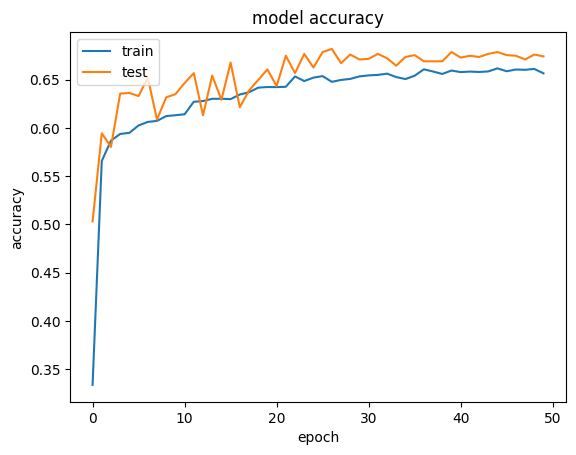

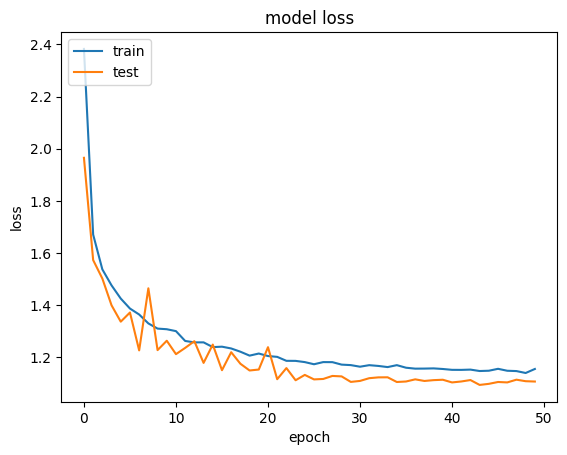

In [40]:
# Summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(Model_Name+'_LSTM64_acc-val_acc_'+str(EPOCHS_CRNN)+'epochs.jpg')
plt.show()

# Summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(Model_Name+'_LSTM64_loss-val_loss_'+str(EPOCHS_CRNN)+'epochs.jpg')

plt.show()
      

In [36]:
from keras.models import load_model
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


In [ ]:
from keras.utils import plot_model

#plot_model(model, to_file=Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs_model.png', show_shapes=True)
plot_model(model, to_file=Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs_model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False,  dpi=96)

In [ ]:
import visualkeras

#visualkeras.layered_view(model)
#visualkeras.layered_view(model, to_file='prueba.png').show() # write and show

In [ ]:
# Confusion matrix

from sklearn.metrics import classification_report

#y_true = y_test

y_true = np.argmax(y_test, axis=1) 

print('true ', y_true)

y_pred = model.predict(x_test) 
y_pred = np.argmax(y_pred, axis=1)
print('prediction ', y_pred)

#dict_genres.keys()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_true, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False,
            xticklabels=dict_genres_final.keys(),
            yticklabels=dict_genres_final.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')
nombre = "Confusion_Matrix_"+Model_Name+"_LSTM64_"+str(EPOCHS_CRNN)+"epochs.jpg"
plt.savefig(nombre)

In [ ]:
model.save(Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5') 


We can see that the individual precision of genre is good, approximately .82. This is reflected in genres such as electronica, hip-hop and rock, and to a lower level in classical

The error of 0.6 is high, since it almost always confuses genres such as jazz, pop and blues. But you can see that the error decreases as you train.

For this reason, if it is possible to identify the most characteristic genres, this model has the most projection.

### Test CRNN

In [ ]:
import functools
from keras.models import load_model

In [ ]:
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


##Testing the trained model
model = load_model(Model_Name+'_LSTM64_'+str(EPOCHS_CRNN)+'epochs.h5', custom_objects={'top3_acc': top3_acc})


In [ ]:
## testing with a rap (hip-hop) Song
import yt_dlp as youtube_dl
input_url = "https://www.youtube.com/watch?v=VC4ORS5n9Hg&ab_channel=NasVEVO" #hip-hop


video_info = youtube_dl.YoutubeDL().extract_info(url=input_url, download=False)
video_title = video_info['title']

options = {
    'format': 'bestaudio/best',
    'outtmpl': r'C:\Users\HASSAN\Desktop\Master Thesis\ClasificacionGeneroMusical_DL-master\ClasificacionGeneroMusical_DL-master\%(title)s.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192'
    }]
}


with youtube_dl.YoutubeDL(options) as ydl:
    ydl.download([input_url])

In [ ]:
# GOOD!

# now you have to use the .mp3

# you have to cut it, and take the first sample of 30s

# then use that numpy vector and predict gender


In [ ]:
filepath='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nas.mp3'

##with LIBROSA

y, sr = librosa.load(filepath, duration=30)
        
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()



In [ ]:
spect

import IPython.display as ipd
ipd.Audio('C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nirvana.mp3')
Song = ipd.Audio(y,rate=sr) 

In [ ]:


print("Format x_test ",x_test.shape)
print("Format Prediction song ",spect.T.shape)


In [ ]:
normalized_max_prediction = spect.T[:LONG_SPECTO,:]

normalized_max_prediction.shape


In [ ]:
pred = normalized_max_prediction.reshape(1, LONG_SPECTO, BINS)
y_pred = model.predict(pred)
y_pred

In [ ]:
genre_pred = np.argmax(y_pred, axis=1)
indice = genre_pred[0]
print('Prediction index ', indice)

genre_pred = dict_genres_final.keys()

print("General Prediction: ",list(genre_pred)[indice])

# CNN-RNN in parallel with GRU


Lin Feng, Shenlan Liu, Jianing Yao

https://arxiv.org/pdf/1712.08370.pdf

In [ ]:
from keras import backend as K
from keras import regularizers
from keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

BATCH_SIZE=16
EPOCHS_CNN_RNN=50
MODEL_NAME_CNN_RNN="CNN_RNN_medium"

In [ ]:
#reshape it to 3D
base_path = "C:/Users/HASSAN/Desktop"
x_train_path = os.path.join(base_path, 'x_train_medium.dat')
y_train_path = os.path.join(base_path, 'y_train_medium.dat')
x_valid_path = os.path.join(base_path, 'x_valid_medium.dat')
y_valid_path = os.path.join(base_path, 'y_valid_medium.dat')
x_test_path = os.path.join(base_path, 'x_test_medium.dat')
y_test_path = os.path.join(base_path, 'y_test_medium.dat')
x_train_3D = np.memmap(x_train_path, dtype='float32', mode='r', shape=(len(df_train), LONG_SPECTO, BINS, 1))  

x_valid_3D = np.memmap(x_valid_path, dtype='float32', mode='r', shape=(len(df_valid), LONG_SPECTO, BINS, 1))  

x_test_3D = np.memmap(x_test_path, dtype='float32', mode='r', shape=(len(df_test), LONG_SPECTO, BINS, 1))  


In [ ]:
keras.backend.clear_session()

i = Input(shape=(LONG_SPECTO,BINS,1))


# Convolutional Block

c1 = Conv2D(16, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(i) #original 16
p1 = MaxPooling2D((2,2), strides=(2,2))(c1)

c2 = Conv2D(32, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p1) #32
p2 = MaxPooling2D((2,2), strides=(2,2))(c2) 

c3 = Conv2D(64, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p2) #64
p3 = MaxPooling2D((2,2), strides=(2,2))(c3)

c4 = Conv2D(128, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p3) #128
p4 = MaxPooling2D((4,4), strides=(4,4))(c4) 

c5 = Conv2D(64, kernel_size=(3,1), strides=1, padding='valid', activation='relu')(p4) #64
p5 = MaxPooling2D((4,4), strides=(4,4))(c5)


f = Flatten()(p5) # this should output (256)


#Recurrenct Block - Bidirectional GRU 

pool_LSTM = MaxPooling2D(1,2)(i) 

squeezed = Lambda(lambda x: K.squeeze(x, axis=-1))(pool_LSTM) #embedding

lstm = Bidirectional(GRU(32))(squeezed) #It should be 128 to generate 256v output


#Concat output
concat = concatenate([f,lstm], axis=-1) 

d = Dense(128, activation='relu')(concat)#, kernel_regularizer=regularizers.l2(0.01))(concat)
#dr = Dropout(0.3)(d) 

out = Dense(CANT_genres, activation='softmax')(d) 


model = Model(outputs=out,inputs=i)

model.summary()


In [ ]:
import functools

top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'




model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(lr=0.001), 
              metrics=['accuracy',top3_acc]) 



checkpoint_callback = ModelCheckpoint('./best_weight_'+MODEL_NAME_CNN_RNN+'_GRU32_'+str(EPOCHS_CNN_RNN)+'epochs.h5', monitor='val_accuracy', verbose=1,
                                          save_best_only=True, mode='max')
    
reducelr_callback = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01)

callbacks = [checkpoint_callback, reducelr_callback]



h = model.fit(x_train_3D, y_train, batch_size=BATCH_SIZE, 
              epochs=EPOCHS_CNN_RNN, verbose=1, validation_data=(x_valid_3D,y_valid), 
              shuffle=True,  callbacks=callbacks)



### Results CNN-RNN

In [ ]:

model.evaluate(x_test_3D, y_test)


In [ ]:
# Results
        
    
# GRU(32) => 
    # loss=0.710, acc=0.795, top3=0.944 in 20 epochs  
    # loss=0.971, acc=0.705, top3=0.922 in 50 epochs  
    # loss=1.380, acc=0.817, top3=0.951 in 100 epochs 
    

In [ ]:
print(h.history.keys())

# Summarize history for accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
nombre_acc = MODEL_NAME_CNN_RNN+"_acc-val_acc_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(nombre_acc)
#plt.savefig('CNN-RNN_medium_loss-val_loss_20epochs.jpg')
plt.show()

# Summarize history for loss
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
nombre_loss = MODEL_NAME_CNN_RNN+"_loss-val_loss_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(nombre_loss)
plt.show()


In [ ]:
predicciones = model.predict(x_test_3D, batch_size=BATCH_SIZE)


In [ ]:

np.argmax(predicciones[:10,:], axis=1)   #tail


In [ ]:
#df_test.head()
df_test.head()

In [ ]:
import functools
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'

#model = load_model('genreRecognition.h5', custom_objects={'top3_acc': top3_acc})

In [ ]:

from sklearn.metrics import classification_report

y_true = np.argmax(y_test, axis=1)

#print('y true ', y_true)

y_pred = model.predict(x_test_3D) 
y_pred_3D = np.argmax(y_pred, axis=1)
#print('y prediccion ', y_pred_3D)

#dict_genres.keys()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


mat = confusion_matrix(y_true, y_pred_3D)
sns.heatmap(mat.T , annot=True, fmt='d', cbar=False,
            xticklabels=dict_genres_final.keys(),
            yticklabels=dict_genres_final.keys())
plt.xlabel('true label')
plt.ylabel('predicted label')
mat_name = "confusion_matrix_"+MODEL_NAME_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.jpg"
plt.savefig(mat_name)

In [ ]:
model.save(MODEL_NAME_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.h5")

CNN-RNN CONCLUSION

The best results are presented by the GRU layer (32)

The precision is good, 0.82?? The problem is the loss, which is too high, 0.6

That would mean that there are similar genera at the spectrogram level but with different classification.

We can see that it classifies rock, hip-hop and electronica well, but not pop. The algorithm associates blues, folk and pop with rock; or also pop, folk and hip-hop in electronica.

For this reason it was decided to use the top3 metric.

### Test CNN-RNN

In [ ]:
import functools
from keras.models import load_model

In [ ]:
top3_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=3)

top3_acc.__name__ = 'top3_acc'


##testing the trained model
model_CNN_RNN = load_model(MODEL_NAME_CNN_RNN+"_"+str(EPOCHS_CNN_RNN)+"epochs.h5", custom_objects={'top3_acc': top3_acc})


In [ ]:
## testing with a rap (hip-hop) Song
import yt_dlp as youtube_dl
input_url = "https://www.youtube.com/watch?v=VC4ORS5n9Hg&ab_channel=NasVEVO" #hip-hop


video_info = youtube_dl.YoutubeDL().extract_info(url=input_url, download=False)
video_title = video_info['title']

options = {
    'format': 'bestaudio/best',
    'outtmpl': r'C:\Users\HASSAN\Desktop\Master Thesis\ClasificacionGeneroMusical_DL-master\ClasificacionGeneroMusical_DL-master\%(title)s.%(ext)s',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192'
    }]
}


with youtube_dl.YoutubeDL(options) as ydl:
    ydl.download([input_url])

In [ ]:
filepath='C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nas.mp3'

## with LIBROSA

y, sr = librosa.load(filepath, duration=30)
        
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(spect.T, y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.show()



In [ ]:
spect

import IPython.display as ipd
#ipd.Audio('C:/Users/HASSAN/Desktop/Master Thesis/ClasificacionGeneroMusical_DL-master/ClasificacionGeneroMusical_DL-master/Nirvana.mp3')
Song = ipd.Audio(y,rate=sr) #bien

In [ ]:
#it should be hiphop

print("format of x_test ",x_test.shape)
print("format of Ostro ",spect.T.shape)


In [ ]:
normalized_max_prediction = spect.T[:LONG_SPECTO,:]

normalized_max_prediction.shape


In [ ]:
pred = normalized_max_prediction.reshape(1, LONG_SPECTO, BINS, 1)

y_pred = model.predict(pred)
y_pred

In [ ]:
genre_pred = np.argmax(y_pred, axis=1)
indice = genre_pred[0]
print('prediction index ', indice)

genre_pred = dict_genres_final.keys()
#print("genral prediction: ",dict_genres_final.get(indice))
print("General Prediction: ",list(genre_pred)[indice])

# Conclusions

Conclusions
Regarding the processing of the dataset, Generator as memory-mapped files is much faster than a traditional generator.

The reason is that memory-mapped files work with memory virtualization, and entrust all the parallelism work to RAM.

Instead, a traditional generator consumes batches of data and allocates them space in RAM. In this assigned space it places and removes processing blocks (BATCHES) concurrently. Sequentially It is slower, but more "safe", in the sense that it does not saturate your RAM. In parallel, we must make a generator that processes the data in 4 threads

On the models side, the CRNN sequential model is the one that has the best results, since it is faster and presents an increasing trend in precision; On the side of the parallel CNN-RNN model, it is more useful for fast training, but processing is slower and stagnates at 80 epochs, after which the loss begins to grow.
